## Correr el encabezado antes de comenzar para cargar todas las funiones

In [1]:
#Encabezado del archivo
import os,csv
import pandas as pd
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
%matplotlib inline

def cargar_txt_en_lista(file_path):
    return_list = []
    with open(file_path,"r") as openfile:
        for lines in openfile:
            return_list.append(lines.replace("\n",""))
            
    return return_list

#Filtros de String para dataframe
#Variante para una columna

def sfilter_by_col(df_query,col_name,text,has=True):
    df_return = df_query.loc[df_query[col_name].str.contains(text)==has]
    return df_return

def sfilter_linage(df_query,text,has=True):
    df_return = df_query.loc[df_query["Linage"].str.contains(text)==has]
    return df_return


def sfilter_org(df_query,text,has=True):
    df_return = df_query.loc[df_query["Organism"].str.contains(text)==has]
    return df_return

def sfilter_by_uniprot(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return df_return


def get_pdb_list_from_df(df_query,uniprot_query):
    df_return =  df_query.loc[df_query["UNIPROT_ID"]==uniprot_query]
    return_list = filter_by_uniprot(df_proteins_celular,"P04637").iloc[0]["PDB_CHAIN_LIST"]
    return return_list

def printd(text):
    display(Markdown(text))
    return

def strlen(x):
    return str(len(x))

def check_not_None(thing):
    if type(thing) != type (None):
        return True
    else:
        return False


printd("### Funciones cargagadas correctamente, puede continuar.")

### Funciones cargagadas correctamente, puede continuar.

# Correr el main para generar el Informe Base



# Fercha del informe 2019-10-17

## Reading swissprot

Dataframe size: 560459

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs
0,Q0ATK2,ACCD_MARMM,reviewed,Acetyl-coenzyme A carboxylase carboxyl transfe...,accD Mmar10_0089,Maricaulis maris (strain MCS10),311,"cellular organisms, Bacteria, Proteobacteria, ...",MTEKSNGMSWLSKITPPGMSKIFSKRDTPDNLWVKCPVSEEMVFHK...,394221
1,O40976,1A_CMVNT,reviewed,Replication protein 1a [Includes: ATP-dependen...,ORF1a,Cucumber mosaic virus (strain NT9) (CMV),993,"Viruses, Riboviria, Bromoviridae, Cucumovirus,...",MATSSFNINELVASHGDKGLLATALVDKTAHEQLEEQLQHQRRGRK...,117124
2,Q84P24,4CLL6_ARATH,reviewed,4-coumarate--CoA ligase-like 6 (EC 6.2.1.-) (4...,4CLL6 At4g19010 F13C5.180,Arabidopsis thaliana (Mouse-ear cress),566,"cellular organisms, Eukaryota, Viridiplantae, ...",MAATHLHIPPNPKTQTSHQNPPFWFSSKTGIYTSKFPSLHLPVDPN...,3702
3,P62260,1433E_RAT,reviewed,14-3-3 protein epsilon (14-3-3E) (Mitochondria...,Ywhae,Rattus norvegicus (Rat),255,"cellular organisms, Eukaryota, Opisthokonta, M...",MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...,10116
4,P0CK20,A25_VACCC,reviewed,Protein A2.5,A2.5L,Vaccinia virus (strain Copenhagen) (VACV),76,"Viruses, Poxviridae, Chordopoxvirinae, Orthopo...",MSWYEKYNIVLNPPKRCSSACADNLTTILAEDGNHIRAILYSQPKK...,10249


## Reading PDBSWS

swslist dataframe size: 47097

,UNIPROT_ID,PDB_CHAIN_LIST,pdb_chain_count
0,A0A010,"[5B00_A, 5B00_B, 5B00_C, 5B01_A, 5B01_B, 5B01_...",57
1,A0A011,"[3VK5_A, 3VK5_B, 3VKA_A, 3VKA_B, 3VKB_A, 3VKB_...",10
2,A0A585,[4MNQ_E],1
3,A0A5A3,"[4UDT_B, 4UDU_B]",2
4,A0A5B3,"[5NHT_B, 5NQK_B]",2


# Merge Sprot with SWS

Dataframe size: 26550

,Length,Taxonomic lineage IDs,pdb_chain_count
count,26550.000000,2.655000e+04,26550.000000
mean,454.547081,1.216896e+05,10.030245
std,545.239279,1.946628e+05,30.223010
min,5.000000,1.700000e+01,1.000000
25%,188.000000,9.606000e+03,2.000000
50%,328.000000,1.009000e+04,4.000000
75%,529.000000,2.089640e+05,8.000000
max,34350.000000,2.510777e+06,1084.000000


# Resumen de informacion del conjunto de proteinas a estudiar

Viruses Dataframe size: 567

Celular Dataframe size: 10165

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bacteria dataframe size: 3694

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Archaea dataframe size: 418

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Eukaryota dataframe size: 6053

# Graficos del dataframe de trabajo( Organismos Celulares)

## Histograma de Length menores a 3000

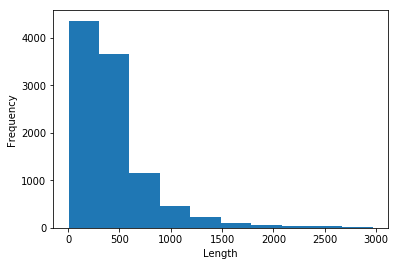

## Histograma de pdb_chain_count menores a 200

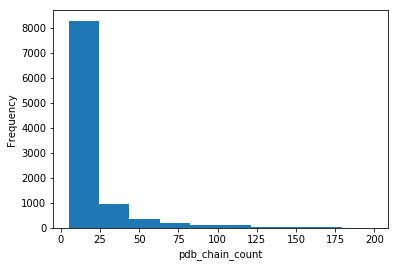

informe generado en 8.95678448677063

In [2]:
import time,datetime
# MAIN/CARGA DE DATOS
printd("# Fercha del informe "+str(datetime.date.today()))
tiempo_inicial = time.time()

log_error = dict()
log_error["SWISPROT"] = list()
log_error["PDBSWS_PDBUNIPROT"] = list()

# paths de archivos iniciales
path_swissprot_tab =  "bases_de_datos_ref/uniprot-reviewed_20190730.tab"
path_pdbwsw_pdbchain = "bases_de_datos_ref/pdb_uniprot_chain_map.lst.2"


#CARGAR SWISSPROT
printd ("## Reading swissprot")

df_sprot = pd.read_csv(path_swissprot_tab,sep="\t")
df_sprot.columns = ['UNIPROT_ID', 
                    'Entry_name', 
                    'Status', 
                    'Protein_names', 
                    'Gene names', 
                    'Organism', 
                    'Length', 'Linage', 
                    'Sequence', 
                    'Taxonomic lineage IDs']
printd("Dataframe size: "+strlen(df_sprot))
display(df_sprot.head(n=5))


#ESTE BLOQUE SIRVE PARA CARGAR SIFTS, 
#actualmente no esta en uso
#
"""
printd ("## Reading sitfs")
df_sifts = pd.read_csv("bases_de_datos_ref/sifts_uniprot_pdb.tsv",header=1,sep="\t")
df_sifts.columns = ["UNIPROT_ID","PDB_list_sifts"]
printd("Dataframe size: "+strlen(df_sifts))
display(df_sifts.head(n=5))

printd ("Merge sprot with sifts")
df_sprot_pdb = pd.merge(df_sprot,df_sifts,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.head(n=1))
"""

###CARGAR PDBSWS
printd ("## Reading PDBSWS")
#Esto carga la lista manualmente por que algunos codigos uniprot no figuran.
#son listas de ancho fijo (ej: '101m A P02185')
#algunas lineas del archivo 
lst_pdbsws = []
tmp_pdbsws = cargar_txt_en_lista(path_pdbwsw_pdbchain)
for index,line in enumerate(tmp_pdbsws):
    if (line[-1] != "?") and (line[-1] != " "):
        pdb_chain_id = line[0:4].upper()+"_"+line[5] 
        tmp = [pdb_chain_id,line[0:4],line[5],line[7:]]
        lst_pdbsws.append(tmp)
    else:
        #Los errores de carga de archivos se anexan a su log
        message = "Error in line "+ str(index) + ": "+ (line) 
        log_error["PDBSWS_PDBUNIPROT"].append(message)
#Borrar vbariables
del pdb_chain_id
del tmp_pdbsws
del tmp
#Crea el dataframe usando la lista
df_pdbsws = pd.DataFrame(lst_pdbsws).dropna()
df_pdbsws.columns = ["PDB_CHAIN_ID","PDB","CHAIN","UNIPROT_ID"]
#Los agrupa por pdb
df_swslist = df_pdbsws.groupby(["UNIPROT_ID"],as_index=False).agg({'PDB_CHAIN_ID':lambda x:list(x)})
#Agrega el numero de pdbs en la lista
df_swslist["pdb_chain_count"] = df_swslist.apply({"PDB_CHAIN_ID":lambda x: len(x)})
df_swslist.columns= ["UNIPROT_ID","PDB_CHAIN_LIST" ,"pdb_chain_count"]
#Informe visible
printd ("swslist dataframe size: "+strlen(df_swslist))
display(df_swslist.head())

### MERGE: AGREGA las columnas de sws a sprot, elimina los uniprot que no tengan mapeo.
printd ("# Merge Sprot with SWS")
df_sprot_pdb = pd.merge(df_sprot,df_swslist,on=["UNIPROT_ID"],how="inner")
printd("Dataframe size: "+strlen(df_sprot_pdb))
display(df_sprot_pdb.describe())

### FILTRANDO
# De las proteinas con mas de 5 cadenas, 
# Separar los virus en una tabla aparte.
df_work = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses")==False)]
df_virus = df_sprot_pdb.loc[(df_sprot_pdb["pdb_chain_count"]>4) & (df_sprot_pdb["Linage"].str.contains("Viruses"))]
printd ("# Resumen de informacion del conjunto de proteinas a estudiar")
printd ("Viruses Dataframe size: "+strlen(df_virus) )
printd ("Celular Dataframe size: "+strlen(df_work))
for taxa in ["Bacteria","Archaea","Eukaryota"]:
    printd ("&nbsp;"*6+taxa+" dataframe size: "+strlen (sfilter_linage(df_work,taxa)))

printd("# Graficos del dataframe de trabajo( Organismos Celulares)")

printd("## Histograma de Length menores a 3000")
plot_his1 = df_work["Length"].loc[df_work["Length"]<3000].plot(kind="hist")
plot_his1.set_xlabel("Length")
plt.show()


printd("## Histograma de pdb_chain_count menores a 200")
plot_his2 = df_work["pdb_chain_count"].loc[df_work["pdb_chain_count"]<200].plot(kind="hist")
plot_his2.set_xlabel("pdb_chain_count")
plt.show()

printd( "informe generado en "+str(time.time()-tiempo_inicial))


#Esta linea guarda el df_work en un archivo tsv
df_work.to_csv("archivos_importantes/df_work_"+str(datetime.date.today())+".tsv",sep="\t")

# Guardar en archivo

In [7]:
#Esto arma una lista global de pdb en el df_work
def update_pdb_dowladed(dataframe):
    for i,row in dataframe.iterrows():
        filename = "ent_files/pdb"+row[0].lower()+".ent"
        if os.path.isfile (filename):
            dataframe.at[i,"dowloaded"] = True
            dataframe.at[i,"path_to_entfile"] = filename
    return

full_pdb_list = set()
for lines in df_work["PDB_CHAIN_LIST"]:
    full_pdb_list.update(set([x[0:4] for x in lines]))

df_full_pdb = pd.DataFrame(list(full_pdb_list))
df_full_pdb.columns = ["PDB_ID"]
df_full_pdb["dowloaded"] = False
df_full_pdb["path_to_entfile"] = None
printd ("PDB LIST is "+strlen(df_full_pdb))
display(df_full_pdb.head())

update_pdb_dowladed(df_full_pdb)

df_full_pdb.loc[df_full_pdb["dowloaded"]==True]

PDB LIST is 82289

,PDB_ID,dowloaded,path_to_entfile
0,2FYN,False,None
1,2CAN,False,None
2,5KIJ,False,None
3,2F1A,False,None
4,2D7Y,False,None


,PDB_ID,dowloaded,path_to_entfile
1122,4IBW,True,ent_files/pdb4ibw.ent
1350,1SAL,True,ent_files/pdb1sal.ent
1860,1KZY,True,ent_files/pdb1kzy.ent
1887,3KZ8,True,ent_files/pdb3kz8.ent
1938,4AGO,True,ent_files/pdb4ago.ent
2764,2J21,True,ent_files/pdb2j21.ent
3048,2BIQ,True,ent_files/pdb2biq.ent
3122,2KS1,True,ent_files/pdb2ks1.ent
3589,2MZD,True,ent_files/pdb2mzd.ent
3924,2N0A,True,ent_files/pdb2n0a.ent


In [6]:
#Checkquer estructura de carpetas
folder_list = ["ent_files","fasta","blast","pdb_chains","cd-hit-results-0.95","cd-hit-results-0.80","tree"]
print ("Checking folder structure.")
for folder in folder_list:
    if not os.path.isdir(folder):
        print ("Creating folder "+ folder)
        os.mkdir(folder)



#Crea un diciconario para acumular los datos a usar
#crea un diccionario que contiene dataframes especificos utiles
#las llaves son los uniprot_id.

def sort_cdhitcluster(list_query):
    return sorted(list_query,key = lambda x: x[2],reverse=True)

def dibujar_histograma(df_query,col):
    plot_his1 = df_query[col].plot(kind="hist")
    plot_his1.set_xlabel(col)
    plt.show()
    return

def show_ensemble_info(query):
    printd("## Mostrando datos de la proteina de estudio")
    for entry in ensemble_data[query]:
        if "sorted" in entry:
            histo = [len(ensemble_data[query][entry][x]) for x in range(30,91,10)]
            printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(histo)+"`")
        else:
            printd ("&nbsp;&nbsp;**"+entry+"** >"+ "`"+str(ensemble_data[query][entry])+"`")
    return

def run_blast(fasta_file):
    output_filename = fasta_file.replace("fasta/","blast_results/").replace(".fasta","_blast_results.txt")
    cmd = "blastp -query "+ fasta_file +" -db uniprot_sprot.db -evalue 1e-10 -out "+ output_filename +" -outfmt '6 qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcovs' -num_alignments 1000"
    os.system(cmd)
    return output_filename


#el imput es el fasta con los homologos, el coef tiene que ser un string.
def cdhit_stuff(filename_hsf,coef):
    outfile_cdhit =  filename_hsf.replace("fasta/homologs_sprot/","cd-hit-results-"+coef+"/").replace("_homologs_sprot.fasta","_cd-hit")
    
    #si el archivo no existe, corre el cdhit
    if not os.path.isfile(outfile_cdhit):
        cmd = "cd-hit -i " + filename_hsf + " -o " + outfile_cdhit + " -c "+coef
        os.system(cmd)
        
    outfile_cdhit = outfile_cdhit+".clstr"
    #parsea los resultados del cdhit
    clusters = dict()    
    if os.path.isfile(outfile_cdhit):
        with open(outfile_cdhit,"r") as openfile:
            for line in openfile:
                text = line.replace("\n","")
                if text[0] == ">":
                    clus_num = (text[1:])
                    clusters[clus_num] = list()
                if text[0] in [str(x) for x in range(0,10)]:
                    uniprot_id =  (text.split(">")[1][0:6])
                    rep = int ("*" in text.split(">")[1])
                    if rep == False:
                        at_percent = float(text.split("at ")[1].replace("%",""))
                    else:
                        at_percent = float("100.00")
                    clusters[clus_num].append( [uniprot_id,bool(rep),at_percent])
        for cluster_n in clusters:
            clusters[cluster_n] = sort_cdhitcluster(clusters[cluster_n])
        return outfile_cdhit,clusters
    else:
        return "N/A","N/A"

def make_fasta_from_list(query,query_list,outfilename):
    with open(outfilename,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for uniprot_id in query_list:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                    openfile.write(">"+uniprot_id)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
    return outfilename


def get_cdhit_rep(uniprot_query,coef="0.95"):
    cluster_rep_list = []
    for cluster in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"]:
        for members in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"][cluster]:
            if members[1] == True:
                uniprot_id = members[0]
                df1 = ensemble_df[uniprot_query]["blast_results"]
                if len(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"] ) != 0:
                    ident_val = max(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"])
                    cluster_rep_list.append((members[0],ident_val))
                else:
                    ident_val = 0
                    cluster_rep_list.append((members[0],ident_val))
    return cluster_rep_list    

def histo_dic_cdhit(uniprot_id,coef="0.95"):
    bins =  [30,40,50,60,70,80,90]
    histo_dict = dict()
    for n in bins:
        histo_dict[n] = list()

    for id_and_ident in sorted (get_cdhit_rep(uniprot_id,coef),key = lambda x: x[1]):
        for n in bins:
            if (id_and_ident[1] >= n) and (id_and_ident[1]) < n+10:
                histo_dict[n].append(id_and_ident)
                break
    return histo_dict


ensemble_data = dict()
ensemble_df = dict()
#esta es la funcion importante
def estudiar_proteina(query,show=True):
    #Check que el query sea correcto
    if not query in list(df_work["UNIPROT_ID"]):
        print ("La proteina solicitada no se encuentra disponible.")
        return False
    
    #premite la escritura en las variables globales
    global ensemble_data
    global ensemble_df
    
    #carga informacion en ensemble_data y ensemble_df
    ensemble_df[query] = dict()
    ensemble_data[query] = dict(sfilter_by_uniprot(df_work,query).iloc[0])
    #da una lista 
    ensemble_data[query]["PDB_in_df_work"] = (list(set([x[0:4] for x in ensemble_data[query]["PDB_CHAIN_LIST"]])))

    #create fasta file with query seq
    with open ("fasta/"+query+".fasta","w") as openfile:
        openfile.write (">"+query+"\n")
        openfile.write (ensemble_data[query]["Sequence"]+"\n")
    
    #BUSCAR RESULTADOS DEL BLAST, SI NO EXISTEN, CORRERLO
    blast_results_filename = "blast_results/"+query+"_blast_results.txt"
    if os.path.isfile(blast_results_filename):
        if os.path.getsize(blast_results_filename) == 0:
            if show: print ("R ",end="")
            os.system("rm "+blast_results_filename)
            ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
        else:
            ensemble_data[query]["blast_results"] = blast_results_filename
    else:
        ensemble_data[query]["blast_results"] = run_blast("fasta/"+query+".fasta")
    
    
    #PARSEAR LOS RESULTADOS EL BLAST y cargarlos a ensemble data
    if os.path.getsize(ensemble_data[query]["blast_results"]) > 0:
        #leer los datos importantes del blast y colocarlos en un dataframe
        df1 = pd.read_csv(ensemble_data[query]["blast_results"],header=None,sep="\t")
        df1.columns = "qaccver qlen qstart qend sseqid saccver slen sstart send length staxid nident gaps evalue pident qcov".split(" ")
        df1["UNIPROT_ID"] =  df1["sseqid"].str.split("|",expand=True)[1]
        #se agregan los valores de qstart y qend
        df2 = df1[["UNIPROT_ID","pident","qcov","qstart","qend","sstart","send","gaps"]].loc[(df1["UNIPROT_ID"]!=query) & (df1["pident"]>30) & (df1["qcov"]>75) ]
        
        #esta linea elimina los resultados repetidos en el blast y se queda solo con el primer hit.
        ensemble_df[query]["blast_results"] = df2.drop_duplicates(["UNIPROT_ID"])
        del df1,df2
        #carga la infomacion de los homologos al ensemble_data
        ensemble_data[query]["homologs_sprot"] = list(set(list(ensemble_df[query]["blast_results"]["UNIPROT_ID"])))
        ensemble_data[query]["homologs_in_df_work"] = list(set(df_work["UNIPROT_ID"]) & set(ensemble_data[query]["homologs_sprot"]))
    else:
        ensemble_data[query]["homologs_sprot"] = []
        if show: printd("## Alerta, blast_results still 0 "+query)    

        return False
    
    if len( ensemble_data[query]["homologs_sprot"])< 20:
        return False
    
    #CREAR FASTA DE HOMOLOGOS
    filename_hsf = "fasta/homologs_sprot/"+query+"_homologs_sprot.fasta"
    if os.path.isfile(filename_hsf):
        ensemble_data[query]["homologos_sprot_fasta"] = filename_hsf
    else:
        with open(filename_hsf,"w") as openfile:
            openfile.write(">"+query)
            openfile.write("\n")
            openfile.write(ensemble_data[query]["Sequence"])
            openfile.write("\n")
            for homolog in ensemble_data[query]["homologs_sprot"]:
                #Si la secuencia esta en el dataframe de sprot
                if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog])>0:
                    seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==homolog]["Sequence"].iloc[0]
                    openfile.write(">"+homolog)
                    openfile.write("\n")
                    openfile.write(seq)
                    openfile.write("\n")
            ensemble_data[uniprot_id]["homologos_sprot_fasta"] = filename_hsf
    
    #corre el cdhit si el archivo de salida no existe. 
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.95")
    ensemble_data[query]["cd-hit-results-0.95"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.95_parsed"] = cdhit_parsed
    ensemble_data[query]["cd-hit-sorted-0.95"] = histo_dic_cdhit(query,"0.95")
    
    #Estas lineas hacian el codigo extremadamente lento de decide hacerlo on-demand
    #ensemble_data[query]["cd-hit-results-0.95_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.95")],"fasta/cdhit-0.95/"+query+"_cdhit-0.95.fasta")
    
    cdhit_results,cdhit_parsed = cdhit_stuff(filename_hsf,"0.80")
    ensemble_data[query]["cd-hit-results-0.80"] = cdhit_results
    ensemble_data[query]["cd-hit-results-0.80_parsed"] = cdhit_parsed
    ensemble_data[query]["cd-hit-sorted-0.80"] = histo_dic_cdhit(query,"0.80")
    
    
    #ensemble_data[query]["cd-hit-results-0.80_fasta"] = make_fasta_from_list(query,[x[0] for x in get_cdhit_rep(query,"0.80")],"fasta/cdhit-0.80/"+query+"_cdhit-0.80.fasta")
    
    #muestra los resutaldos hasta el momento
    if show:
        show_ensemble_info(query)
        printd("### Histograma de los resultados del blast")
    return True

estudiar_proteina("P04637")


Checking folder structure.


## Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`P04637`

&nbsp;&nbsp;**Entry_name** >`P53_HUMAN`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`Cellular tumor antigen p53 (Antigen NY-CO-13) (Phosphoprotein p53) (Tumor suppressor p53)`

&nbsp;&nbsp;**Gene names** >`TP53 P53`

&nbsp;&nbsp;**Organism** >`Homo sapiens (Human)`

&nbsp;&nbsp;**Length** >`393`

&nbsp;&nbsp;**Linage** >`cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Mammalia, Theria, Eutheria, Boreoeutheria, Euarchontoglires, Primates, Haplorrhini, Simiiformes, Catarrhini, Hominoidea (apes), Hominidae (great apes), Homininae, Homo, Homo sapiens (Human)`

&nbsp;&nbsp;**Sequence** >`MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`9606`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['1A1U_A', '1A1U_C', '1AIE_A', '1C26_A', '1DT7_X', '1DT7_Y', '1GZH_A', '1GZH_C', '1H26_E', '1HS5_A', '1HS5_B', '1JSP_A', '1KZY_A', '1KZY_B', '1MA3_B', '1OLG_A', '1OLG_B', '1OLG_C', '1OLG_D', '1OLH_A', '1OLH_B', '1OLH_C', '1OLH_D', '1PES_A', '1PES_B', '1PES_C', '1PES_D', '1PET_A', '1PET_B', '1PET_C', '1PET_D', '1SAE_A', '1SAE_B', '1SAE_C', '1SAE_D', '1SAF_A', '1SAF_B', '1SAF_C', '1SAF_D', '1SAH_A', '1SAH_B', '1SAH_C', '1SAH_D', '1SAJ_A', '1SAJ_B', '1SAJ_C', '1SAJ_D', '1SAK_A', '1SAK_B', '1SAK_C', '1SAK_D', '1SAL_A', '1SAL_B', '1SAL_C', '1SAL_D', '1TSR_A', '1TSR_B', '1TSR_C', '1TUP_A', '1TUP_B', '1TUP_C', '1UOL_A', '1UOL_B', '1YC5_B', '1YCQ_B', '1YCR_B', '1YCS_A', '2AC0_A', '2AC0_B', '2AC0_C', '2AC0_D', '2ADY_A', '2ADY_B', '2AHI_A', '2AHI_B', '2AHI_C', '2AHI_D', '2ATA_A', '2ATA_B', '2ATA_C', '2ATA_D', '2B3G_B', '2BIM_A', '2BIM_B', '2BIN_A', '2BIO_A', '2BIP_A', '2BIQ_A', '2F1X_A', '2F1X_B', '2FEJ_A', '2FOJ_B', '2FOO_B', '2GS0_B', '2H1L_M', '2H1L_N', '2H1L_O', '2H1L_P', '2H1L_Q', '2H1L_R', '2H1L_S', '2H1L_T', '2H1L_U', '2H1L_V', '2H1L_W', '2H1L_X', '2H2D_B', '2H2F_B', '2H4F_D', '2H4H_B', '2H4J_D', '2H59_D', '2H59_E', '2J0Z_A', '2J0Z_B', '2J0Z_C', '2J0Z_D', '2J10_A', '2J10_B', '2J10_C', '2J10_D', '2J11_A', '2J11_B', '2J11_C', '2J11_D', '2J1W_A', '2J1W_B', '2J1X_A', '2J1X_B', '2J1Y_A', '2J1Y_B', '2J1Y_C', '2J1Y_D', '2J1Z_A', '2J1Z_B', '2J20_A', '2J20_B', '2J21_A', '2J21_B', '2K8F_B', '2L14_B', '2LY4_B', '2MEJ_B', '2MWO_B', '2MWP_B', '2MWY_B', '2MZD_B', '2OCJ_A', '2OCJ_B', '2OCJ_C', '2OCJ_D', '2PCX_A', '2QVQ_A', '2QXA_A', '2QXA_B', '2QXA_C', '2QXA_D', '2QXB_A', '2QXB_B', '2QXB_C', '2QXB_D', '2QXC_A', '2QXC_B', '2QXC_C', '2QXC_D', '2RUK_A', '2VUK_B', '2WGX_A', '2WGX_B', '2X0U_A', '2X0U_B', '2X0V_A', '2X0V_B', '2X0W_A', '2X0W_B', '2XWR_B', '2YBG_A', '2YBG_B', '2YBG_C', '2YBG_D', '2YDR_P', '2Z5S_P', '2Z5S_Q', '2Z5T_P', '2Z5T_Q', '2Z5T_R', '3D05_A', '3D06_A', '3D07_A', '3D07_B', '3D08_A', '3D09_A', '3DAC_B', '3IGK_A', '3IGL_A', '3KMD_A', '3KMD_B', '3KMD_C', '3KMD_D', '3KZ8_A', '3KZ8_B', '3LW1_P', '3OQ5_A', '3OQ5_B', '3OQ5_C', '3PDH_D', '3Q01_A', '3Q01_B', '3Q05_A', '3Q05_B', '3Q05_C', '3Q05_D', '3Q06_A', '3Q06_B', '3Q06_C', '3Q06_D', '3SAK_A', '3SAK_B', '3SAK_C', '3SAK_D', '3TG5_B', '3TS8_A', '3TS8_B', '3TS8_C', '3TS8_D', '3ZME_A', '3ZME_B', '4AGL_A', '4AGL_B', '4AGM_A', '4AGM_B', '4AGN_A', '4AGN_B', '4AGO_A', '4AGO_B', '4AGP_A', '4AGP_B', '4AGQ_A', '4AGQ_B', '4BUZ_P', '4BV2_E', '4BV2_H', '4FZ3_B', '4HFZ_B', '4HFZ_D', '4HJE_A', '4HJE_B', '4HJE_C', '4HJE_D', '4IBQ_A', '4IBQ_B', '4IBQ_C', '4IBQ_D', '4IBS_A', '4IBS_B', '4IBS_C', '4IBS_D', '4IBT_A', '4IBT_B', '4IBT_C', '4IBT_D', '4IBU_A', '4IBU_B', '4IBU_C', '4IBU_D', '4IBV_A', '4IBW_A', '4IBY_A', '4IBY_B', '4IBZ_A', '4IBZ_B', '4IBZ_C', '4IBZ_D', '4IJT_A', '4KVP_A', '4KVP_B', '4KVP_C', '4KVP_D', '4LO9_A', '4LO9_B', '4LO9_C', '4LO9_D', '4LOE_A', '4LOE_B', '4LOE_C', '4LOE_D', '4LOF_A', '4MZI_A', '4MZR_A', '4MZR_B', '4MZR_C', '4MZR_D', '4QO1_B', '4RP6_Z', '4RP7_Z', '4X34_C', '4XR8_C', '4XR8_D', '4ZZJ_A', '5A7B_A', '5A7B_B', '5AB9_A', '5AB9_B', '5ABA_A', '5ABA_B', '5AOI_A', '5AOI_B', '5AOJ_A', '5AOJ_B', '5AOK_A', '5AOK_B', '5AOL_A', '5AOL_B', '5AOM_A', '5AOM_B', '5BUA_A', '5ECG_A', '5ECG_B', '5G4M_A', '5G4M_B', '5G4N_A', '5G4N_B', '5G4O_A', '5G4O_B', '5HOU_A', '5HP0_A', '5HPD_A', '5LAP_A', '5LAP_B', '5LGY_A', '5LGY_B', '5LGY_C', '5LGY_D', '5MCT_A', '5MCT_B', '5MCU_A', '5MCU_B', '5MCV_A', '5MCV_B', '5MCW_A', '5MCW_B', '5MF7_A', '5MF7_B', '5MG7_A', '5MG7_B', '5O1A_A', '5O1A_B', '5O1B_A', '5O1B_B', '5O1C_A', '5O1C_B', '5O1D_A', '5O1D_B', '5O1E_A', '5O1E_B', '5O1F_A', '5O1F_B', '5O1G_A', '5O1G_B', '5O1H_A', '5O1H_B', '5O1I_A', '5O1I_B', '5OL0_C', '5OL0_D', '6FF9_A', '6FF9_B', '6FF9_C', '6FF9_D', '6FJ5_A', '6FJ5_B', '6FJ5_C', '6FJ5_D']`

&nbsp;&nbsp;**pdb_chain_count** >`373`

&nbsp;&nbsp;**PDB_in_df_work** >`['2QXC', '5O1B', '4QO1', '2J10', '2VUK', '3D08', '2H4H', '4RP6', '3D05', '1AIE', '3D09', '2ATA', '2BIN', '2MEJ', '1UOL', '1PES', '4LO9', '2B3G', '2MWY', '5O1H', '3KMD', '2AHI', '1GZH', '3D06', '4IBU', '2YBG', '5MCV', '5O1E', '4LOF', '1TUP', '5G4M', '4IBY', '2QVQ', '4IBV', '1H26', '1HS5', '1SAK', '3LW1', '2J20', '5MCW', '5O1F', '1A1U', '6FF9', '3SAK', '1SAH', '2X0V', '2J0Z', '2LY4', '4FZ3', '4KVP', '4BUZ', '5MCT', '4HJE', '2RUK', '2ADY', '5A7B', '2X0W', '3D07', '4MZR', '5O1D', '4MZI', '3TG5', '4X34', '5HP0', '3Q05', '2Z5S', '4HFZ', '1MA3', '4XR8', '5AOK', '2L14', '3Q06', '2BIQ', '4AGP', '5MCU', '5O1A', '5ABA', '2J1X', '5AOI', '5HPD', '4IBZ', '2H59', '4AGN', '5MG7', '1OLG', '2GS0', '5G4O', '1PET', '5LGY', '5LAP', '2MZD', '2H2D', '1YCR', '1YCS', '5G4N', '1SAJ', '3DAC', '3OQ5', '2Z5T', '2J1Z', '1KZY', '3IGK', '4IBQ', '5O1G', '4RP7', '2J21', '2FEJ', '2H4F', '5AOM', '2QXA', '4AGQ', '1YC5', '2BIP', '1SAE', '5AOJ', '5O1C', '2XWR', '2BIO', '2AC0', '2WGX', '2H4J', '4BV2', '4LOE', '2FOJ', '3IGL', '2PCX', '2X0U', '5ECG', '2K8F', '3KZ8', '4IJT', '2F1X', '2QXB', '4AGL', '2YDR', '2BIM', '5O1I', '1SAF', '2J1Y', '5BUA', '2J11', '1DT7', '5OL0', '3Q01', '2J1W', '4IBW', '5AB9', '6FJ5', '3ZME', '1SAL', '1YCQ', '2MWP', '4IBS', '2H2F', '4IBT', '1JSP', '5HOU', '3TS8', '2FOO', '2H1L', '3PDH', '4ZZJ', '2MWO', '1TSR', '4AGM', '5MF7', '2OCJ', '4AGO', '1OLH', '1C26', '5AOL']`

&nbsp;&nbsp;**blast_results** >`blast_results/P04637_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['Q9W678', 'P56424', 'P67939', 'P56423', 'Q9TTA1', 'P10361', 'P41685', 'P67938', 'Q9W679', 'P51664', 'P07193', 'Q95330', 'Q9WUR6', 'Q00366', 'O09185', 'Q29537', 'P79734', 'Q92143', 'Q9JJP2', 'P10360', 'P13481', 'Q9TUB2', 'P61260', 'Q8SPZ3', 'P02340', 'O57538', 'Q64662', 'O36006', 'P25035']`

&nbsp;&nbsp;**homologs_in_df_work** >`['P02340']`

&nbsp;&nbsp;**homologos_sprot_fasta** >`fasta/homologs_sprot/P04637_homologs_sprot.fasta`

&nbsp;&nbsp;**cd-hit-results-0.95** >`cd-hit-results-0.95/P04637_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.95_parsed** >`{'Cluster 0': [['Q9JJP2', True, 100.0]], 'Cluster 1': [['P25035', True, 100.0]], 'Cluster 2': [['Q00366', True, 100.0], ['O09185', False, 95.93]], 'Cluster 3': [['P04637', True, 100.0], ['P56424', False, 95.67], ['P56423', False, 95.67], ['P13481', False, 95.67], ['P61260', False, 95.67]], 'Cluster 4': [['Q9TTA1', True, 100.0]], 'Cluster 5': [['P10361', True, 100.0]], 'Cluster 6': [['Q95330', True, 100.0]], 'Cluster 7': [['O36006', True, 100.0], ['Q64662', False, 97.45]], 'Cluster 8': [['Q9WUR6', True, 100.0]], 'Cluster 9': [['P02340', True, 100.0]], 'Cluster 10': [['Q8SPZ3', True, 100.0]], 'Cluster 11': [['P41685', True, 100.0]], 'Cluster 12': [['P67939', True, 100.0], ['P67938', False, 100.0]], 'Cluster 13': [['Q9TUB2', True, 100.0]], 'Cluster 14': [['P51664', True, 100.0]], 'Cluster 15': [['Q29537', True, 100.0]], 'Cluster 16': [['P79734', True, 100.0]], 'Cluster 17': [['Q9W678', True, 100.0]], 'Cluster 18': [['P10360', True, 100.0]], 'Cluster 19': [['Q9W679', True, 100.0]], 'Cluster 20': [['P07193', True, 100.0]], 'Cluster 21': [['O57538', True, 100.0], ['Q92143', False, 99.42]]}`

&nbsp;&nbsp;**cd-hit-sorted-0.95** >`[0, 4, 4, 0, 6, 6, 1]`

&nbsp;&nbsp;**cd-hit-results-0.80** >`cd-hit-results-0.80/P04637_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.80_parsed** >`{'Cluster 0': [['Q9JJP2', True, 100.0]], 'Cluster 1': [['P25035', True, 100.0]], 'Cluster 2': [['Q00366', True, 100.0], ['O09185', False, 95.93], ['P10361', False, 80.31]], 'Cluster 3': [['P04637', True, 100.0], ['P56424', False, 95.67], ['P56423', False, 95.67], ['P13481', False, 95.67], ['P61260', False, 95.67], ['Q9TTA1', False, 93.13], ['Q8SPZ3', False, 87.08], ['Q95330', False, 86.7], ['O36006', False, 86.45], ['Q64662', False, 86.31], ['Q9TUB2', False, 84.2], ['Q29537', False, 83.73], ['P41685', False, 82.12], ['P67939', False, 81.87], ['P67938', False, 81.87], ['P51664', False, 81.41]], 'Cluster 4': [['Q9WUR6', True, 100.0]], 'Cluster 5': [['P02340', True, 100.0]], 'Cluster 6': [['P79734', True, 100.0]], 'Cluster 7': [['Q9W678', True, 100.0]], 'Cluster 8': [['P10360', True, 100.0]], 'Cluster 9': [['Q9W679', True, 100.0]], 'Cluster 10': [['P07193', True, 100.0]], 'Cluster 11': [['O57538', True, 100.0], ['Q92143', False, 99.42]]}`

&nbsp;&nbsp;**cd-hit-sorted-0.80** >`[0, 4, 4, 0, 3, 0, 0]`

### Histograma de los resultados del blast

True

# Aplicacion sobre proteinas de ejemplo

In [7]:
# Esta ejecuta la funcion estudiar_protina sobre la lista del df_work
# Solo son aceptadas aquellas que tengan <20 homologos sprot

print ("Run: estudiar_protina over df_work")
list_of_under_20  = []

how_many = len(list(df_work["UNIPROT_ID"]))
for index,uniprot_id in enumerate(list(df_work["UNIPROT_ID"])):
    run_ok =estudiar_proteina(uniprot_id,False)
    
    #Indicador de progreso
    if index % 250 == 0:
        percent = int(index/how_many*100)
        print ("Completed : " + str(percent) +"%" + ".",end="\r")
        
    if run_ok == False:
        list_of_under_20.append(uniprot_id)
        del ensemble_data[uniprot_id]
        #print (uniprot_id + " have been removed under 20 homolog rule")
    else:
        pass
        #print (uniprot_id + " acepted in ensemble_data")

print ("Completed : 100%.")
printd ("**Removed under 20 homolog rule:** `"+str(list_of_under_20[0:10])+"...`")
printd ("**list_of_under_20:** `"+str(len(list_of_under_20))+"`")
 
printd ("**Acepted in enseble data** `"+ str(list(ensemble_data)[0:10])+ "...`")
printd ("**ensemble_data:** `"+str(len(list(ensemble_data)))+"`")

Run: estudiar_protina over df_work
Completed : 100%.


**Removed under 20 homolog rule:** `['P15802', 'P84887', 'P84888', 'P0AAX1', 'P14904', 'O74859', 'P30533', 'Q9UJX3', 'Q12380', 'Q8N0X4']...`

**list_of_under_20:** `5525`

**Acepted in enseble data** `['P04637', 'P07311', 'P20000', 'P39070', 'P0A6I6', 'P01887', 'Q9WZK0', 'P68699', 'P22483', 'P0A6I9']...`

**ensemble_data:** `4640`

# Resumen de los resultados ya calculados


In [8]:
import math

#Get the total size of a folder.
def get_size(start_path = '.'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)
    return total_size

#convierte un valor entero en bytes a human 
def bytes2human(size):
    unit = ["","k","M","G","T","P","E","Z"]
    if size > 0:
        order = int(math.log(size,1024))
        if order > (len(unit)-1):
            order = (len(unit)-1)
        size_h = str(int(size/(1024**order)))+"\t"+unit[order]+"b"
    else:
        size_h = "0\t b"
    return size_h


folder_list = ["archivos_importantes",
               "bases_de_datos_ref",
               "fasta",
               "blast_results",
               "cd-hit-results-0.95",
               "cd-hit-results-0.80",
               "tree",
               "ent_files",
               "pdb_chains"]

print ("Timestamp: ",str(datetime.datetime.now()))
print ("")

for folder in folder_list:
    if os.path.isdir(folder):
        size =  bytes2human(get_size(folder))
        print (size,folder,sep="\t")
    else:
        print (folder +" is not a folder")    

print ("")
print ("You should backup al this data")

Timestamp:  2019-10-17 19:16:19.935800

97	Mb	archivos_importantes
663	Mb	bases_de_datos_ref
350	Mb	fasta
209	Mb	blast_results
225	Mb	cd-hit-results-0.95
165	Mb	cd-hit-results-0.80
42	Mb	tree
206	Mb	ent_files
187	Mb	pdb_chains

You should backup al this data


In [10]:
import json

with open("archivos_importantes/ensemble_data.json","w") as openfile:
    openfile.write(json.dumps(du))

TypeError: an integer is required (got type _io.TextIOWrapper)

# Experimental code, and random filters to data

Este sector esta para experimentar codigos previos a su implementacion y analizar datos en tiempo real.

In [ ]:
count = 0
print ("ID","sprot","dfwork","confs_data","clusters""[30,40,50,60,70,80,90]",sep="\t")
for uniprot_id in ensemble_data:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        homologs_sprot = int(len(set(ensemble_df[uniprot_id].get("blast_results").get("UNIPROT_ID"))))
        homologs_dfwork = int(len(ensemble_data[uniprot_id].get("homologs_in_df_work")))
        linage = ensemble_data[uniprot_id]["Linage"].split(",")[1]
        confs_data = ensemble_data[uniprot_id]["pdb_chain_count"]
        gene_name = ensemble_data[uniprot_id]["Gene names"]
        clusters = len(ensemble_data[uniprot_id]["cd-hit-results_parsed"])      
        homologos_for_tree = list()
        for cluster in ensemble_data[uniprot_id]["cd-hit-results_parsed"]:
            for element in ensemble_data[uniprot_id]["cd-hit-results_parsed"][cluster]:
                if element[1]:
                    homologos_for_tree.append(element[0])
        print (uniprot_id,homologs_sprot,homologs_dfwork,confs_data,len(homologos_for_tree),"\t",sep="\t")
        for items in homologos_for_tree:
            print("\t",items)
            df1 = ensemble_df[uniprot_id]["blast_results"]
            
            
            
    

In [46]:
def make_histogram(ident_list):
    ident_histo = []
    for n in range(3,10):
        ident_histo.append (len([x for x in ident_list if (x >= n*10) and (x < (n+1)*10) ]))
    return ident_histo


count = 0
print ("ID","in fasta","dfwork","confs","[30, 40, 50, 60, 70, 80, 90]",sep="\t")
print ("="*60)
for uniprot_id in bloque1:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        #df1 lo crea para que sea mas facil filtrar
        df1 = ensemble_df[uniprot_id].get("blast_results")
        #elimino los que tienen 100 de identidad
        homologs_sprot = int(len(set(df1.loc[df1["pident"]<100].get("UNIPROT_ID"))))
        
        
        homologs_dfwork = int(len(ensemble_data[uniprot_id].get("homologs_in_df_work")))
        confs_data= ensemble_data[uniprot_id]["pdb_chain_count"]
        cluster_95 = len(ensemble_data[uniprot_id]["cd-hit-results-0.95_parsed"])
        #Es necesario que tenga mas de 20 homologos en sprot
        ident_list = list(df1["pident"])
  
            
        ident_histo =  make_histogram(ident_list)
        histo_95 = make_histogram([x[1] for x in get_cdhit_rep(uniprot_id,"0.95")])
            
        count+=1

        print (uniprot_id,"sprot",homologs_sprot,homologs_dfwork,confs_data,ident_histo,sep="\t")
        print ("","at 0.95",cluster_95,"","",histo_95,sep="\t")
        print ("")
    else:
        print (unirpot_id," ERRROR")
        print ("")

print (count)


ID	in fasta	dfwork	confs	[30, 40, 50, 60, 70, 80, 90]
P68699	sprot	108	1	29	[1, 29, 58, 0, 4, 8, 8]
	at 0.95	31			[1, 7, 10, 0, 4, 6, 3]

Q6DE08	sprot	107	10	23	[90, 3, 2, 9, 1, 0, 2]
	at 0.95	86			[69, 3, 2, 9, 1, 0, 1]

Q94F62	sprot	135	5	9	[108, 10, 9, 1, 6, 1, 0]
	at 0.95	133			[106, 10, 9, 1, 5, 1, 0]

P39779	sprot	110	0	39	[0, 15, 38, 21, 10, 23, 3]
	at 0.95	38			[0, 4, 14, 7, 5, 6, 1]

P84080	sprot	197	10	8	[64, 52, 14, 15, 6, 28, 18]
	at 0.95	101			[36, 29, 9, 7, 3, 10, 7]

Q07717	sprot	106	16	8	[33, 4, 7, 9, 47, 6, 0]
	at 0.95	62			[26, 4, 7, 8, 13, 3, 0]

Q7XKV4	sprot	185	12	6	[78, 58, 43, 2, 1, 2, 1]
	at 0.95	147			[43, 58, 40, 2, 1, 2, 0]

P55064	sprot	181	3	16	[125, 33, 14, 5, 0, 1, 3]
	at 0.95	144			[106, 23, 8, 3, 0, 1, 2]

P01888	sprot	101	16	15	[29, 5, 5, 8, 52, 1, 1]
	at 0.95	56			[21, 5, 5, 8, 14, 1, 1]

P12995	sprot	134	6	22	[115, 1, 12, 3, 1, 2, 0]
	at 0.95	82			[66, 1, 10, 1, 1, 2, 0]

P00415	sprot	155	0	78	[0, 22, 15, 24, 13, 33, 48]
	at 0.95	92			[0, 21, 14, 18,

O14818	sprot	165	22	39	[84, 52, 6, 7, 5, 3, 8]
	at 0.95	110			[54, 38, 6, 6, 2, 2, 2]

P0AES4	sprot	104	5	9	[26, 53, 16, 5, 1, 2, 1]
	at 0.95	69			[11, 41, 7, 5, 1, 2, 1]

P13747	sprot	149	25	22	[24, 0, 1, 18, 100, 4, 2]
	at 0.95	77			[17, 0, 1, 15, 40, 2, 1]

P0A9M0	sprot	172	2	12	[24, 96, 34, 11, 4, 1, 2]
	at 0.95	160			[23, 91, 32, 7, 4, 1, 2]

Q63716	sprot	132	16	12	[64, 18, 15, 17, 10, 3, 5]
	at 0.95	97			[44, 17, 12, 14, 6, 3, 0]

Q9Z2U0	sprot	169	22	12	[85, 54, 7, 7, 5, 3, 8]
	at 0.95	114			[56, 39, 7, 6, 2, 2, 2]

P05088	sprot	102	23	11	[20, 51, 24, 4, 1, 2, 0]
	at 0.95	81			[20, 36, 17, 3, 1, 2, 0]

P62136	sprot	176	4	29	[12, 94, 10, 6, 18, 23, 13]
	at 0.95	111			[9, 63, 2, 5, 18, 10, 3]

P23478	sprot	132	0	5	[91, 23, 15, 1, 1, 1, 0]
	at 0.95	74			[45, 21, 4, 1, 1, 1, 0]

P84228	sprot	158	14	17	[0, 1, 6, 5, 4, 40, 102]
	at 0.95	48			[0, 1, 6, 5, 3, 18, 14]

P84243	sprot	161	14	66	[0, 1, 6, 4, 5, 22, 123]
	at 0.95	50			[0, 1, 6, 4, 5, 16, 17]

P0A1R0	sprot	133	4	7	[0, 4, 1, 19,

Q99XG5	sprot	105	5	45	[15, 59, 19, 2, 0, 2, 8]
	at 0.95	69			[8, 44, 13, 2, 0, 1, 0]

P07954	sprot	112	3	7	[6, 13, 43, 41, 4, 1, 4]
	at 0.95	85			[3, 11, 33, 30, 4, 1, 2]

P63092	sprot	177	9	7	[110, 46, 1, 1, 8, 1, 10]
	at 0.95	110			[75, 23, 1, 1, 5, 1, 4]

P0A0K8	sprot	110	7	45	[4, 14, 74, 11, 1, 0, 6]
	at 0.95	76			[3, 10, 52, 6, 1, 0, 1]

P00433	sprot	108	0	40	[36, 51, 9, 4, 3, 3, 2]
	at 0.95	105			[34, 49, 9, 4, 3, 3, 2]

P02281	sprot	121	8	179	[0, 3, 1, 18, 41, 13, 45]
	at 0.95	49			[0, 3, 1, 14, 16, 7, 7]

Q02750	sprot	109	9	47	[86, 8, 1, 1, 4, 2, 7]
	at 0.95	76			[62, 6, 1, 1, 3, 1, 1]

P02189	sprot	137	2	33	[13, 23, 0, 2, 13, 48, 38]
	at 0.95	72			[12, 14, 0, 2, 8, 17, 18]

P60775	sprot	133	3	7	[0, 34, 45, 15, 25, 12, 2]
	at 0.95	88			[0, 23, 34, 9, 17, 4, 0]

P60615	sprot	183	5	22	[0, 31, 105, 37, 3, 5, 2]
	at 0.95	117			[0, 23, 61, 27, 2, 3, 0]

P02710	sprot	104	9	9	[45, 40, 10, 0, 6, 2, 1]
	at 0.95	84			[38, 31, 7, 0, 5, 2, 0]

P84077	sprot	197	10	8	[64, 52, 14, 15, 6, 28, 

P04695	sprot	186	9	22	[47, 58, 38, 32, 5, 2, 4]
	at 0.95	118			[34, 46, 22, 12, 2, 0, 1]

P21695	sprot	177	1	5	[138, 13, 8, 6, 7, 0, 5]
	at 0.95	112			[83, 12, 8, 1, 4, 0, 3]

P0A7F3	sprot	149	0	118	[52, 27, 12, 17, 17, 2, 22]
	at 0.95	93			[38, 25, 7, 10, 7, 2, 3]

O31678	sprot	110	0	10	[17, 16, 14, 4, 19, 37, 3]
	at 0.95	56			[15, 13, 6, 3, 10, 7, 1]

P0CG63	sprot	162	17	19	[8, 5, 11, 0, 8, 5, 125]
	at 0.95	55			[8, 4, 7, 0, 5, 3, 25]

P0CH28	sprot	156	17	47	[9, 0, 11, 1, 8, 2, 125]
	at 0.95	53			[9, 0, 7, 1, 4, 2, 30]

P0A800	sprot	108	1	76	[1, 16, 17, 18, 26, 11, 19]
	at 0.95	55			[1, 14, 8, 12, 10, 5, 4]

Q9KVD2	sprot	105	2	8	[0, 6, 8, 82, 1, 4, 4]
	at 0.95	35			[0, 4, 5, 19, 1, 3, 2]

P46107	sprot	145	1	12	[18, 65, 59, 1, 1, 0, 1]
	at 0.95	79			[8, 32, 36, 1, 1, 0, 0]

P08228	sprot	144	8	24	[6, 5, 85, 24, 3, 20, 1]
	at 0.95	123			[6, 5, 76, 21, 3, 11, 0]

P33442	sprot	168	1	7	[17, 10, 59, 44, 23, 7, 8]
	at 0.95	101			[17, 6, 29, 29, 12, 4, 3]

P0A0K6	sprot	171	15	6	[63, 65, 38, 1

Q90VW1	sprot	132	3	6	[0, 33, 45, 15, 27, 10, 2]
	at 0.95	88			[0, 23, 34, 9, 18, 3, 0]

P51857	sprot	167	10	28	[101, 34, 28, 1, 1, 2, 0]
	at 0.95	133			[76, 31, 21, 1, 1, 2, 0]

Q8E378	sprot	142	4	12	[68, 10, 27, 3, 19, 15, 0]
	at 0.95	88			[55, 8, 13, 3, 5, 3, 0]

P59226	sprot	167	14	12	[0, 1, 6, 4, 6, 52, 98]
	at 0.95	49			[0, 1, 6, 4, 5, 17, 16]

P01654	sprot	161	15	6	[4, 42, 79, 15, 6, 12, 3]
	at 0.95	117			[1, 25, 44, 6, 3, 6, 1]

P30405	sprot	174	7	43	[0, 16, 53, 68, 34, 2, 1]
	at 0.95	134			[0, 14, 48, 53, 15, 1, 1]

Q8ZFU4	sprot	191	2	6	[11, 1, 118, 3, 52, 1, 5]
	at 0.95	109			[7, 1, 84, 3, 11, 1, 1]

P41007	sprot	185	1	10	[4, 12, 103, 44, 20, 1, 1]
	at 0.95	97			[2, 11, 45, 30, 6, 1, 1]

P62168	sprot	113	5	19	[36, 26, 12, 32, 4, 0, 3]
	at 0.95	64			[34, 15, 2, 8, 4, 0, 0]

P62826	sprot	139	5	99	[95, 2, 0, 4, 15, 14, 9]
	at 0.95	81			[57, 2, 0, 4, 7, 7, 3]

P0A772	sprot	138	0	5	[29, 15, 31, 29, 3, 19, 12]
	at 0.95	60			[11, 6, 24, 11, 2, 4, 1]

P00441	sprot	139	7	410	[3, 4, 81,

In [18]:
bins=list(range(100,1001,100))

count_total = 0
count_homologs = dict()
for n in bins:
    count_homologs[n] = 0


for uniprot_id in ensemble_data:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        
        #df1 lo crea para que sea mas facil filtrar
        df1 = ensemble_df[uniprot_id].get("blast_results")
        #elimino los que tienen 100 de identidad
        homologs_sprot = int(len(set(df1.loc[df1["pident"]<100].get("UNIPROT_ID"))))
        count_total += 1
        for n in bins:
            if homologs_sprot < n:
                count_homologs[n] +=1
                break
for n in count_homologs:
    print(count_homologs[n],"con menos de "+str(n)+" homologos",sep="\t")

2442	con menos de 100 homologos
763	con menos de 200 homologos
335	con menos de 300 homologos
247	con menos de 400 homologos
220	con menos de 500 homologos
132	con menos de 600 homologos
155	con menos de 700 homologos
179	con menos de 800 homologos
83	con menos de 900 homologos
84	con menos de 1000 homologos


In [6]:
def make_histogram(ident_list):
    ident_histo = []
    for n in range(3,10):
        ident_histo.append (len([x for x in ident_list if (x >= n*10) and (x < (n+1)*10) ]))
    return ident_histo

def get_cdhit_rep(uniprot_query,coef="0.95"):
    cluster_rep_list = []
    for cluster in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"]:
        for members in ensemble_data[uniprot_query]["cd-hit-results-"+coef+"_parsed"][cluster]:
            if members[1] == True:
                uniprot_id = members[0]
                df1 = ensemble_df[uniprot_query]["blast_results"]
                if len(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"] ) != 0:
                    ident_val = max(df1.loc[df1["UNIPROT_ID"]==uniprot_id]["pident"])
                    cluster_rep_list.append((members[0],ident_val))
                else:
                    ident_val = 0
                    cluster_rep_list.append((members[0],ident_val))
    return cluster_rep_list





count_total = 0
count_cond  = 0
count_nocond =0

bloque1 = []
print ("UNIPROT","","count","histogram",sep="\t")
for uniprot_id in ensemble_data:
    if type(ensemble_df[uniprot_id].get("blast_results")) != type(None):
        
        #df1 lo crea para que sea mas facil filtrar
        df1 = ensemble_df[uniprot_id].get("blast_results")
        #elimino los que tienen 100 de identidad
        homologs_sprot = int(len(set(df1.loc[df1["pident"]<100].get("UNIPROT_ID"))))
        
        count_total += 1
        
        if (homologs_sprot > 100 ) & (homologs_sprot < 200 ):
            clusters_95 = str(len( ensemble_data[uniprot_id]["cd-hit-results-0.95_parsed"]))
            clusters_80 = str(len( ensemble_data[uniprot_id]["cd-hit-results-0.80_parsed"]))
        
        
                #Es necesario que tenga mas de 200homologos en sprot
        
            ident_list = list(df1["pident"])
                        
            #check si no hay hits repetidos en blast
            
            ident_histo =  make_histogram(ident_list)
            histo_95 = make_histogram([x[1] for x in get_cdhit_rep(uniprot_id,"0.95")])
            #histo_80 = make_histogram([x[1] for x in get_cdhit_rep(uniprot_id,"0.80")])

            #histo count menor a 2 deberia permitir un bin vacio
            if ident_histo.count(0)<2:
                print (uniprot_id," sprot ",homologs_sprot,ident_histo,sep="\t")
                print (""," at 95 ",clusters_95,histo_95,sep="\t")
                #print (""," at 80 ",clusters_80,histo_80,sep="\t")
                print ("")
                bloque1.append(uniprot_id)
                count_cond+=1
            else:
                count_nocond +=1
print ("")
print (count_cond, "cumplen con la condicion establecida maximo un bin")
print (count_nocond, "NO cumplen con la condicion establecida.")
print (count_total, "es el total de proteinas actual en ensemble_data")

UNIPROT		count	histogram
P68699	 sprot 	108	[1, 29, 58, 0, 4, 8, 8]
	 at 95 	31	[1, 7, 10, 0, 4, 6, 3]

Q6DE08	 sprot 	107	[90, 3, 2, 9, 1, 0, 2]
	 at 95 	86	[69, 3, 2, 9, 1, 0, 1]

Q94F62	 sprot 	135	[108, 10, 9, 1, 6, 1, 0]
	 at 95 	133	[106, 10, 9, 1, 5, 1, 0]

P39779	 sprot 	110	[0, 15, 38, 21, 10, 23, 3]
	 at 95 	38	[0, 4, 14, 7, 5, 6, 1]

P84080	 sprot 	197	[64, 52, 14, 15, 6, 28, 18]
	 at 95 	101	[36, 29, 9, 7, 3, 10, 7]

Q07717	 sprot 	106	[33, 4, 7, 9, 47, 6, 0]
	 at 95 	62	[26, 4, 7, 8, 13, 3, 0]

Q7XKV4	 sprot 	185	[78, 58, 43, 2, 1, 2, 1]
	 at 95 	147	[43, 58, 40, 2, 1, 2, 0]

P55064	 sprot 	181	[125, 33, 14, 5, 0, 1, 3]
	 at 95 	144	[106, 23, 8, 3, 0, 1, 2]

P01888	 sprot 	101	[29, 5, 5, 8, 52, 1, 1]
	 at 95 	56	[21, 5, 5, 8, 14, 1, 1]

P12995	 sprot 	134	[115, 1, 12, 3, 1, 2, 0]
	 at 95 	82	[66, 1, 10, 1, 1, 2, 0]

P00415	 sprot 	155	[0, 22, 15, 24, 13, 33, 48]
	 at 95 	92	[0, 21, 14, 18, 9, 21, 8]

P40394	 sprot 	124	[12, 51, 22, 29, 8, 2, 0]
	 at 95 	94	[9, 33, 21, 22, 

P05088	 sprot 	102	[20, 51, 24, 4, 1, 2, 0]
	 at 95 	81	[20, 36, 17, 3, 1, 2, 0]

P62136	 sprot 	176	[12, 94, 10, 6, 18, 23, 13]
	 at 95 	111	[9, 63, 2, 5, 18, 10, 3]

P23478	 sprot 	132	[91, 23, 15, 1, 1, 1, 0]
	 at 95 	74	[45, 21, 4, 1, 1, 1, 0]

P84228	 sprot 	158	[0, 1, 6, 5, 4, 40, 102]
	 at 95 	48	[0, 1, 6, 5, 3, 18, 14]

P84243	 sprot 	161	[0, 1, 6, 4, 5, 22, 123]
	 at 95 	50	[0, 1, 6, 4, 5, 16, 17]

P0A1R0	 sprot 	133	[0, 4, 1, 19, 34, 38, 37]
	 at 95 	52	[0, 4, 1, 6, 20, 16, 4]

P83519	 sprot 	199	[164, 11, 11, 3, 1, 1, 8]
	 at 95 	158	[133, 6, 9, 2, 1, 1, 5]

P01635	 sprot 	153	[9, 59, 57, 22, 5, 1, 0]
	 at 95 	111	[3, 31, 35, 8, 2, 1, 0]

Q29963	 sprot 	148	[20, 3, 1, 15, 13, 77, 19]
	 at 95 	72	[12, 3, 1, 12, 10, 27, 6]

P61981	 sprot 	139	[0, 1, 21, 67, 39, 4, 7]
	 at 95 	88	[0, 1, 18, 51, 15, 1, 2]

P08185	 sprot 	126	[49, 67, 2, 6, 0, 1, 1]
	 at 95 	109	[44, 56, 2, 5, 0, 1, 0]

P07711	 sprot 	151	[76, 49, 16, 2, 6, 1, 1]
	 at 95 	134	[69, 45, 11, 2, 5, 1, 0]

Q8DP79	 spr

Q04917	 sprot 	142	[0, 2, 29, 59, 38, 11, 3]
	 at 95 	88	[0, 2, 26, 43, 14, 2, 0]

P30685	 sprot 	146	[20, 1, 1, 15, 15, 56, 38]
	 at 95 	72	[13, 1, 1, 12, 11, 27, 6]

P84142	 sprot 	192	[23, 118, 45, 3, 0, 1, 2]
	 at 95 	159	[21, 94, 38, 3, 0, 1, 1]

Q5EEL8	 sprot 	191	[3, 16, 127, 23, 18, 0, 4]
	 at 95 	86	[3, 9, 47, 15, 11, 0, 0]

P0A8G6	 sprot 	136	[3, 11, 55, 27, 7, 12, 21]
	 at 95 	90	[3, 11, 43, 19, 7, 4, 3]

P0AF12	 sprot 	163	[8, 25, 80, 9, 17, 2, 22]
	 at 95 	80	[5, 14, 42, 4, 8, 2, 4]

P0A731	 sprot 	186	[0, 66, 51, 26, 17, 3, 23]
	 at 95 	94	[0, 37, 28, 16, 8, 3, 1]

P02699	 sprot 	158	[9, 43, 4, 7, 54, 21, 20]
	 at 95 	110	[9, 32, 4, 7, 34, 17, 6]

Q16695	 sprot 	173	[0, 2, 4, 5, 12, 58, 92]
	 at 95 	48	[0, 2, 4, 5, 9, 20, 7]

P02299	 sprot 	158	[0, 1, 6, 5, 4, 40, 102]
	 at 95 	48	[0, 1, 6, 5, 3, 18, 14]

P02185	 sprot 	125	[5, 19, 0, 9, 11, 64, 17]
	 at 95 	61	[5, 10, 0, 6, 7, 30, 2]

P01012	 sprot 	102	[91, 6, 1, 0, 1, 2, 1]
	 at 95 	92	[81, 6, 1, 0, 1, 1, 1]

P20142	 s

P68082	 sprot 	125	[2, 23, 0, 4, 11, 72, 13]
	 at 95 	62	[2, 14, 0, 3, 7, 29, 6]

P63244	 sprot 	147	[120, 3, 5, 11, 4, 2, 2]
	 at 95 	100	[79, 1, 4, 8, 4, 2, 1]

P62825	 sprot 	139	[95, 2, 0, 4, 15, 14, 9]
	 at 95 	81	[57, 2, 0, 4, 7, 7, 3]

P0C0W1	 sprot 	104	[12, 45, 19, 2, 14, 5, 7]
	 at 95 	71	[11, 34, 16, 2, 4, 3, 0]

P32905	 sprot 	145	[4, 3, 70, 31, 20, 12, 5]
	 at 95 	100	[4, 3, 41, 24, 16, 9, 2]

Q9XIC7	 sprot 	132	[105, 11, 9, 1, 2, 3, 1]
	 at 95 	131	[104, 11, 9, 1, 2, 2, 1]

P12081	 sprot 	112	[94, 3, 6, 0, 5, 1, 3]
	 at 95 	78	[62, 3, 6, 0, 4, 1, 1]

Q9Y689	 sprot 	184	[67, 99, 10, 2, 3, 0, 3]
	 at 95 	89	[38, 38, 8, 2, 2, 0, 0]

P62898	 sprot 	182	[17, 16, 17, 58, 8, 26, 40]
	 at 95 	130	[15, 16, 17, 47, 8, 17, 9]

P99999	 sprot 	180	[17, 22, 18, 52, 14, 39, 18]
	 at 95 	129	[14, 22, 17, 43, 11, 19, 2]

Q93X62	 sprot 	145	[104, 33, 1, 1, 1, 2, 3]
	 at 95 	123	[89, 26, 1, 1, 1, 2, 1]

P00847	 sprot 	191	[114, 14, 23, 3, 18, 15, 4]
	 at 95 	144	[83, 8, 20, 2, 16, 12, 2]

P

P0A9M7	 sprot 	108	[0, 20, 14, 14, 12, 14, 34]
	 at 95 	54	[0, 16, 10, 9, 8, 6, 4]

P28015	 sprot 	104	[1, 16, 18, 21, 17, 14, 17]
	 at 95 	51	[1, 9, 14, 13, 3, 8, 2]


404 cumplen con la condicion establecida maximo un bin
349 NO cumplen con la condicion establecida.
4640 es el total de proteinas actual en ensemble_data


In [38]:
ensemble_df["Q63716"]["blast_results"]

,UNIPROT_ID,pident,qcov,qstart,qend,sstart,send,gaps
1,Q06830,97.487,100,1,199,1,199,0
2,Q6B4U9,97.487,100,1,199,1,199,0
3,P35700,96.985,100,1,199,1,199,0
4,Q5E947,96.985,100,1,199,1,199,0
5,Q9JKY1,96.482,100,1,199,1,199,0
6,P0CB50,88.442,100,1,199,1,199,0
7,Q6DV14,87.437,100,1,199,1,199,0
8,Q90384,83.920,100,1,199,1,199,0
9,Q2PFZ3,77.778,99,1,198,1,197,1
10,P32119,77.778,99,1,198,1,197,1


In [35]:
def make_fasta_from_list(query,query_list,outfilename):
    #Chequer que el representante este antes de agregarlo
    if not query in query_list:
        query_list = [query]+list(set(query_list))
    with open(outfilename,"w") as openfile:
        for uniprot_id in query_list:
            #Si la secuencia esta en el dataframe de sprot
            if len(df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id])>0:
                seq = df_sprot.loc[df_sprot["UNIPROT_ID"]==uniprot_id]["Sequence"].iloc[0]
                openfile.write(">"+uniprot_id)
                openfile.write("\n")
                openfile.write(seq)
                openfile.write("\n")
    return

print ("Making Fastas chhit 0.95")
for index,query in enumerate(bloque1):
    print (index,"of",len(bloque1),query,end="\r")
    rep_list95 = [x[0] for x in get_cdhit_rep(query,"0.95")]
    fastafilename = "fasta/cdhit-0.95/"+query+"_cdhit-0.95.fasta"
    ensemble_data[query]["cd-hit-results-0.95_fasta"] = make_fasta_from_list(query,rep_list95,fastafilename)

Making Fastas chhit 0.95


In [7]:
path = "/home/emanuel/Documents/trabajo_actual/MegaScript/"
# Convertir un archivo fasta en phy
def fasta2phy(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    os.system(clustal_cmd)
    return

def alig_fasta(inputfilename,outputfilename=""):
    if outputfilename == "":
        outputfilename=inputfilename.replace(".fasta","phy")
    clustal_cmd = 'clustalw "'+inputfilename+'" -align -convert -output=PHYLIP -outfile="'+outputfilename+'"'
    #print (clustal_cmd)
    os.system(clustal_cmd)
    return

def hacer_arbol(uniprot_id,phy_file,code=""):
    os.chdir(path+"/tree")
    os.system( 'echo "XXXXX\nY" > config'.replace("XXXXX","../"+phy_file) )
    os.system( 'phylip protdist < config') 
    os.system( 'mv outfile XXXXX_protdist'.replace("XXXXX",uniprot_id) )
    os.system( 'echo "XXXXX_protdist\nJ\n99\nY" >config'.replace("XXXXX",uniprot_id) ) 
    os.system( 'phylip neighbor <config')
    os.system("rm config")
    os.system("mv outfile "+uniprot_id+"_"+code+".outfile")
    os.system("mv outtree "+uniprot_id+"_"+code+".tree")
    os.chdir(path)
    return

for index,uniprot_id in enumerate(bloque1):
    fasta_file = "fasta/cdhit-0.95/"+uniprot_id+"_cdhit-0.95.fasta"
    ali_phy = "alignments/"+uniprot_id+"_cdhit95.phy"
    out_tree = uniprot_id+"cd_hit95.tree"
    print (index+1/len(bloque1)*100,"% | Alineando: ",uniprot_id,end="\r")
    if not os.path.isfile(ali_phy):
        alig_fasta(fasta_file,ali_phy)
    print (index+1/len(bloque1)*100,"% | Making Tree: ",uniprot_id,end="\r")
    hacer_arbol(uniprot_id,ali_phy,"cdhit95")

In [20]:
for uniprot_id in bloque1:
    ali_phy = "alignments/"+uniprot_id+"_cdhit95.phy"
    out_tree = "tree/"+uniprot_id+"_cdhit95.tree"
    if not  os.path.isfile(ali_phy):
        print (uniprot_id," ali_phy ERROR")
    if not os.path.isfile(out_tree):
        print (uniprot_id," outtree ERROR")
        

P09622  outtree ERROR
0
Q06830  outtree ERROR
0
P32119  outtree ERROR
0
Q63716  outtree ERROR
0
Q9UH77  outtree ERROR
0
P34760  outtree ERROR
0


# Trabajando con el dataframe de virus

In [39]:
df_virus.loc[ (df_virus["Organism"].str.contains("immunodeficiency")) ]

#df_virus.loc[ (df_virus["pdb_chain_count"] > 100) ]

,UNIPROT_ID,Entry_name,Status,Protein_names,Gene names,Organism,Length,Linage,Sequence,Taxonomic lineage IDs,PDB_CHAIN_LIST,pdb_chain_count
3018,P04608,TAT_HV1H2,reviewed,Protein Tat (Transactivating regulatory protein),tat,Human immunodeficiency virus type 1 group M su...,86,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGIS...,11706,"[3MI9_C, 3MIA_C, 4OR5_C, 4OR5_H, 5V61_I]",5
3039,P35963,POL_HV1Y2,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1435,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSAGELDKWEKIRLRPGGKKQYRLKHIVWASRELERFAV...,362651,"[1K6C_A, 1K6C_B, 1K6P_A, 1K6P_B, 1K6T_A, 1K6T_...",44
3415,P12520,VPR_HV1N5,reviewed,Protein Vpr (R ORF protein) (Viral protein R),vpr,Human immunodeficiency virus type 1 group M su...,96,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MEQAPEDQGPQREPYNEWTLELLEELKSEAVRHFPRIWLHNLGQHI...,11698,"[1BDE_A, 1DSJ_A, 1DSK_A, 1KZS_A, 1KZT_A, 1KZV_...",8
4197,P04586,POL_HV1Z6,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,148,"Viruses, Ortervirales, Retroviridae, Orthoretr...",IPYNPQSQGVVESMNKELKKIIGQVRDQAEHLKTAVQMAVFIHNFK...,11708,"[1IHV_A, 1IHV_B, 1IHW_A, 1IHW_B, 1K6Y_C, 1K6Y_D]",6
4895,P03366,POL_HV1B1,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1447,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11678,"[1A9M_A, 1A9M_B, 1AJV_A, 1AJV_B, 1AJX_A, 1AJX_...",571
5296,P0C6F2,POL_HV1LW,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1435,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGKLDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,82834,"[3LP3_A, 3LP3_B, 3TH9_A, 3TH9_B, 3VFA_A, 3VFA_...",23
6483,P03367,POL_HV1BR,reviewed,Gag-Pol polyprotein (Pr160Gag-Pol) [Cleaved in...,gag-pol,Human immunodeficiency virus type 1 group M su...,1447,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDRWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11686,"[1A8G_A, 1A8G_B, 1A8K_A, 1A8K_B, 1A8K_D, 1A8K_...",283
6647,P03349,GAG_HV1A2,reviewed,Gag polyprotein (Pr55Gag) [Cleaved into: Matri...,gag,Human immunodeficiency virus type 1 group M su...,502,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDKWEKIRLRPGGKKKYKLKHIVWASRELERFAV...,11685,"[4OBD_E, 4OBD_F, 4OBF_E, 4OBF_F, 4OBG_E, 4OBG_...",18
7107,P05877,ENV_HV1MN,reviewed,Envelope glycoprotein gp160 (Env polyprotein) ...,env,Human immunodeficiency virus type 1 group M su...,856,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MRVKGIRRNYQHWWGWGTMLLGLLMICSATEKLWVTVYYGVPVWKE...,11696,"[1ACY_P, 1AI1_H, 1F58_P, 1GGI_P, 1GGI_Q, 1K5M_...",29
7396,P12493,GAG_HV1N5,reviewed,Gag polyprotein (Pr55Gag) [Cleaved into: Matri...,gag,Human immunodeficiency virus type 1 group M su...,500,"Viruses, Ortervirales, Retroviridae, Orthoretr...",MGARASVLSGGELDKWEKIRLRPGGKKQYKLKHIVWASRELERFAV...,11698,"[1HIW_B, 1HIW_C, 1HIW_Q, 1HIW_R, 1HIW_S, 2C55_...",77


In [29]:
# guardar df en un archivo
df_virus.to_csv("archivos_importantes/df_virus_"+str(datetime.date.today())+".tsv",sep="\t")

In [30]:
len(df_virus)

567

In [301]:


parsed_cluster = ensemble_data["P04637"]["cd-hit-results-0.80_parsed"]




for cluster in parsed_cluster:
    print (cluster)
    print ("\t",parsed_cluster[cluster])
    print ("\t",sortbyn(parsed_cluster[cluster],2))
    print ("")
    
    

Cluster 0
	 [['Q9JJP2', True, 100.0]]
	 [['Q9JJP2', True, 100.0]]

Cluster 1
	 [['P25035', True, 100.0]]
	 [['P25035', True, 100.0]]

Cluster 2
	 [['P10361', False, 80.31], ['O09185', False, 95.93], ['Q00366', True, 100.0]]
	 [['Q00366', True, 100.0], ['O09185', False, 95.93], ['P10361', False, 80.31]]

Cluster 3
	 [['P04637', True, 100.0], ['P41685', False, 82.12], ['Q95330', False, 86.7], ['P51664', False, 81.41], ['P67939', False, 81.87], ['Q64662', False, 86.31], ['P56424', False, 95.67], ['P56423', False, 95.67], ['Q9TUB2', False, 84.2], ['Q9TTA1', False, 93.13], ['O36006', False, 86.45], ['Q8SPZ3', False, 87.08], ['P13481', False, 95.67], ['P61260', False, 95.67], ['Q29537', False, 83.73], ['P67938', False, 81.87]]
	 [['P04637', True, 100.0], ['P56424', False, 95.67], ['P56423', False, 95.67], ['P13481', False, 95.67], ['P61260', False, 95.67], ['Q9TTA1', False, 93.13], ['Q8SPZ3', False, 87.08], ['Q95330', False, 86.7], ['O36006', False, 86.45], ['Q64662', False, 86.31], ['Q9TUB2

In [352]:
    estudiar_proteina("P04637")

## Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`P04637`

&nbsp;&nbsp;**Entry_name** >`P53_HUMAN`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`Cellular tumor antigen p53 (Antigen NY-CO-13) (Phosphoprotein p53) (Tumor suppressor p53)`

&nbsp;&nbsp;**Gene names** >`TP53 P53`

&nbsp;&nbsp;**Organism** >`Homo sapiens (Human)`

&nbsp;&nbsp;**Length** >`393`

&nbsp;&nbsp;**Linage** >`cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Mammalia, Theria, Eutheria, Boreoeutheria, Euarchontoglires, Primates, Haplorrhini, Simiiformes, Catarrhini, Hominoidea (apes), Hominidae (great apes), Homininae, Homo, Homo sapiens (Human)`

&nbsp;&nbsp;**Sequence** >`MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`9606`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['1A1U_A', '1A1U_C', '1AIE_A', '1C26_A', '1DT7_X', '1DT7_Y', '1GZH_A', '1GZH_C', '1H26_E', '1HS5_A', '1HS5_B', '1JSP_A', '1KZY_A', '1KZY_B', '1MA3_B', '1OLG_A', '1OLG_B', '1OLG_C', '1OLG_D', '1OLH_A', '1OLH_B', '1OLH_C', '1OLH_D', '1PES_A', '1PES_B', '1PES_C', '1PES_D', '1PET_A', '1PET_B', '1PET_C', '1PET_D', '1SAE_A', '1SAE_B', '1SAE_C', '1SAE_D', '1SAF_A', '1SAF_B', '1SAF_C', '1SAF_D', '1SAH_A', '1SAH_B', '1SAH_C', '1SAH_D', '1SAJ_A', '1SAJ_B', '1SAJ_C', '1SAJ_D', '1SAK_A', '1SAK_B', '1SAK_C', '1SAK_D', '1SAL_A', '1SAL_B', '1SAL_C', '1SAL_D', '1TSR_A', '1TSR_B', '1TSR_C', '1TUP_A', '1TUP_B', '1TUP_C', '1UOL_A', '1UOL_B', '1YC5_B', '1YCQ_B', '1YCR_B', '1YCS_A', '2AC0_A', '2AC0_B', '2AC0_C', '2AC0_D', '2ADY_A', '2ADY_B', '2AHI_A', '2AHI_B', '2AHI_C', '2AHI_D', '2ATA_A', '2ATA_B', '2ATA_C', '2ATA_D', '2B3G_B', '2BIM_A', '2BIM_B', '2BIN_A', '2BIO_A', '2BIP_A', '2BIQ_A', '2F1X_A', '2F1X_B', '2FEJ_A', '2FOJ_B', '2FOO_B', '2GS0_B', '2H1L_M', '2H1L_N', '2H1L_O', '2H1L_P', '2H1L_Q', '2H1L_R', '2H1L_S', '2H1L_T', '2H1L_U', '2H1L_V', '2H1L_W', '2H1L_X', '2H2D_B', '2H2F_B', '2H4F_D', '2H4H_B', '2H4J_D', '2H59_D', '2H59_E', '2J0Z_A', '2J0Z_B', '2J0Z_C', '2J0Z_D', '2J10_A', '2J10_B', '2J10_C', '2J10_D', '2J11_A', '2J11_B', '2J11_C', '2J11_D', '2J1W_A', '2J1W_B', '2J1X_A', '2J1X_B', '2J1Y_A', '2J1Y_B', '2J1Y_C', '2J1Y_D', '2J1Z_A', '2J1Z_B', '2J20_A', '2J20_B', '2J21_A', '2J21_B', '2K8F_B', '2L14_B', '2LY4_B', '2MEJ_B', '2MWO_B', '2MWP_B', '2MWY_B', '2MZD_B', '2OCJ_A', '2OCJ_B', '2OCJ_C', '2OCJ_D', '2PCX_A', '2QVQ_A', '2QXA_A', '2QXA_B', '2QXA_C', '2QXA_D', '2QXB_A', '2QXB_B', '2QXB_C', '2QXB_D', '2QXC_A', '2QXC_B', '2QXC_C', '2QXC_D', '2RUK_A', '2VUK_B', '2WGX_A', '2WGX_B', '2X0U_A', '2X0U_B', '2X0V_A', '2X0V_B', '2X0W_A', '2X0W_B', '2XWR_B', '2YBG_A', '2YBG_B', '2YBG_C', '2YBG_D', '2YDR_P', '2Z5S_P', '2Z5S_Q', '2Z5T_P', '2Z5T_Q', '2Z5T_R', '3D05_A', '3D06_A', '3D07_A', '3D07_B', '3D08_A', '3D09_A', '3DAC_B', '3IGK_A', '3IGL_A', '3KMD_A', '3KMD_B', '3KMD_C', '3KMD_D', '3KZ8_A', '3KZ8_B', '3LW1_P', '3OQ5_A', '3OQ5_B', '3OQ5_C', '3PDH_D', '3Q01_A', '3Q01_B', '3Q05_A', '3Q05_B', '3Q05_C', '3Q05_D', '3Q06_A', '3Q06_B', '3Q06_C', '3Q06_D', '3SAK_A', '3SAK_B', '3SAK_C', '3SAK_D', '3TG5_B', '3TS8_A', '3TS8_B', '3TS8_C', '3TS8_D', '3ZME_A', '3ZME_B', '4AGL_A', '4AGL_B', '4AGM_A', '4AGM_B', '4AGN_A', '4AGN_B', '4AGO_A', '4AGO_B', '4AGP_A', '4AGP_B', '4AGQ_A', '4AGQ_B', '4BUZ_P', '4BV2_E', '4BV2_H', '4FZ3_B', '4HFZ_B', '4HFZ_D', '4HJE_A', '4HJE_B', '4HJE_C', '4HJE_D', '4IBQ_A', '4IBQ_B', '4IBQ_C', '4IBQ_D', '4IBS_A', '4IBS_B', '4IBS_C', '4IBS_D', '4IBT_A', '4IBT_B', '4IBT_C', '4IBT_D', '4IBU_A', '4IBU_B', '4IBU_C', '4IBU_D', '4IBV_A', '4IBW_A', '4IBY_A', '4IBY_B', '4IBZ_A', '4IBZ_B', '4IBZ_C', '4IBZ_D', '4IJT_A', '4KVP_A', '4KVP_B', '4KVP_C', '4KVP_D', '4LO9_A', '4LO9_B', '4LO9_C', '4LO9_D', '4LOE_A', '4LOE_B', '4LOE_C', '4LOE_D', '4LOF_A', '4MZI_A', '4MZR_A', '4MZR_B', '4MZR_C', '4MZR_D', '4QO1_B', '4RP6_Z', '4RP7_Z', '4X34_C', '4XR8_C', '4XR8_D', '4ZZJ_A', '5A7B_A', '5A7B_B', '5AB9_A', '5AB9_B', '5ABA_A', '5ABA_B', '5AOI_A', '5AOI_B', '5AOJ_A', '5AOJ_B', '5AOK_A', '5AOK_B', '5AOL_A', '5AOL_B', '5AOM_A', '5AOM_B', '5BUA_A', '5ECG_A', '5ECG_B', '5G4M_A', '5G4M_B', '5G4N_A', '5G4N_B', '5G4O_A', '5G4O_B', '5HOU_A', '5HP0_A', '5HPD_A', '5LAP_A', '5LAP_B', '5LGY_A', '5LGY_B', '5LGY_C', '5LGY_D', '5MCT_A', '5MCT_B', '5MCU_A', '5MCU_B', '5MCV_A', '5MCV_B', '5MCW_A', '5MCW_B', '5MF7_A', '5MF7_B', '5MG7_A', '5MG7_B', '5O1A_A', '5O1A_B', '5O1B_A', '5O1B_B', '5O1C_A', '5O1C_B', '5O1D_A', '5O1D_B', '5O1E_A', '5O1E_B', '5O1F_A', '5O1F_B', '5O1G_A', '5O1G_B', '5O1H_A', '5O1H_B', '5O1I_A', '5O1I_B', '5OL0_C', '5OL0_D', '6FF9_A', '6FF9_B', '6FF9_C', '6FF9_D', '6FJ5_A', '6FJ5_B', '6FJ5_C', '6FJ5_D']`

&nbsp;&nbsp;**pdb_chain_count** >`373`

&nbsp;&nbsp;**PDB_in_df_work** >`['1YCS', '2X0U', '3DAC', '3IGL', '4FZ3', '2FOO', '2PCX', '6FF9', '2MWO', '1C26', '5O1I', '1YCR', '2H1L', '2MZD', '2AHI', '2ADY', '4MZI', '2QXA', '2H59', '1SAL', '2J0Z', '4AGP', '4IBZ', '5G4O', '5G4N', '1SAE', '3D05', '2J10', '3TS8', '5AOI', '2YBG', '1MA3', '4QO1', '4LOF', '4BV2', '5O1D', '5LGY', '2Z5T', '2X0W', '2J11', '3D06', '3LW1', '5HP0', '4HFZ', '1TUP', '5AOJ', '2QXC', '2L14', '1DT7', '2J1Z', '2H2F', '2J1Y', '4LOE', '2BIQ', '4IBQ', '4IBU', '2QXB', '5MCV', '3PDH', '2J1W', '2WGX', '3Q06', '2X0V', '2XWR', '4AGL', '4IBT', '1JSP', '2Z5S', '4IBW', '3D09', '2K8F', '5MCT', '1AIE', '1SAF', '2MWY', '2GS0', '4MZR', '5BUA', '5MF7', '1PES', '1HS5', '3KMD', '5O1H', '2MWP', '2B3G', '1OLG', '2F1X', '2H4J', '2J21', '4ZZJ', '5MCW', '1PET', '4AGN', '4IJT', '5O1A', '4X34', '4XR8', '1SAH', '2FEJ', '2BIP', '5ECG', '1YC5', '4KVP', '1GZH', '3D08', '5AOM', '2H4F', '2VUK', '5O1E', '5AOL', '3TG5', '1KZY', '5HPD', '1UOL', '4RP6', '5A7B', '2ATA', '4AGQ', '1A1U', '3Q05', '2AC0', '4BUZ', '2FOJ', '2YDR', '6FJ5', '5LAP', '3KZ8', '2BIM', '4IBV', '5MG7', '5O1B', '1H26', '3D07', '2BIN', '4HJE', '1SAK', '5HOU', '2H4H', '5O1C', '4LO9', '1OLH', '3Q01', '4AGM', '5ABA', '4RP7', '2H2D', '3ZME', '5OL0', '2BIO', '5G4M', '2OCJ', '2LY4', '2QVQ', '3IGK', '3SAK', '5AOK', '4AGO', '5O1F', '1SAJ', '4IBY', '3OQ5', '4IBS', '1TSR', '1YCQ', '5AB9', '2RUK', '2MEJ', '5O1G', '2J20', '5MCU', '2J1X']`

&nbsp;&nbsp;**blast_results** >`blast_results/P04637_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['P41685', 'P07193', 'Q29537', 'P10361', 'Q92143', 'P10360', 'Q64662', 'O36006', 'P02340', 'P51664', 'P79734', 'O09185', 'P13481', 'Q95330', 'O57538', 'P67939', 'Q8SPZ3', 'Q9TTA1', 'Q00366', 'Q9W678', 'P67938', 'Q9TUB2', 'Q9W679', 'P56423', 'P61260', 'Q9JJP2', 'P25035', 'P56424', 'Q9WUR6']`

&nbsp;&nbsp;**homologs_in_df_work** >`['P02340']`

&nbsp;&nbsp;**homologos_sprot_fasta** >`fasta/homologs_sprot/P04637_homologs_sprot.fasta`

&nbsp;&nbsp;**cd-hit-results-0.95** >`cd-hit-results-0.95/P04637_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.95_parsed** >`{'Cluster 0': [['Q9JJP2', True, 100.0]], 'Cluster 1': [['P25035', True, 100.0]], 'Cluster 2': [['Q00366', True, 100.0], ['O09185', False, 95.93]], 'Cluster 3': [['P04637', True, 100.0], ['P56424', False, 95.67], ['P56423', False, 95.67], ['P13481', False, 95.67], ['P61260', False, 95.67]], 'Cluster 4': [['Q9TTA1', True, 100.0]], 'Cluster 5': [['P10361', True, 100.0]], 'Cluster 6': [['Q95330', True, 100.0]], 'Cluster 7': [['O36006', True, 100.0], ['Q64662', False, 97.45]], 'Cluster 8': [['Q9WUR6', True, 100.0]], 'Cluster 9': [['P02340', True, 100.0]], 'Cluster 10': [['Q8SPZ3', True, 100.0]], 'Cluster 11': [['P41685', True, 100.0]], 'Cluster 12': [['P67939', True, 100.0], ['P67938', False, 100.0]], 'Cluster 13': [['Q9TUB2', True, 100.0]], 'Cluster 14': [['P51664', True, 100.0]], 'Cluster 15': [['Q29537', True, 100.0]], 'Cluster 16': [['P79734', True, 100.0]], 'Cluster 17': [['Q9W678', True, 100.0]], 'Cluster 18': [['P10360', True, 100.0]], 'Cluster 19': [['Q9W679', True, 100.0]], 'Cluster 20': [['P07193', True, 100.0]], 'Cluster 21': [['O57538', True, 100.0], ['Q92143', False, 99.42]]}`

&nbsp;&nbsp;**cd-hit-results-0.80** >`cd-hit-results-0.80/P04637_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.80_parsed** >`{'Cluster 0': [['Q9JJP2', True, 100.0]], 'Cluster 1': [['P25035', True, 100.0]], 'Cluster 2': [['Q00366', True, 100.0], ['O09185', False, 95.93], ['P10361', False, 80.31]], 'Cluster 3': [['P04637', True, 100.0], ['P56424', False, 95.67], ['P56423', False, 95.67], ['P13481', False, 95.67], ['P61260', False, 95.67], ['Q9TTA1', False, 93.13], ['Q8SPZ3', False, 87.08], ['Q95330', False, 86.7], ['O36006', False, 86.45], ['Q64662', False, 86.31], ['Q9TUB2', False, 84.2], ['Q29537', False, 83.73], ['P41685', False, 82.12], ['P67939', False, 81.87], ['P67938', False, 81.87], ['P51664', False, 81.41]], 'Cluster 4': [['Q9WUR6', True, 100.0]], 'Cluster 5': [['P02340', True, 100.0]], 'Cluster 6': [['P79734', True, 100.0]], 'Cluster 7': [['Q9W678', True, 100.0]], 'Cluster 8': [['P10360', True, 100.0]], 'Cluster 9': [['Q9W679', True, 100.0]], 'Cluster 10': [['P07193', True, 100.0]], 'Cluster 11': [['O57538', True, 100.0], ['Q92143', False, 99.42]]}`

### Histograma de los resultados del blast

True

In [21]:
estudiar_proteina("P02647")

## Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`P02647`

&nbsp;&nbsp;**Entry_name** >`APOA1_HUMAN`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`Apolipoprotein A-I (Apo-AI) (ApoA-I) (Apolipoprotein A1) [Cleaved into: Proapolipoprotein A-I (ProapoA-I); Truncated apolipoprotein A-I (Apolipoprotein A-I(1-242))]`

&nbsp;&nbsp;**Gene names** >`APOA1`

&nbsp;&nbsp;**Organism** >`Homo sapiens (Human)`

&nbsp;&nbsp;**Length** >`267`

&nbsp;&nbsp;**Linage** >`cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Mammalia, Theria, Eutheria, Boreoeutheria, Euarchontoglires, Primates, Haplorrhini, Simiiformes, Catarrhini, Hominoidea (apes), Hominidae (great apes), Homininae, Homo, Homo sapiens (Human)`

&nbsp;&nbsp;**Sequence** >`MKAAVLTLAVLFLTGSQARHFWQQDEPPQSPWDRVKDLATVYVDVLKDSGRDYVSQFEGSALGKQLNLKLLDNWDSVTSTFSKLREQLGPVTQEFWDNLEKETEGLRQEMSKDLEEVKAKVQPYLDDFQKKWQEEMELYRQKVEPLRAELQEGARQKLHELQEKLSPLGEEMRDRARAHVDALRTHLAPYSDELRQRLAARLEALKENGGARLAEYHAKATEHLSTLSEKAKPALEDLRQGLLPVLESFKVSFLSALEEYTKKLNTQ`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`9606`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['1AV1_A', '1AV1_B', '1AV1_C', '1AV1_D', '1GW3_A', '1GW4_A', '1ODP_A', '1ODQ_A', '1ODR_A', '2A01_A', '2A01_B', '2A01_C', '2MSC_A', '2MSC_C', '2MSD_A', '2MSD_C', '2MSE_A', '2MSE_C', '2N5E_A', '2N5E_B', '3J00_0', '3J00_1', '3K2S_A', '3K2S_B', '3R2P_A']`

&nbsp;&nbsp;**pdb_chain_count** >`25`

&nbsp;&nbsp;**PDB_in_df_work** >`['3K2S', '2MSC', '3R2P', '3J00', '2MSE', '2N5E', '1ODR', '1GW3', '1ODP', '1ODQ', '2MSD', '2A01', '1AV1', '1GW4']`

&nbsp;&nbsp;**blast_results** >`blast_results/P02647_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['Q9Z2L4', 'P0DM91', 'P0DMS3', 'P0DJG1', 'P04639', 'P0DMS4', 'P0DMB0', 'P32918', 'P0DMA6', 'P68293', 'D2HC77', 'P08250', 'P0DMS5', 'P68292', 'P0DMS2', 'G5BQH5', 'P0DMA9', 'P18648', 'H0VVW3', 'P0DMA8', 'P0DJG0', 'F7FQM7', 'P0DMC1', 'O42296', 'O18759', 'M3XYN3', 'P0DMS6', 'P0DP49', 'P0DMC0', 'P09809', 'P15497', 'Q00623', 'P02648', 'G3QY98']`

&nbsp;&nbsp;**homologs_in_df_work** >`[]`

&nbsp;&nbsp;**homologos_sprot_fasta** >`fasta/homologs_sprot/P02647_homologs_sprot.fasta`

&nbsp;&nbsp;**cd-hit-results-0.95** >`cd-hit-results-0.95/P02647_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.95_parsed** >`{'Cluster 0': [['P02647', True, 100.0], ['P0DJG0', False, 100.0], ['G3QY98', False, 100.0], ['P0DM91', False, 99.63], ['P0DJG1', False, 98.13], ['P68293', False, 95.13], ['F7FQM7', False, 95.13], ['P68292', False, 95.13]], 'Cluster 1': [['D2HC77', True, 100.0]], 'Cluster 2': [['P02648', True, 100.0]], 'Cluster 3': [['P0DMS4', True, 100.0], ['P0DMS6', False, 95.11]], 'Cluster 4': [['P09809', True, 100.0]], 'Cluster 5': [['P0DP49', True, 100.0]], 'Cluster 6': [['P0DMC1', True, 100.0]], 'Cluster 7': [['M3XYN3', True, 100.0]], 'Cluster 8': [['O18759', True, 100.0]], 'Cluster 9': [['P0DMA6', True, 100.0], ['P0DMB0', False, 95.47]], 'Cluster 10': [['P0DMC0', True, 100.0]], 'Cluster 11': [['P0DMA9', True, 100.0]], 'Cluster 12': [['P15497', True, 100.0], ['P0DMA8', False, 96.56]], 'Cluster 13': [['P18648', True, 100.0]], 'Cluster 14': [['H0VVW3', True, 100.0]], 'Cluster 15': [['Q00623', True, 100.0]], 'Cluster 16': [['Q9Z2L4', True, 100.0]], 'Cluster 17': [['G5BQH5', True, 100.0]], 'Cluster 18': [['P08250', True, 100.0]], 'Cluster 19': [['P0DMS2', True, 100.0]], 'Cluster 20': [['P32918', True, 100.0]], 'Cluster 21': [['O42296', True, 100.0]], 'Cluster 22': [['P0DMS3', True, 100.0]], 'Cluster 23': [['P0DMS5', True, 100.0]], 'Cluster 24': [['P04639', True, 100.0]]}`

&nbsp;&nbsp;**cd-hit-results-0.80** >`cd-hit-results-0.80/P02647_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.80_parsed** >`{'Cluster 0': [['P02647', True, 100.0], ['P0DJG0', False, 100.0], ['G3QY98', False, 100.0], ['P0DM91', False, 99.63], ['P0DJG1', False, 98.13], ['P68293', False, 95.13], ['F7FQM7', False, 95.13], ['P68292', False, 95.13], ['P0DMC1', False, 87.22], ['D2HC77', False, 85.34], ['P02648', False, 85.34], ['M3XYN3', False, 84.59], ['P0DP49', False, 83.83], ['P0DMS6', False, 83.46], ['P0DMS4', False, 83.08], ['P09809', False, 80.45]], 'Cluster 1': [['O18759', True, 100.0]], 'Cluster 2': [['P0DMA6', True, 100.0], ['P0DMB0', False, 95.47], ['P0DMA9', False, 94.72], ['P15497', False, 90.19], ['P18648', False, 88.3], ['P0DMA8', False, 88.17]], 'Cluster 3': [['P0DMC0', True, 100.0]], 'Cluster 4': [['H0VVW3', True, 100.0]], 'Cluster 5': [['Q00623', True, 100.0]], 'Cluster 6': [['Q9Z2L4', True, 100.0]], 'Cluster 7': [['G5BQH5', True, 100.0]], 'Cluster 8': [['P08250', True, 100.0], ['P32918', False, 92.42], ['O42296', False, 92.05]], 'Cluster 9': [['P0DMS2', True, 100.0], ['P0DMS5', False, 85.55]], 'Cluster 10': [['P0DMS3', True, 100.0]], 'Cluster 11': [['P04639', True, 100.0]]}`

### Histograma de los resultados del blast

True

In [35]:
estudiar_proteina("Q63716")

## Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`Q63716`

&nbsp;&nbsp;**Entry_name** >`PRDX1_RAT`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`Peroxiredoxin-1 (EC 1.11.1.15) (HBP23) (Heme-binding 23 kDa protein) (Thioredoxin peroxidase 2) (Thioredoxin-dependent peroxide reductase 2)`

&nbsp;&nbsp;**Gene names** >`Prdx1 Tdpx2`

&nbsp;&nbsp;**Organism** >`Rattus norvegicus (Rat)`

&nbsp;&nbsp;**Length** >`199`

&nbsp;&nbsp;**Linage** >`cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Mammalia, Theria, Eutheria, Boreoeutheria, Euarchontoglires, Glires (Rodents and rabbits), Rodentia, Myomorpha (mice and others), Muroidea, Muridae, Murinae, Rattus, Rattus norvegicus (Rat)`

&nbsp;&nbsp;**Sequence** >`MSSGNAKIGHPAPSFKATAVMPDGQFKDISLSDYKGKYVVFFFYPLDFTFVCPTEIIAFSDRAEEFKKLNCQVIGASVDSHFCHLAWINTPKKQGGLGPMNIPLVSDPKRTIAQDYGVLKADEGISFRGLFIIDDKGILRQITINDLPVGRSVDEILRLVQAFQFTDKHGEVCPAGWKPGSDTIKPDVNKSKEYFSKQK`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`10116`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['1QQ2_A', '1QQ2_B', '2Z9S_A', '2Z9S_B', '2Z9S_C', '2Z9S_D', '2Z9S_E', '2Z9S_F', '2Z9S_G', '2Z9S_H', '2Z9S_I', '2Z9S_J']`

&nbsp;&nbsp;**pdb_chain_count** >`12`

&nbsp;&nbsp;**PDB_in_df_work** >`['2Z9S', '1QQ2']`

&nbsp;&nbsp;**blast_results** >`blast_results/Q63716_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['O74887', 'P95895', 'O17433', 'P0AE09', 'Q2PFL9', 'A0R1V9', 'Q9Y9L0', 'O67024', 'Q9Y7F0', 'Q5JF30', 'P0A0B6', 'Q49UT8', 'P30041', 'Q9HJL3', 'P0CB50', 'Q6B4U9', 'Q5S1S6', 'P35700', 'Q6ER94', 'P57279', 'P35704', 'P0A0B5', 'Q8KBN8', 'Q5R7E0', 'P0AE11', 'Q8K3U7', 'Q9JKY1', 'Q96XS5', 'P0AE10', 'Q8T6C4', 'Q6DV14', 'P0CU34', 'Q8U218', 'O08807', 'Q5HRY1', 'P0A252', 'O08709', 'Q5REY3', 'Q96468', 'Q9UZV4', 'Q13162', 'P23161', 'Q6GJR7', 'Q2PFZ3', 'A6UPH7', 'Q8RCY5', 'P80239', 'K0J4Q8', 'Q54SE2', 'Q04120', 'Q8CMQ2', 'Q9Z0V5', 'Q26695', 'P9WQB6', 'O24364', 'O35244', 'A3DKL1', 'Q61171', 'Q91191', 'P9WQB7', 'Q6LY19', 'Q9BGI3', 'P52570', 'Q9TSX9', 'Q2FJN4', 'O58966', 'Q979N7', 'Q6E2Z6', 'Q06830', 'Q89AS1', 'Q4L376', 'P56876', 'Q9BGI2', 'P19476', 'Q6L240', 'O33665', 'Q6QPJ6', 'Q90384', 'Q74NC6', 'Q6L140', 'P91883', 'Q9WZR4', 'P51272', 'Q9LU86', 'Q5HIR5', 'Q9V3P0', 'Q58146', 'Q2YVK2', 'Q55624', 'Q9L3Q5', 'Q974S8', 'P26830', 'Q6GC91', 'P34227', 'Q96291', 'Q5ZJF4', 'P49537', 'Q17172', 'P99074', 'Q5RC63', 'Q8R844', 'Q02UU0', 'Q9C5R8', 'Q8SS85', 'Q73RS4', 'O77834', 'P0A0B7', 'P34760', 'Q5E947', 'P0A251', 'O34564', 'P20108', 'A5IIX7', 'Q55060', 'Q9NL98', 'P30048', 'A4FWZ9', 'P32119', 'Q555L5', 'P0AE08', 'P35705', 'A8A9P0', 'P48822', 'A2BJD9', 'Q21824', 'Q8K9W0', 'Q9Z0V6', 'Q8PYP6', 'P0C5C9', 'Q1XDL4', 'P80602', 'P21762']`

&nbsp;&nbsp;**homologs_in_df_work** >`['P0A251', 'P30041', 'O08807', 'P32119', 'O58966', 'P0A252', 'Q06830', 'Q9Y9L0', 'P0AE08', 'K0J4Q8', 'P35705', 'Q13162', 'Q04120', 'P56876', 'P34760', 'P30048']`

&nbsp;&nbsp;**homologos_sprot_fasta** >`fasta/homologs_sprot/Q63716_homologs_sprot.fasta`

&nbsp;&nbsp;**cd-hit-results-0.95** >`cd-hit-results-0.95/Q63716_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.95_parsed** >`{'Cluster 0': [['Q9BGI2', True, 100.0]], 'Cluster 1': [['O08807', True, 100.0], ['Q9Z0V5', False, 97.44]], 'Cluster 2': [['Q9C5R8', True, 100.0]], 'Cluster 3': [['Q13162', True, 100.0]], 'Cluster 4': [['Q96291', True, 100.0], ['O24364', False, 98.87]], 'Cluster 5': [['P34227', True, 100.0]], 'Cluster 6': [['Q6ER94', True, 100.0]], 'Cluster 7': [['Q555L5', True, 100.0]], 'Cluster 8': [['P35705', True, 100.0]], 'Cluster 9': [['Q9Z0V6', True, 100.0], ['P20108', False, 95.33]], 'Cluster 10': [['Q5REY3', True, 100.0], ['P30048', False, 98.83]], 'Cluster 11': [['Q9Y9L0', True, 100.0]], 'Cluster 12': [['Q54SE2', True, 100.0]], 'Cluster 13': [['A3DKL1', True, 100.0]], 'Cluster 14': [['O17433', True, 100.0]], 'Cluster 15': [['A8A9P0', True, 100.0]], 'Cluster 16': [['P19476', True, 100.0]], 'Cluster 17': [['P52570', True, 100.0]], 'Cluster 18': [['A2BJD9', True, 100.0]], 'Cluster 19': [['P48822', True, 100.0]], 'Cluster 20': [['Q6L240', True, 100.0]], 'Cluster 21': [['Q21824', True, 100.0]], 'Cluster 22': [['Q9TSX9', True, 100.0], ['O77834', False, 97.32]], 'Cluster 23': [['Q2PFL9', True, 100.0], ['P30041', False, 98.21], ['Q5R7E0', False, 97.32]], 'Cluster 24': [['Q5ZJF4', True, 100.0]], 'Cluster 25': [['O35244', True, 100.0]], 'Cluster 26': [['O08709', True, 100.0]], 'Cluster 27': [['Q74NC6', True, 100.0]], 'Cluster 28': [['O67024', True, 100.0]], 'Cluster 29': [['Q8R844', True, 100.0]], 'Cluster 30': [['P0C5C9', True, 100.0]], 'Cluster 31': [['Q8PYP6', True, 100.0]], 'Cluster 32': [['Q6E2Z6', True, 100.0]], 'Cluster 33': [['A6UPH7', True, 100.0]], 'Cluster 34': [['Q5S1S6', True, 100.0]], 'Cluster 35': [['A4FWZ9', True, 100.0], ['Q6LY19', False, 97.24]], 'Cluster 36': [['Q58146', True, 100.0]], 'Cluster 37': [['Q8U218', True, 100.0]], 'Cluster 38': [['Q9UZV4', True, 100.0]], 'Cluster 39': [['O58966', True, 100.0]], 'Cluster 40': [['Q9LU86', True, 100.0]], 'Cluster 41': [['Q5JF30', True, 100.0]], 'Cluster 42': [['Q974S8', True, 100.0]], 'Cluster 43': [['Q8RCY5', True, 100.0]], 'Cluster 44': [['A5IIX7', True, 100.0], ['Q9WZR4', False, 97.21]], 'Cluster 45': [['P95895', True, 100.0]], 'Cluster 46': [['Q55060', True, 100.0]], 'Cluster 47': [['O33665', True, 100.0]], 'Cluster 48': [['Q6QPJ6', True, 100.0]], 'Cluster 49': [['Q96XS5', True, 100.0]], 'Cluster 50': [['Q8KBN8', True, 100.0]], 'Cluster 51': [['P80602', True, 100.0], ['Q96468', False, 99.52]], 'Cluster 52': [['Q73RS4', True, 100.0]], 'Cluster 53': [['P49537', True, 100.0]], 'Cluster 54': [['Q979N7', True, 100.0]], 'Cluster 55': [['Q9L3Q5', True, 100.0]], 'Cluster 56': [['Q6L140', True, 100.0]], 'Cluster 57': [['Q90384', True, 100.0]], 'Cluster 58': [['Q91191', True, 100.0]], 'Cluster 59': [['Q55624', True, 100.0]], 'Cluster 60': [['Q63716', True, 100.0], ['Q6B4U9', False, 97.49], ['Q06830', False, 97.49], ['P35700', False, 96.98], ['Q5E947', False, 96.98], ['Q9JKY1', False, 96.48]], 'Cluster 61': [['Q6DV14', True, 100.0]], 'Cluster 62': [['Q89AS1', True, 100.0]], 'Cluster 63': [['Q9HJL3', True, 100.0]], 'Cluster 64': [['Q26695', True, 100.0]], 'Cluster 65': [['Q9BGI3', True, 100.0]], 'Cluster 66': [['P0CB50', True, 100.0]], 'Cluster 67': [['Q1XDL4', True, 100.0]], 'Cluster 68': [['Q17172', True, 100.0]], 'Cluster 69': [['P51272', True, 100.0]], 'Cluster 70': [['Q61171', True, 100.0], ['P35704', False, 98.48]], 'Cluster 71': [['Q2PFZ3', True, 100.0], ['P32119', False, 100.0], ['Q5RC63', False, 96.61], ['Q8K3U7', False, 95.96]], 'Cluster 72': [['P21762', True, 100.0], ['P56876', False, 98.48]], 'Cluster 73': [['Q8K9W0', True, 100.0]], 'Cluster 74': [['P57279', True, 100.0]], 'Cluster 75': [['Q04120', True, 100.0]], 'Cluster 76': [['P34760', True, 100.0]], 'Cluster 77': [['P0CU34', True, 100.0], ['Q9Y7F0', False, 100.0]], 'Cluster 78': [['P9WQB6', True, 100.0], ['P9WQB7', False, 100.0]], 'Cluster 79': [['Q9NL98', True, 100.0]], 'Cluster 80': [['A0R1V9', True, 100.0]], 'Cluster 81': [['P91883', True, 100.0]], 'Cluster 82': [['Q9V3P0', True, 100.0]], 'Cluster 83': [['Q8T6C4', True, 100.0]], 'Cluster 84': [['O74887', True, 100.0]], 'Cluster 85': [['Q6GJR7', True, 100.0], ['P0A0B7', False, 100.0], ['P0A0B6', False, 100.0], ['Q6GC91', False, 100.0], ['Q2FJN4', False, 100.0], ['P99074', False, 100.0], ['Q2YVK2', False, 100.0], ['P0A0B5', False, 100.0], ['Q5HIR5', False, 100.0]], 'Cluster 86': [['Q8CMQ2', True, 100.0], ['Q5HRY1', False, 99.47]], 'Cluster 87': [['Q49UT8', True, 100.0]], 'Cluster 88': [['Q4L376', True, 100.0]], 'Cluster 89': [['K0J4Q8', True, 100.0]], 'Cluster 90': [['P0AE10', True, 100.0], ['P0AE11', False, 100.0], ['P0AE08', False, 100.0], ['P0AE09', False, 100.0], ['P0A252', False, 98.4], ['P0A251', False, 98.4]], 'Cluster 91': [['Q02UU0', True, 100.0]], 'Cluster 92': [['P80239', True, 100.0]], 'Cluster 93': [['O34564', True, 100.0]], 'Cluster 94': [['P23161', True, 100.0]], 'Cluster 95': [['Q8SS85', True, 100.0]], 'Cluster 96': [['P26830', True, 100.0]]}`

&nbsp;&nbsp;**cd-hit-results-0.80** >`cd-hit-results-0.80/Q63716_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.80_parsed** >`{'Cluster 0': [['Q9BGI2', True, 100.0], ['Q13162', False, 91.88], ['O08807', False, 88.32], ['Q9Z0V5', False, 87.91]], 'Cluster 1': [['Q9C5R8', True, 100.0], ['Q96291', False, 89.1], ['Q96468', False, 88.57], ['O24364', False, 88.3], ['P80602', False, 88.1]], 'Cluster 2': [['P34227', True, 100.0]], 'Cluster 3': [['Q6ER94', True, 100.0]], 'Cluster 4': [['Q555L5', True, 100.0]], 'Cluster 5': [['P35705', True, 100.0], ['Q5REY3', False, 89.06], ['P30048', False, 89.06], ['P20108', False, 85.99], ['Q9Z0V6', False, 85.6]], 'Cluster 6': [['Q9Y9L0', True, 100.0]], 'Cluster 7': [['Q54SE2', True, 100.0]], 'Cluster 8': [['A3DKL1', True, 100.0]], 'Cluster 9': [['O17433', True, 100.0], ['P52570', False, 86.21]], 'Cluster 10': [['A8A9P0', True, 100.0]], 'Cluster 11': [['P19476', True, 100.0]], 'Cluster 12': [['A2BJD9', True, 100.0]], 'Cluster 13': [['P48822', True, 100.0]], 'Cluster 14': [['Q6L240', True, 100.0]], 'Cluster 15': [['Q21824', True, 100.0]], 'Cluster 16': [['Q9TSX9', True, 100.0], ['O77834', False, 97.32], ['Q2PFL9', False, 94.2], ['P30041', False, 93.3], ['Q5R7E0', False, 92.41], ['O35244', False, 91.07], ['O08709', False, 89.73], ['Q5ZJF4', False, 86.61]], 'Cluster 17': [['Q74NC6', True, 100.0]], 'Cluster 18': [['O67024', True, 100.0]], 'Cluster 19': [['Q8R844', True, 100.0]], 'Cluster 20': [['P0C5C9', True, 100.0]], 'Cluster 21': [['Q8PYP6', True, 100.0]], 'Cluster 22': [['Q6E2Z6', True, 100.0]], 'Cluster 23': [['A6UPH7', True, 100.0], ['A4FWZ9', False, 87.56], ['Q6LY19', False, 87.56]], 'Cluster 24': [['Q5S1S6', True, 100.0]], 'Cluster 25': [['Q58146', True, 100.0]], 'Cluster 26': [['Q8U218', True, 100.0], ['Q9UZV4', False, 91.2], ['O58966', False, 89.81], ['Q5JF30', False, 87.96]], 'Cluster 27': [['Q9LU86', True, 100.0]], 'Cluster 28': [['Q974S8', True, 100.0]], 'Cluster 29': [['Q8RCY5', True, 100.0]], 'Cluster 30': [['A5IIX7', True, 100.0], ['Q9WZR4', False, 97.21]], 'Cluster 31': [['P95895', True, 100.0], ['Q96XS5', False, 89.15]], 'Cluster 32': [['Q55060', True, 100.0]], 'Cluster 33': [['O33665', True, 100.0]], 'Cluster 34': [['Q6QPJ6', True, 100.0]], 'Cluster 35': [['Q8KBN8', True, 100.0]], 'Cluster 36': [['Q73RS4', True, 100.0]], 'Cluster 37': [['P49537', True, 100.0]], 'Cluster 38': [['Q979N7', True, 100.0], ['Q9HJL3', False, 91.46]], 'Cluster 39': [['Q9L3Q5', True, 100.0]], 'Cluster 40': [['Q6L140', True, 100.0]], 'Cluster 41': [['Q90384', True, 100.0], ['P0CB50', False, 85.43], ['Q6B4U9', False, 84.42], ['Q63716', False, 83.92], ['Q06830', False, 83.92], ['Q5E947', False, 83.92], ['Q6DV14', False, 83.42], ['Q9JKY1', False, 83.42], ['P35700', False, 81.91]], 'Cluster 42': [['Q91191', True, 100.0]], 'Cluster 43': [['Q55624', True, 100.0]], 'Cluster 44': [['Q89AS1', True, 100.0]], 'Cluster 45': [['Q26695', True, 100.0]], 'Cluster 46': [['Q9BGI3', True, 100.0], ['Q2PFZ3', False, 89.9], ['P32119', False, 89.9], ['Q8K3U7', False, 87.88], ['P35704', False, 87.37], ['Q5RC63', False, 87.01], ['Q61171', False, 86.87]], 'Cluster 47': [['Q1XDL4', True, 100.0], ['P51272', False, 91.96]], 'Cluster 48': [['Q17172', True, 100.0]], 'Cluster 49': [['P21762', True, 100.0], ['P56876', False, 98.48]], 'Cluster 50': [['Q8K9W0', True, 100.0], ['P57279', False, 80.71]], 'Cluster 51': [['Q04120', True, 100.0], ['P34760', False, 85.71]], 'Cluster 52': [['P0CU34', True, 100.0], ['Q9Y7F0', False, 100.0]], 'Cluster 53': [['P9WQB6', True, 100.0], ['P9WQB7', False, 100.0], ['A0R1V9', False, 80.51]], 'Cluster 54': [['Q9NL98', True, 100.0]], 'Cluster 55': [['P91883', True, 100.0]], 'Cluster 56': [['Q9V3P0', True, 100.0]], 'Cluster 57': [['Q8T6C4', True, 100.0]], 'Cluster 58': [['O74887', True, 100.0]], 'Cluster 59': [['Q6GJR7', True, 100.0], ['P0A0B7', False, 100.0], ['P0A0B6', False, 100.0], ['Q6GC91', False, 100.0], ['Q2FJN4', False, 100.0], ['P99074', False, 100.0], ['Q2YVK2', False, 100.0], ['P0A0B5', False, 100.0], ['Q5HIR5', False, 100.0], ['Q4L376', False, 89.42], ['Q5HRY1', False, 89.42], ['Q8CMQ2', False, 88.89], ['Q49UT8', False, 87.3]], 'Cluster 60': [['K0J4Q8', True, 100.0]], 'Cluster 61': [['P0AE10', True, 100.0], ['P0AE11', False, 100.0], ['P0AE08', False, 100.0], ['P0AE09', False, 100.0], ['P0A252', False, 98.4], ['P0A251', False, 98.4]], 'Cluster 62': [['Q02UU0', True, 100.0]], 'Cluster 63': [['P80239', True, 100.0], ['P26830', False, 83.33]], 'Cluster 64': [['O34564', True, 100.0]], 'Cluster 65': [['P23161', True, 100.0]], 'Cluster 66': [['Q8SS85', True, 100.0]]}`

### Histograma de los resultados del blast

True

In [39]:
from Bio import SeqIO
#hay que darle un fasta alineado, y el nombre de la referencia en el fasta.
#la secuencia de referencia quedara arriba de todo
def choper(fasta_filepath, ref,outfile):
    ali_homolog = {}
    for record in SeqIO.parse(fasta_filepath,"fasta"):
        ali_homolog[record.id] = list(record.seq) #se guarda como lista para poder borrar elementos
    ref_seq = ali_homolog[ref]
    
    #Genera una lista donde se guardan los index que deberian ser borrados
    index_for_removal = []
    for index,aa in enumerate(ref_seq):
        if aa == "-":
            index_for_removal.append(index)
    
    # Como la lista esta en orden creciente, se invierte para ir borrando de atras para adelante
    # y no cambiar el largo de las listas durante la iteracion
    index_for_removal.sort(reverse=True)

    for i in index_for_removal:
        for ids in ali_homolog:
            del ali_homolog[ids][i]
       
    #Esto es para asegurarse que la referencia quede arriba de todo
    ali_choped = {}
    ali_choped[ref] = ali_homolog[ref]
    del ali_homolog[ref]
    ali_choped.update(ali_homolog)
    
    #Esto guarda el archivo con las secuencias chopeadas
    with open(outfile,"w") as savefile:
        for ids in ali_choped:
            seq = ""
            for aa in ali_choped[ids]:
                seq += aa
                ali_choped[ids]=seq
            savefile.write(">"+ids+"\n"+ali_choped[ids]+"\n")
    return ali_choped

In [50]:

disprot_list = list()
with open("/home/emanuel/Documents/trabajo_actual/disprot/disprot.fasta","r") as openfile:
    for line in openfile:
        if line[0] == ">":
            x = (line.replace("\n","").split("=")[1])
            disprot_list.append(x)
disprot_list.sort()

disprot_dfwork = list()
disprot_dfsprot = list()
disprot_false = list()
for uniprot_id in disprot_list:
    if not "-" in uniprot_id:
        if uniprot_id in list(df_work["UNIPROT_ID"]):
            in_df_work = True
            disprot_dfwork.append(uniprot_id)
        else:
            in_df_work = False
        if uniprot_id in list(df_sprot["UNIPROT_ID"]):
            in_df_sprot = True
            disprot_dfsprot.append(uniprot_id)
        else:
            in_df_sprot = False
        print (uniprot_id, in_df_sprot, in_df_work,sep="\t")    
        if (in_df_sprot == False ) and (in_df_work == False):
            disprot_false.append(uniprot_id)

print ("FALSE: ",len(disprot_list))
print ("sprot: ",len(disprot_dfsprot))
print ("dfwork: ",len(disprot_dfwork))
            

A0A045GWT8	False	False
A0A068MVV3	False	False
A0A0G2JXC5	False	False
A0A0H2W778	False	False
A0A0H2ZP82	False	False
A0A0H3CFC9	False	False
A0A0J9X1Q5	True	False
A0A140GKJ0	False	False
A0A178W0D3	False	False
A0A1Z3GD05	False	False
A0A1Z3GD08	False	False
A0A2K8FR49	False	False
A0L5S6	False	False
A0MHA3	False	False
A0ZWU1	True	False
A1B8N7	True	False
A2VD23	True	False
A4C1A5	False	False
A4ZNR2	False	False
A5F384	True	False
A5YV76	False	False
A6NF83	True	False
A6Q0K5	True	False
A7UMX5	False	False
A8AZZ3	False	False
A8CDV5	False	False
B0FRH7	True	False
B2LME8	False	False
B6KJB6	False	False
B7T1D7	False	False
B7T1D9	False	False
B9KDD4	True	False
B9UCQ5	False	False
C0J347	False	False
C4M0U8	False	False
C4PB33	False	False
C6KEI3	False	False
C6KSX0	True	False
C6ZFX3	False	False
D0PV95	True	False
D2JX42	False	False
D6PZY5	False	False
E1BSW7	True	False
E1UJ20	False	False
E2IHW6	False	False
E6PBU3	False	False
E6PBU9	False	False
F2Z293	False	False
F9UST4	True	True
G0S4M4	False	False
G0SCY6	False	Fal

P14736	True	True
P14738	True	False
P14859	True	True
P14907	True	False
P14921	True	True
P15146	True	False
P15273	True	True
P15309	True	True
P15311	True	True
P15337	True	False
P15382	True	False
P15865	True	False
P15927	True	True
P16006	True	False
P16009	True	False
P16050	True	False
P16220	True	False
P16333	True	True
P16442	True	True
P16458	True	True
P16471	True	True
P16535	True	False
P16860	True	False
P16949	True	False
P17096	True	False
P17120	True	False
P17405	True	True
P17639	True	False
P17677	True	False
P17763	True	False
P17810	True	False
P17838	True	True
P17870	True	True
P17931	True	True
P18212	True	False
P19250	True	False
P19429	True	True
P19594	True	False
P19599	True	False
P19619	True	False
P19634	True	True
P19711	True	False
P19793	True	True
P19880	True	False
P19972	True	True
P20220	True	False
P20239	True	False
P20435	True	True
P20444	True	False
P20591	True	True
P20676	True	True
P20810	True	False
P20823	True	False
P20963	True	True
P21246	True	False
P21374	True	False
P21513	True	Tru

Q09427	True	True
Q09472	True	True
Q09514	False	False
Q09882	True	False
Q0GBY3	True	False
Q0JRZ9	True	False
Q10Q08	True	False
Q12287	True	False
Q12306	True	True
Q12406	True	False
Q12483	True	False
Q12778	True	True
Q12834	True	True
Q12905	True	False
Q12972	True	False
Q13029	True	False
Q13042	True	True
Q13148	True	True
Q13188	True	True
Q13426	True	True
Q13451	True	True
Q13469	True	True
Q13485	True	True
Q13501	True	True
Q13541	True	True
Q13542	True	False
Q13547	True	False
Q13568	True	False
Q13569	True	True
Q13573	True	False
Q13698	True	True
Q14061	True	False
Q14191	True	True
Q14449	True	True
Q14457	True	True
Q14493	True	False
Q14653	True	True
Q14722	True	False
Q14978	True	False
Q15004	True	False
Q15185	True	False
Q15382	True	True
Q15418	True	True
Q15517	True	False
Q15596	True	True
Q15637	True	True
Q15691	True	True
Q15726	True	False
Q15796	True	True
Q15797	True	True
Q15843	True	True
Q15910	True	True
Q16143	True	False
Q16186	True	True
Q16222	True	True
Q16236	True	False
Q16543	True	True
Q1657

In [60]:
print ("ID","pdb","sprot",sep="\t")
for uniprot_id in disprot_dfwork:
    estudiar_proteina(uniprot_id,show=False)
    a = uniprot_id
    b = ensemble_data.get(uniprot_id)["pdb_chain_count"]
    c = len(ensemble_data.get(uniprot_id)["homologs_sprot"])
    print (a,b,c,sep="\t")

ID	pdb	sprot
F9UST4	42	1
O00429	12	24
O00571	17	32
O00585	7	4
O08785	25	11
O08807	16	3
O13828	17	0
O14214	5	12
O14352	24	3
O14558	46	94
O14713	37	3
O14733	11	6
O14745	22	15
O14776	28	1
O14936	13	4
O14974	5	5
O15169	14	10
O15234	8	5
O15350	113	5
O31818	5	89
O31851	11	3
O33599	11	7
O35718	7	15
O43464	10	5
O43663	8	1
O43715	6	4
O60200	26	1
O60563	26	5
O60566	9	1
O60701	99	29
O60741	8	6
O60828	8	5
O60885	309	2
O60888	12	3
O67086	5	931
O74499	5	5
O75469	32	40
O75496	7	1
O75533	12	3
O76074	48	39
O94742	14	0
O94907	5	3
O95149	13	5
O95405	5	0
O96013	50	5
P00004	59	183
P00127	11	0
P00441	410	140
P00514	24	27
P00533	258	21
P00736	14	18
P00747	48	36
P00760	515	679
P00974	201	6
P01042	13	3
P01050	63	16
P01096	16	6
P01106	14	48
P01112	184	702
P01130	33	39
P01137	19	28
P01139	16	69
P01555	11	5
P01730	77	14
P02185	292	125
P02283	15	142
P02458	6	86
P02511	86	93
P02545	16	22
P02619	6	86
P02686	10	1
P02699	63	158
P02721	14	6
P02730	20	39
P02754	74	18
P02788	34	35
P02929	9	2
P03069	301	0
P03372	513	29
P0

In [76]:
estudiar_proteina("P11021")

## Mostrando datos de la proteina de estudio

&nbsp;&nbsp;**UNIPROT_ID** >`P11021`

&nbsp;&nbsp;**Entry_name** >`BIP_HUMAN`

&nbsp;&nbsp;**Status** >`reviewed`

&nbsp;&nbsp;**Protein_names** >`Endoplasmic reticulum chaperone BiP (EC 3.6.4.10) (78 kDa glucose-regulated protein) (GRP-78) (Binding-immunoglobulin protein) (BiP) (Heat shock protein 70 family protein 5) (HSP70 family protein 5) (Heat shock protein family A member 5) (Immunoglobulin heavy chain-binding protein)`

&nbsp;&nbsp;**Gene names** >`HSPA5 GRP78`

&nbsp;&nbsp;**Organism** >`Homo sapiens (Human)`

&nbsp;&nbsp;**Length** >`654`

&nbsp;&nbsp;**Linage** >`cellular organisms, Eukaryota, Opisthokonta, Metazoa, Eumetazoa, Bilateria, Deuterostomia, Chordata, Craniata, Vertebrata, Gnathostomata (jawed vertebrates), Teleostomi, Euteleostomi, Sarcopterygii, Dipnotetrapodomorpha, Tetrapoda, Amniota, Mammalia, Theria, Eutheria, Boreoeutheria, Euarchontoglires, Primates, Haplorrhini, Simiiformes, Catarrhini, Hominoidea (apes), Hominidae (great apes), Homininae, Homo, Homo sapiens (Human)`

&nbsp;&nbsp;**Sequence** >`MKLSLVAAMLLLLSAARAEEEDKKEDVGTVVGIDLGTTYSCVGVFKNGRVEIIANDQGNRITPSYVAFTPEGERLIGDAAKNQLTSNPENTVFDAKRLIGRTWNDPSVQQDIKFLPFKVVEKKTKPYIQVDIGGGQTKTFAPEEISAMVLTKMKETAEAYLGKKVTHAVVTVPAYFNDAQRQATKDAGTIAGLNVMRIINEPTAAAIAYGLDKREGEKNILVFDLGGGTFDVSLLTIDNGVFEVVATNGDTHLGGEDFDQRVMEHFIKLYKKKTGKDVRKDNRAVQKLRREVEKAKRALSSQHQARIEIESFYEGEDFSETLTRAKFEELNMDLFRSTMKPVQKVLEDSDLKKSDIDEIVLVGGSTRIPKIQQLVKEFFNGKEPSRGINPDEAVAYGAAVQAGVLSGDQDTGDLVLLDVCPLTLGIETVGGVMTKLIPRNTVVPTKKSQIFSTASDNQPTVTIKVYEGERPLTKDNHLLGTFDLTGIPPAPRGVPQIEVTFEIDVNGILRVTAEDKGTGNKNKITITNDQNRLTPEEIERMVNDAEKFAEEDKKLKERIDTRNELESYAYSLKNQIGDKEKLGGKLSSEDKETMEKAVEEKIEWLESHQDADIEDFKAKKKELEEIVQPIISKLYGSAGPPPTGEEDTAEKDEL`

&nbsp;&nbsp;**Taxonomic lineage IDs** >`9606`

&nbsp;&nbsp;**PDB_CHAIN_LIST** >`['3IUC_A', '3IUC_C', '3LDL_A', '3LDL_B', '3LDN_A', '3LDN_B', '3LDO_A', '3LDP_A', '3LDP_B', '5E84_A', '5E84_B', '5E84_C', '5E84_D', '5E84_E', '5E84_F', '5E85_A', '5E86_A', '5EVZ_A', '5EVZ_B', '5EX5_A', '5EX5_B', '5EXW_A', '5EXW_B', '5EY4_A', '5EY4_B', '5F0X_A', '5F0X_B', '5F1X_A', '5F1X_B', '5F2R_A', '5F2R_B', '6ASY_A', '6ASY_B']`

&nbsp;&nbsp;**pdb_chain_count** >`33`

&nbsp;&nbsp;**PDB_in_df_work** >`['5E86', '3LDO', '5F1X', '3IUC', '5F2R', '3LDL', '5EX5', '5F0X', '3LDP', '5E84', '5EVZ', '5EXW', '3LDN', '5EY4', '5E85', '6ASY']`

&nbsp;&nbsp;**blast_results** >`blast_results/P11021_blast_results.txt`

&nbsp;&nbsp;**homologs_sprot** >`['Q4L6T0', 'P54652', 'B2GBQ5', 'B2KAX0', 'B9JZ87', 'Q9LTX9', 'Q6GGC0', 'B4TIB4', 'Q52701', 'Q5E4T4', 'P73098', 'Q465Y6', 'C4L8Y5', 'P11484', 'P83784', 'A1KSG3', 'P08108', 'Q24895', 'P61443', 'Q5P1H5', 'A5IXT5', 'B1AIX8', 'Q824B2', 'P0CB32', 'B1MIX5', 'P0DB70', 'Q6MNF8', 'P17066', 'B4T6D6', 'Q5ZTY3', 'Q3BVB8', 'P16627', 'A1STE4', 'C1ESK8', 'Q1JKD6', 'P36604', 'A7MIK5', 'C4LGV8', 'B2I6F6', 'P75344', 'C3PJM6', 'P26413', 'B4S0U1', 'P17820', 'Q1IT15', 'A7ZHA4', 'B5FA11', 'G2K046', 'P06761', 'Q39PT7', 'A8ZRW3', 'P29843', 'Q9GSU7', 'B3DZP7', 'B3Q972', 'Q01PM8', 'O87712', 'Q2G6N0', 'A8YVQ3', 'P16394', 'P48720', 'Q99170', 'Q73GL7', 'Q0SMZ0', 'Q01899', 'Q56073', 'A1JJD5', 'Q14GW9', 'C5BQ33', 'Q2SMM8', 'P0DMV8', 'P49463', 'Q56235', 'B3WEQ7', 'Q0VST6', 'Q27975', 'P05456', 'P0DMV9', 'Q11QH3', 'B8J402', 'Q12Q08', 'A4X148', 'B5F6Y8', 'Q486F9', 'B3PXH3', 'Q5HV33', 'Q9KWS7', 'Q1CV46', 'B4EDZ2', 'A6U252', 'B2IMB5', 'A5VJE7', 'Q8XW40', 'A9KKU0', 'C1KVC0', 'Q5UQ49', 'Q9BIR7', 'A1UUC3', 'B8DE38', 'P25840', 'B7J7X9', 'A8FFD2', 'Q7VQL4', 'Q07437', 'Q8DF66', 'A0AIS4', 'Q88DU2', 'Q7MN85', 'Q3IUI0', 'A2BZ91', 'Q6LUA7', 'Q8GH79', 'A0Q7F0', 'B5Z9P0', 'P24067', 'P63018', 'P27541', 'O32482', 'B0SRF1', 'B8ZLY9', 'B4TVZ5', 'Q9HG01', 'Q0K757', 'P12076', 'B0KA81', 'Q65H54', 'Q2LUH6', 'A5CM86', 'A2S565', 'Q5R7D3', 'Q03FR7', 'A5UF68', 'Q493S7', 'P19378', 'P0DB71', 'Q5PAB8', 'Q8YW74', 'A3M8W9', 'Q9ZEJ0', 'P71331', 'P17821', 'P61442', 'A5FGL1', 'A3CQC2', 'B2V2I5', 'Q6LS31', 'Q0AKB1', 'A9HEA3', 'B7JN39', 'B8IHL3', 'B1MZG6', 'P48721', 'B9DNK0', 'P0CY99', 'B8CKF3', 'B0UWR4', 'C1FVU0', 'A4WW89', 'B2SQU4', 'C4XQ63', 'Q9GSU4', 'B9LUC7', 'B1HUD1', 'B0RVU2', 'P17804', 'B2K3M0', 'Q2KWA2', 'B4SSQ6', 'P55994', 'P0CW13', 'A1RGN1', 'B1H009', 'Q42434', 'P87047', 'Q9HV43', 'Q9LKR3', 'Q2FGE3', 'P0C922', 'Q84BU4', 'Q5M6D1', 'B0BC31', 'P63017', 'P41770', 'B2G6W3', 'B9IY81', 'O06942', 'Q05647', 'B3EHR1', 'B2JGE2', 'Q64X01', 'B3PF33', 'A6VCL8', 'B5FHA6', 'Q46XI7', 'B4S6P7', 'A9L0R8', 'Q707X3', 'Q5NFG7', 'Q8K9Y8', 'P11143', 'Q8ZIM7', 'Q7U6R7', 'A7X2Y1', 'O65719', 'Q2A328', 'Q10265', 'B3EKT9', 'Q00043', 'P30721', 'A1A766', 'B7GKC8', 'P0C937', 'Q892R0', 'Q4U0F3', 'A7ZVV7', 'Q5QXL1', 'Q32KA5', 'Q1RGI8', 'Q82EX9', 'B1YKS9', 'P34930', 'Q8PAK9', 'A0KMI6', 'B5RM75', 'A8FLH2', 'Q57AD7', 'B0BWH1', 'B1JL04', 'Q6NEY9', 'B3QZ38', 'Q27965', 'Q6Z7B0', 'P36415', 'A5CX56', 'C4Z1J4', 'Q9JVQ9', 'Q04VC8', 'Q0BWZ9', 'Q8RB68', 'Q3A8C2', 'Q7U3C4', 'Q02ZQ7', 'Q038N3', 'A5FZ19', 'B7V1H3', 'Q2SYZ4', 'Q03685', 'P17156', 'B0U3J8', 'A5TZ77', 'P26823', 'P99110', 'Q4G366', 'Q6L0S7', 'Q2NVZ1', 'A8FYU0', 'B2SXC6', 'P48209', 'A5GDC8', 'A6UEY0', 'C0QGP6', 'P09435', 'Q5YNI0', 'Q5HFI0', 'B1IRG0', 'Q2RKX4', 'A0L4Z2', 'B5Y242', 'A5ITA8', 'Q8D2Q5', 'Q7NXI3', 'B3R6G7', 'Q086J3', 'Q88VM0', 'P10591', 'P20442', 'Q8TQR2', 'Q3JP10', 'Q1BEV1', 'O59855', 'B2UKV6', 'P87222', 'B1ILM3', 'Q253K1', 'Q39JC8', 'Q8CP17', 'Q3KLV7', 'Q03MR6', 'B0S1F8', 'O52960', 'A6W2D2', 'B4F2V5', 'P43736', 'P29357', 'A7HZ39', 'B5YH59', 'Q07US6', 'B7ID00', 'Q5H186', 'Q3YRR6', 'Q9HHB9', 'A1WAR6', 'P20029', 'B0TQC2', 'A4IX28', 'Q6AMQ3', 'B9MDJ7', 'Q5B0C0', 'Q31HA7', 'P0C0C6', 'P38647', 'Q6F6N3', 'Q8CWT3', 'Q6CQ83', 'B3H2X7', 'P11146', 'B2RJ90', 'B5RPM1', 'Q05931', 'B8CXL1', 'B3DNP9', 'B5BLH8', 'Q182E8', 'P94695', 'B1ZGR1', 'Q9S9N1', 'Q87WP0', 'Q55154', 'B0RBI1', 'A0RPW7', 'Q6G8Y7', 'Q8INI8', 'P26791', 'B9E041', 'C0R3W7', 'Q2YT47', 'B0B7W6', 'Q3AF08', 'Q75HQ0', 'Q3ZYV1', 'P95334', 'P0A3J4', 'Q9W6Y1', 'Q3K3T2', 'Q7V1H4', 'Q4AAR4', 'Q5N0G0', 'A1VFG6', 'Q6S4N2', 'P27542', 'Q1JA83', 'Q67S54', 'A6VNB1', 'P0A3J2', 'Q48RR3', 'C0M7T9', 'C1DD88', 'A6Q421', 'Q12WE6', 'A0K1L3', 'Q5GSE1', 'B1JW19', 'B7IBK5', 'A9WQR3', 'Q0BW82', 'Q49Y22', 'A3MN99', 'A1KFH2', 'A5W9A3', 'Q5WV15', 'B7IYG7', 'A0QLZ6', 'B6JPL0', 'Q01877', 'B2HZZ7', 'C3PMM7', 'Q1G9R2', 'P64409', 'P09446', 'A8LWM4', 'Q21CI2', 'Q4QJW4', 'Q93R27', 'Q90473', 'P83616', 'C4K110', 'Q2S307', 'Q8EHT7', 'Q9ZMW4', 'A1K4C5', 'B0BTI7', 'Q54BD8', 'C5CU12', 'P91902', 'P10592', 'Q93GF1', 'Q08276', 'P42374', 'A5N6M2', 'P11145', 'O87777', 'Q74H59', 'O06430', 'B0R3H4', 'A1BET8', 'Q21H36', 'P47773', 'Q0W874', 'A3NYX7', 'P17879', 'Q0AIY1', 'P83617', 'B3CNB5', 'P0DMW1', 'Q47XI6', 'Q47TI0', 'Q6MT06', 'Q7UM31', 'P08106', 'A6LDG8', 'B5RF08', 'P19993', 'Q72DW8', 'Q2GF34', 'A5F361', 'A9MXI2', 'A7H484', 'Q3ZCH0', 'P0A6Y8', 'Q634M7', 'A0QQC8', 'Q15UD3', 'A1ANV0', 'Q8EPW4', 'A0RIT3', 'A0T0X1', 'Q1H3B8', 'Q75E44', 'P30722', 'B1VHX4', 'B0SHT1', 'Q3SIN4', 'P19120', 'B0TAD7', 'Q4FPS9', 'B1KZN7', 'Q9ZEJ6', 'B1L9B4', 'A9W6R7', 'P0DMW0', 'C1CQ18', 'P37899', 'B5EC42', 'A7NCM9', 'B4SDA0', 'B2SGV8', 'Q61696', 'Q5F6W5', 'Q8DKR6', 'Q5KWZ7', 'A9VHU1', 'B2UBP3', 'A7IC65', 'Q1MPW1', 'B8FUN4', 'B6YRF7', 'C3K275', 'Q11KJ6', 'B5ZWQ2', 'A4W6D5', 'A6TSM0', 'Q044A9', 'A6QBG0', 'P0A6Z0', 'B3QMB2', 'A8Z4B9', 'P55063', 'Q71U34', 'Q9TUG3', 'A5UBQ1', 'Q0VCX2', 'Q1QRU1', 'Q1MN11', 'Q9LCQ5', 'Q326K7', 'A8H760', 'P64410', 'A0K4S8', 'B9M357', 'A4SQ25', 'Q73Q16', 'Q83MH5', 'A6WFV7', 'P11142', 'B8FGS3', 'Q826F6', 'A9M296', 'Q68XI2', 'A8ALU3', 'P16474', 'Q8PMB0', 'Q03WI2', 'A5A8V7', 'A7GT08', 'Q2RNE6', 'Q3SW76', 'Q557E0', 'A4VPQ5', 'Q7VC04', 'A4XYF6', 'Q3B577', 'P22953', 'B0K3Y0', 'A4Y9Q3', 'Q54BE0', 'Q0RBC4', 'Q9K0N4', 'Q87RX3', 'Q6YPM1', 'Q1BYX3', 'C6E643', 'A5WI20', 'B1IA52', 'Q8T869', 'Q9HRY2', 'Q5NVM9', 'B2HPS1', 'Q0BLK4', 'A7FXL5', 'Q2Y6U0', 'P11144', 'Q24798', 'Q5NPS6', 'Q65U55', 'Q818E9', 'B1VMF3', 'Q2KDW6', 'Q01100', 'Q9U639', 'C1AK26', 'B8DRD6', 'C1CJ06', 'Q876N3', 'Q1CMV7', 'Q1QSX0', 'A6LM32', 'B3ERN8', 'A1S8K7', 'C5D4U1', 'Q81LS2', 'C1C5N7', 'Q04LY0', 'P41827', 'B5YAR3', 'Q05944', 'P39987', 'Q661A3', 'P22954', 'Q9XCB1', 'B5R5I2', 'P0CW12', 'A0RZ01', 'Q5E3A7', 'Q5ZM98', 'C6BSF2', 'Q835R7', 'O33528', 'Q6G1F9', 'Q03QU1', 'Q8KEP3', 'Q04967', 'B0UR84', 'P11147', 'Q5M1T8', 'P05646', 'Q4JXX6', 'Q92J36', 'P50019', 'A6QHC3', 'Q8YUA6', 'Q6G554', 'Q7WGI4', 'Q3IC08', 'Q607A5', 'B1XRU1', 'P0A5C0', 'O73885', 'A5IK42', 'Q9N1U2', 'A9MR77', 'P16019', 'Q3IYM7', 'Q6Z058', 'A1U614', 'Q53RJ5', 'Q6L590', 'Q3S4T7', 'Q4UJK7', 'Q72IK5', 'Q04Y47', 'A4VZB5', 'Q4A8U5', 'A4JBS1', 'B7J282', 'Q95YL7', 'B2GGP0', 'Q9KD72', 'Q4KIH1', 'Q4FNP9', 'Q4A658', 'B8ZTB7', 'P57870', 'A9BNG5', 'Q02028', 'A6L2X7', 'Q5FSL5', 'P0A3J0', 'B8DT62', 'P45554', 'C1F2D2', 'A1AW22', 'Q9PB05', 'A2Q0Z1', 'B6JCI3', 'A7GHH6', 'Q7N8Y4', 'C0ZB48', 'A1TLH9', 'A3ND68', 'A1VMG2', 'P42373', 'B0T138', 'A4VT29', 'Q75C78', 'Q8FXX2', 'B9KCH0', 'Q9ZDX9', 'Q7NDH1', 'Q3KIA0', 'Q1IWL4', 'B9KBT4', 'Q18GZ4', 'Q02FR1', 'A9IGC3', 'P07823', 'C4L425', 'Q8FM78', 'A1WX31', 'A3PTN4', 'A3DF25', 'Q8RH05', 'C5B7L7', 'Q16956', 'B2S2G4', 'B8I305', 'A2RCW6', 'P56836', 'A8G9K8', 'Q21X09', 'A0Q1R4', 'Q7W519', 'Q9TLT1', 'Q128K2', 'Q27031', 'A9KG88', 'A1T2S3', 'Q6D0B7', 'P14659', 'B6J7U7', 'Q3APD2', 'Q49539', 'P27420', 'A1B4E9', 'C3L3G7', 'A5IDK8', 'P59565', 'Q7VIE3', 'A8GMF9', 'B2VGR9', 'Q8I0H7', 'Q16D45', 'Q98QY7', 'Q5LWJ6', 'P46587', 'Q62HD5', 'Q6MB26', 'Q9LHA8', 'Q9I8F9', 'Q2P459', 'Q24789', 'P22358', 'B9DVF3', 'A1WGJ9', 'P78695', 'C5C3P2', 'Q9C7X7', 'Q1AXX6', 'Q9LDZ0', 'B2FMY5', 'Q3J7D8', 'G0SCU5', 'B3E7W9', 'P53623', 'Q5R511', 'C3P8M0', 'P47547', 'B0TYF2', 'Q9ZFC6', 'B5XHZ0', 'Q97BG8', 'Q0HLN0', 'B7H317', 'P0CS90', 'Q5X3M7', 'B5ENA3', 'Q6BZH1', 'O69268', 'P40918', 'Q1GKS3', 'C1CZH9', 'P24629', 'Q71ZJ7', 'A1UA31', 'B9E6X1', 'O35501', 'Q6B8V2', 'P22774', 'Q98DD1', 'Q92BN8', 'B1J254', 'Q9BIS2', 'O68191', 'Q66ET0', 'Q89YW6', 'Q45551', 'Q5N1J4', 'Q5N1V0', 'Q08080', 'O96772', 'P11141', 'Q7V9G2', 'P29215', 'Q2SSB0', 'B1LZ51', 'A4IR31', 'Q1LST3', 'Q1Q7X0', 'Q145F1', 'Q0TNS7', 'Q3Z6P1', 'Q6HDK7', 'B7GT47', 'A0LWS7', 'B8D8V4', 'Q5LG30', 'Q01233', 'O24581', 'Q7YQC6', 'A3N3K0', 'B8DYH6', 'A4SFB1', 'Q0SRE3', 'Q8DI58', 'A0B747', 'O27351', 'P50022', 'Q96W30', 'Q5PDJ5', 'P02827', 'Q87BS8', 'P41797', 'P69377', 'A1SPX5', 'Q17VY4', 'B7HPL3', 'Q05746', 'P96133', 'P34931', 'Q1WUE8', 'Q37106', 'Q28222', 'Q9WYK6', 'Q1JFC8', 'A0T0H7', 'P41753', 'Q7MA35', 'O34241', 'A4J7F3', 'Q1XDH2', 'Q5WHG1', 'B0V5U4', 'Q28VY3', 'P0A3J1', 'P14834', 'Q0TLX5', 'P20030', 'Q1J578', 'Q4UT11', 'Q1IF59', 'Q7NAU6', 'B9MJZ1', 'Q8DH10', 'Q2VYT1', 'Q2FXZ2', 'O05714', 'B8E4S1', 'Q05558', 'P59769', 'P27322', 'A4G8D2', 'A6T4F4', 'A6T226', 'Q4R888', 'Q0HY11', 'A9ILH7', 'B8D758', 'P41826', 'B2IBR4', 'A0PLQ1', 'A6GXZ1', 'O33522', 'Q00488', 'Q9VG58', 'Q9RY23', 'P50023', 'A4XKA4', 'A6LRN4', 'A7Z6W1', 'Q0I3V2', 'Q6F149', 'A3PNM1', 'P20163', 'O05700', 'Q2J320', 'P9WMJ9', 'B1KRT2', 'P29845', 'Q7VVY2', 'Q4ZNP7', 'B5ZBE9', 'Q707W3', 'Q91291', 'B1Y786', 'Q9STW6', 'A4SZR8', 'O52064', 'O83246', 'P69376', 'P0DJM2', 'P38646', 'A2SIR4', 'A8IPT1', 'A8AVA8', 'B9L8Z0', 'Q6NCY4', 'B6IVA4', 'Q5XAD6', 'P48205', 'A0M353', 'Q9WWG9', 'P08418', 'Q313S2', 'B2URT8', 'Q730M1', 'P49118', 'Q8GUM2', 'C0Q4F3', 'A7ZEB5', 'A7GXU4', 'Q54215', 'A9R015', 'A9AGB8', 'A1V0U6', 'Q049W6', 'A7I2D4', 'P94317', 'B2TLZ7', 'C4K3I6', 'B8F7S6', 'A7MWW0', 'A8EWT6', 'B8GNX1', 'C6DF10', 'A1A3P5', 'O67118', 'O85282', 'Q8Z9R1', 'P50021', 'Q74IT6', 'Q91883', 'P64407', 'Q47HK2', 'A6WRU9', 'Q5R4P0', 'Q06W39', 'G3I8R9', 'B7HCU0', 'Q10284', 'B1I699', 'B7KSZ4', 'P0A6Y9', 'B1YTK0', 'Q7UZG3', 'C3L5R7', 'Q7V3T5', 'Q05FS8', 'Q6FW50', 'Q8NLY6', 'P02825', 'Q5HAY1', 'B7VJW9', 'P68837', 'P22010', 'Q0T8H6', 'P41825', 'Q05981', 'P37900', 'O69298', 'O86103', 'P0CS91', 'A8GR22', 'P95829', 'P22202', 'B8H6Q1', 'P34933', 'Q5B2V1', 'B5E232', 'P09189', 'Q90593', 'Q13E60', 'Q38W93', 'B6IZJ0', 'A9A135', 'A5FPU4', 'Q39043', 'P50020', 'B8EIP9', 'Q5HNW6', 'P9WMJ8', 'O87384', 'Q1RHH0', 'Q0BI18', 'Q48E62', 'Q8G6W1', 'C3LTA5', 'Q1C0J9', 'Q05866', 'Q85FW4', 'Q6AC76', 'P53421', 'Q8H1B3', 'P20583', 'A5V5P9', 'A3QGW2', 'P19208', 'O97125', 'P29844', 'Q30Q10', 'Q8EUH7', 'Q91233', 'A8Z5V5', 'O32464', 'Q06248', 'A7FME3', 'C1CCQ8', 'B2S0M0', 'Q9UXR0', 'A4QHJ0', 'P0C0C5', 'Q9PQF2', 'O93866', 'Q5FFM4', 'A4TQF9', 'A5I640', 'A4T112', 'Q8YE76', 'C0ZT86', 'P40150', 'Q03684', 'A3D7T4', 'Q8KML6', 'Q3Z601', 'P0CY98', 'A0KTS5', 'A9N8H2', 'Q57TP3', 'Q46I76', 'P64408', 'Q04EE1', 'Q9L7Z1', 'P0A3J3', 'A5EYG3', 'C0ME86', 'B0KIS5', 'P82910', 'P18694']`

&nbsp;&nbsp;**homologs_in_df_work** >`['P0A6Y8', 'P54652', 'P11142', 'P47547', 'Q5KWZ7', 'G3I8R9', 'P09446', 'P16474', 'P0DMV8', 'P19120', 'P63018']`

&nbsp;&nbsp;**homologos_sprot_fasta** >`fasta/homologs_sprot/P11021_homologs_sprot.fasta`

&nbsp;&nbsp;**cd-hit-results-0.95** >`cd-hit-results-0.95/P11021_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.95_parsed** >`{'Cluster 0': [['P73098', True, 100.0]], 'Cluster 1': [['Q5N1V0', True, 100.0], ['P50022', False, 99.87]], 'Cluster 2': [['O52960', True, 100.0]], 'Cluster 3': [['Q9LTX9', True, 100.0]], 'Cluster 4': [['Q9STW6', True, 100.0]], 'Cluster 5': [['Q02028', True, 100.0]], 'Cluster 6': [['Q00043', True, 100.0]], 'Cluster 7': [['Q55154', True, 100.0]], 'Cluster 8': [['Q9ZEJ6', True, 100.0], ['O05714', False, 98.98]], 'Cluster 9': [['Q75HQ0', True, 100.0], ['Q6Z058', False, 96.45]], 'Cluster 10': [['Q05746', True, 100.0], ['P11144', False, 97.65]], 'Cluster 11': [['Q9W6Y1', True, 100.0]], 'Cluster 12': [['P29845', True, 100.0]], 'Cluster 13': [['Q6BZH1', True, 100.0]], 'Cluster 14': [['Q9LDZ0', True, 100.0]], 'Cluster 15': [['Q08276', True, 100.0]], 'Cluster 16': [['P16474', True, 100.0]], 'Cluster 17': [['Q8GUM2', True, 100.0]], 'Cluster 18': [['Q8DH10', True, 100.0]], 'Cluster 19': [['P05456', True, 100.0]], 'Cluster 20': [['O35501', True, 100.0], ['P38647', False, 98.82], ['P48721', False, 98.53], ['P38646', False, 98.23], ['Q3ZCH0', False, 98.09], ['Q5R511', False, 97.94]], 'Cluster 21': [['P22010', True, 100.0]], 'Cluster 22': [['P16394', True, 100.0]], 'Cluster 23': [['P20030', True, 100.0]], 'Cluster 24': [['Q01899', True, 100.0]], 'Cluster 25': [['Q5ZM98', True, 100.0]], 'Cluster 26': [['Q8H1B3', True, 100.0]], 'Cluster 27': [['P37900', True, 100.0]], 'Cluster 28': [['P22774', True, 100.0]], 'Cluster 29': [['Q75C78', True, 100.0]], 'Cluster 30': [['P83616', True, 100.0], ['P59769', False, 100.0], ['P83617', False, 100.0]], 'Cluster 31': [['Q99170', True, 100.0]], 'Cluster 32': [['Q53RJ5', True, 100.0]], 'Cluster 33': [['Q6L590', True, 100.0]], 'Cluster 34': [['Q9LKR3', True, 100.0], ['Q39043', False, 98.8]], 'Cluster 35': [['Q03685', True, 100.0], ['Q03684', False, 96.7]], 'Cluster 36': [['Q42434', True, 100.0]], 'Cluster 37': [['Q6FW50', True, 100.0]], 'Cluster 38': [['Q16956', True, 100.0]], 'Cluster 39': [['Q2S307', True, 100.0]], 'Cluster 40': [['Q7VC04', True, 100.0]], 'Cluster 41': [['Q5B0C0', True, 100.0]], 'Cluster 42': [['P49118', True, 100.0]], 'Cluster 43': [['Q24789', True, 100.0]], 'Cluster 44': [['Q6Z7B0', True, 100.0], ['O24581', False, 97.13], ['P24067', False, 96.98]], 'Cluster 45': [['Q9HG01', True, 100.0]], 'Cluster 46': [['Q7V1H4', True, 100.0]], 'Cluster 47': [['Q253K1', True, 100.0]], 'Cluster 48': [['Q824B2', True, 100.0], ['Q8GH79', False, 95.9]], 'Cluster 49': [['P36604', True, 100.0]], 'Cluster 50': [['Q7U6R7', True, 100.0]], 'Cluster 51': [['P19208', True, 100.0], ['P27420', False, 97.73]], 'Cluster 52': [['P78695', True, 100.0]], 'Cluster 53': [['P11145', True, 100.0]], 'Cluster 54': [['B0B7W6', True, 100.0], ['B0BC31', False, 100.0], ['Q3KLV7', False, 100.0], ['P17821', False, 99.85], ['P56836', False, 97.1]], 'Cluster 55': [['P27542', True, 100.0]], 'Cluster 56': [['Q91883', True, 100.0]], 'Cluster 57': [['Q8I0H7', True, 100.0]], 'Cluster 58': [['Q8T869', True, 100.0]], 'Cluster 59': [['P20163', True, 100.0]], 'Cluster 60': [['Q05931', True, 100.0]], 'Cluster 61': [['P11141', True, 100.0]], 'Cluster 62': [['B6J7U7', True, 100.0], ['O87712', False, 100.0], ['A9N8H2', False, 100.0], ['A9KG88', False, 100.0], ['B6IZJ0', False, 99.7]], 'Cluster 63': [['P20583', True, 100.0]], 'Cluster 64': [['Q3IUI0', True, 100.0]], 'Cluster 65': [['P29844', True, 100.0]], 'Cluster 66': [['A0RZ01', True, 100.0]], 'Cluster 67': [['P41797', True, 100.0]], 'Cluster 68': [['Q05866', True, 100.0]], 'Cluster 69': [['P0CS91', True, 100.0], ['P0CS90', False, 99.85]], 'Cluster 70': [['Q5N0G0', True, 100.0], ['P50020', False, 99.69]], 'Cluster 71': [['P20029', True, 100.0], ['P06761', False, 99.69], ['P07823', False, 99.39], ['G3I8R9', False, 99.39], ['P11021', False, 98.62], ['Q5R4P0', False, 98.32], ['Q3S4T7', False, 98.32], ['Q0VCX2', False, 97.71], ['Q90593', False, 96.47]], 'Cluster 72': [['P26791', True, 100.0]], 'Cluster 73': [['A1TLH9', True, 100.0]], 'Cluster 74': [['Q96W30', True, 100.0], ['P87047', False, 95.84]], 'Cluster 75': [['O93866', True, 100.0]], 'Cluster 76': [['Q6MB26', True, 100.0]], 'Cluster 77': [['Q05944', True, 100.0]], 'Cluster 78': [['P29357', True, 100.0]], 'Cluster 79': [['P22954', True, 100.0]], 'Cluster 80': [['B2JGE2', True, 100.0]], 'Cluster 81': [['P17804', True, 100.0], ['P14834', False, 98.06], ['Q07437', False, 95.86]], 'Cluster 82': [['A1WGJ9', True, 100.0]], 'Cluster 83': [['A2SIR4', True, 100.0]], 'Cluster 84': [['Q145F1', True, 100.0], ['B2SXC6', False, 98.0]], 'Cluster 85': [['A0L4Z2', True, 100.0]], 'Cluster 86': [['Q8YUA6', True, 100.0]], 'Cluster 87': [['Q8XW40', True, 100.0], ['B2UBP3', False, 96.15]], 'Cluster 88': [['P41753', True, 100.0]], 'Cluster 89': [['Q9U639', True, 100.0]], 'Cluster 90': [['P22953', True, 100.0]], 'Cluster 91': [['Q21X09', True, 100.0]], 'Cluster 92': [['P11147', True, 100.0]], 'Cluster 93': [['P08108', True, 100.0]], 'Cluster 94': [['P09189', True, 100.0]], 'Cluster 95': [['Q24798', True, 100.0], ['Q24895', False, 98.92]], 'Cluster 96': [['Q8DKR6', True, 100.0]], 'Cluster 97': [['P25840', True, 100.0]], 'Cluster 98': [['Q39JC8', True, 100.0], ['A0K4S8', False, 98.92], ['Q1BYX3', False, 98.92], ['B1JW19', False, 98.92], ['B4EDZ2', False, 98.31], ['P42373', False, 97.85], ['Q0BI18', False, 97.69], ['B1YTK0', False, 97.54], ['A4JBS1', False, 97.38], ['A9AGB8', False, 96.91]], 'Cluster 99': [['A2S565', True, 100.0], ['Q62HD5', False, 100.0], ['O68191', False, 100.0], ['A1V0U6', False, 100.0], ['A3NYX7', False, 100.0], ['A3ND68', False, 100.0], ['A3MN99', False, 100.0], ['Q3JP10', False, 99.85], ['Q2SYZ4', False, 97.69]], 'Cluster 100': [['Q9LHA8', True, 100.0]], 'Cluster 101': [['A6T226', True, 100.0]], 'Cluster 102': [['P24629', True, 100.0]], 'Cluster 103': [['Q0K757', True, 100.0], ['B3R6G7', False, 97.68], ['Q46XI7', False, 96.75], ['O33522', False, 96.3]], 'Cluster 104': [['A2Q0Z1', False, 100.0], ['P11142', False, 100.0], ['Q71U34', False, 100.0], ['P19120', True, 100.0], ['P63018', False, 99.85], ['Q5NVM9', False, 99.85], ['P63017', False, 99.85], ['P19378', False, 99.38], ['O73885', False, 97.99]], 'Cluster 105': [['P47773', True, 100.0]], 'Cluster 106': [['A4G8D2', True, 100.0]], 'Cluster 107': [['P37899', True, 100.0]], 'Cluster 108': [['P48720', True, 100.0]], 'Cluster 109': [['Q90473', True, 100.0]], 'Cluster 110': [['O65719', True, 100.0]], 'Cluster 111': [['P09435', True, 100.0]], 'Cluster 112': [['P83784', True, 100.0]], 'Cluster 113': [['A9BNG5', True, 100.0]], 'Cluster 114': [['Q01877', True, 100.0]], 'Cluster 115': [['Q1Q7X0', True, 100.0], ['Q4FPS9', False, 98.92]], 'Cluster 116': [['Q0AIY1', True, 100.0]], 'Cluster 117': [['Q128K2', True, 100.0]], 'Cluster 118': [['Q6F6N3', True, 100.0], ['B7H317', False, 96.9], ['A3M8W9', False, 96.9], ['B2HZZ7', False, 96.9], ['B0V5U4', False, 96.9], ['B7IBK5', False, 96.9]], 'Cluster 119': [['Q4FNP9', True, 100.0]], 'Cluster 120': [['P02827', True, 100.0]], 'Cluster 121': [['A1WX31', True, 100.0]], 'Cluster 122': [['O59855', True, 100.0]], 'Cluster 123': [['A1VMG2', True, 100.0]], 'Cluster 124': [['Q27031', True, 100.0], ['P16019', False, 97.83]], 'Cluster 125': [['B9MDJ7', True, 100.0], ['A1WAR6', False, 98.76]], 'Cluster 126': [['P61443', True, 100.0], ['P61442', False, 99.85], ['Q04VC8', False, 96.59], ['Q04Y47', False, 96.59]], 'Cluster 127': [['B1Y786', True, 100.0]], 'Cluster 128': [['Q9S9N1', True, 100.0]], 'Cluster 129': [['Q73Q16', True, 100.0]], 'Cluster 130': [['Q01233', True, 100.0]], 'Cluster 131': [['P18694', True, 100.0]], 'Cluster 132': [['Q5FFM4', True, 100.0], ['Q5HAY1', False, 99.84]], 'Cluster 133': [['P53421', True, 100.0]], 'Cluster 134': [['Q8D2Q5', True, 100.0]], 'Cluster 135': [['Q5PAB8', True, 100.0]], 'Cluster 136': [['Q5P1H5', True, 100.0]], 'Cluster 137': [['P11143', True, 100.0]], 'Cluster 138': [['Q47HK2', True, 100.0]], 'Cluster 139': [['Q91291', True, 100.0]], 'Cluster 140': [['C5CU12', True, 100.0]], 'Cluster 141': [['Q7UM31', True, 100.0]], 'Cluster 142': [['P26413', True, 100.0]], 'Cluster 143': [['P46587', True, 100.0]], 'Cluster 144': [['Q2Y6U0', True, 100.0]], 'Cluster 145': [['C4L8Y5', True, 100.0]], 'Cluster 146': [['P27541', True, 100.0]], 'Cluster 147': [['B0SRF1', True, 100.0], ['B0SHT1', False, 100.0]], 'Cluster 148': [['Q10265', True, 100.0]], 'Cluster 149': [['O06430', True, 100.0]], 'Cluster 150': [['P27322', True, 100.0]], 'Cluster 151': [['Q91233', True, 100.0]], 'Cluster 152': [['A4SZR8', True, 100.0], ['B1XRU1', False, 97.03]], 'Cluster 153': [['Q2KWA2', True, 100.0], ['Q7WGI4', False, 95.48], ['Q7VVY2', False, 95.32], ['Q7W519', False, 95.32]], 'Cluster 154': [['Q5WV15', True, 100.0], ['A5IDK8', False, 99.84], ['O32482', False, 99.69], ['Q5ZTY3', False, 99.69], ['Q5X3M7', False, 99.53]], 'Cluster 155': [['Q1IT15', True, 100.0]], 'Cluster 156': [['P39987', True, 100.0]], 'Cluster 157': [['Q9GSU7', True, 100.0], ['Q9BIR7', False, 98.6], ['P82910', False, 98.6], ['Q8INI8', False, 98.6], ['Q9BIS2', False, 98.6], ['Q9GSU4', False, 98.6], ['P02825', False, 98.6], ['Q9VG58', False, 98.44]], 'Cluster 158': [['B9LUC7', True, 100.0]], 'Cluster 159': [['C5BQ33', True, 100.0]], 'Cluster 160': [['Q1QSX0', True, 100.0]], 'Cluster 161': [['Q5B2V1', True, 100.0]], 'Cluster 162': [['P17066', True, 100.0], ['Q9N1U2', False, 96.58]], 'Cluster 163': [['P40918', True, 100.0]], 'Cluster 164': [['P53623', True, 100.0]], 'Cluster 165': [['Q21H36', True, 100.0]], 'Cluster 166': [['A6LDG8', True, 100.0]], 'Cluster 167': [['Q7VQL4', True, 100.0]], 'Cluster 168': [['Q04967', True, 100.0]], 'Cluster 169': [['B0TYF2', True, 100.0], ['Q2A328', False, 96.42], ['A7NCM9', False, 96.42], ['Q0BLK4', False, 96.42], ['A0Q7F0', False, 96.26], ['P48205', False, 96.11], ['B2SGV8', False, 96.11], ['Q5NFG7', False, 95.95], ['A4IX28', False, 95.95], ['Q14GW9', False, 95.95]], 'Cluster 170': [['A5EYG3', True, 100.0]], 'Cluster 171': [['B1J254', True, 100.0], ['A5W9A3', False, 98.85], ['Q88DU2', False, 98.28], ['B0KIS5', False, 97.66], ['Q1IF59', False, 96.72], ['Q3KIA0', False, 95.14]], 'Cluster 172': [['P10591', True, 100.0], ['P10592', False, 98.12]], 'Cluster 173': [['Q2SMM8', True, 100.0]], 'Cluster 174': [['B4S0U1', True, 100.0]], 'Cluster 175': [['Q61696', False, 100.0], ['P17879', True, 100.0], ['P0DMW0', False, 98.44], ['P0DMW1', False, 98.44], ['Q7YQC6', False, 95.94], ['Q27965', False, 95.79], ['Q4U0F3', False, 95.63], ['Q27975', False, 95.63], ['P0DMV9', False, 95.32], ['Q5R7D3', False, 95.32], ['P0DMV8', False, 95.32], ['Q6S4N2', False, 95.32]], 'Cluster 176': [['Q8PAK9', True, 100.0], ['B0RVU2', False, 100.0], ['Q4UT11', False, 100.0], ['Q3BVB8', False, 99.06], ['Q8PMB0', False, 99.06], ['Q2P459', False, 98.28], ['B2SQU4', False, 98.28], ['Q5H186', False, 98.13]], 'Cluster 177': [['A1KSG3', True, 100.0], ['Q9K0N4', False, 99.07], ['A9M296', False, 98.75], ['Q9JVQ9', False, 98.29], ['Q5F6W5', False, 98.13]], 'Cluster 178': [['Q2VYT1', True, 100.0]], 'Cluster 179': [['Q7NXI3', True, 100.0]], 'Cluster 180': [['Q1GKS3', True, 100.0]], 'Cluster 181': [['B3EKT9', True, 100.0]], 'Cluster 182': [['Q5QXL1', True, 100.0]], 'Cluster 183': [['A8ZRW3', True, 100.0]], 'Cluster 184': [['C1DD88', True, 100.0]], 'Cluster 185': [['B2UKV6', True, 100.0]], 'Cluster 186': [['P22202', True, 100.0]], 'Cluster 187': [['A0KMI6', True, 100.0], ['A4SQ25', False, 97.04]], 'Cluster 188': [['B4SSQ6', True, 100.0], ['B2FMY5', False, 98.91]], 'Cluster 189': [['B4F2V5', True, 100.0]], 'Cluster 190': [['Q607A5', True, 100.0]], 'Cluster 191': [['Q0VST6', True, 100.0]], 'Cluster 192': [['A1U614', True, 100.0]], 'Cluster 193': [['P29843', True, 100.0]], 'Cluster 194': [['A5WI20', True, 100.0]], 'Cluster 195': [['P42374', True, 100.0], ['A6UEY0', False, 99.06]], 'Cluster 196': [['A5A8V7', True, 100.0], ['P0CB32', False, 98.6], ['Q4R888', False, 96.88], ['P34931', False, 96.26], ['P16627', False, 95.63], ['P55063', False, 95.16]], 'Cluster 197': [['A1K4C5', True, 100.0]], 'Cluster 198': [['B3DZP7', True, 100.0]], 'Cluster 199': [['B8GNX1', True, 100.0]], 'Cluster 200': [['Q9ZFC6', True, 100.0]], 'Cluster 201': [['Q18GZ4', True, 100.0]], 'Cluster 202': [['P34930', True, 100.0], ['Q28222', False, 95.61]], 'Cluster 203': [['A0M353', True, 100.0]], 'Cluster 204': [['B6YRF7', True, 100.0]], 'Cluster 205': [['B8CKF3', True, 100.0], ['A8H760', False, 96.08], ['B0TQC2', False, 95.77]], 'Cluster 206': [['Q6LS31', True, 100.0]], 'Cluster 207': [['B1KRT2', True, 100.0], ['A8FYU0', False, 95.78]], 'Cluster 208': [['A9IGC3', True, 100.0]], 'Cluster 209': [['P41826', True, 100.0], ['P41825', False, 99.84], ['P41827', False, 96.56]], 'Cluster 210': [['Q3J7D8', True, 100.0]], 'Cluster 211': [['A1BET8', True, 100.0]], 'Cluster 212': [['Q1H3B8', True, 100.0]], 'Cluster 213': [['P36415', True, 100.0]], 'Cluster 214': [['Q73GL7', True, 100.0], ['C0R3W7', False, 99.69]], 'Cluster 215': [['C6E643', True, 100.0], ['B5EC42', False, 98.91]], 'Cluster 216': [['A1STE4', True, 100.0]], 'Cluster 217': [['P09446', True, 100.0]], 'Cluster 218': [['B6IVA4', True, 100.0]], 'Cluster 219': [['B4S6P7', True, 100.0]], 'Cluster 220': [['O87384', True, 100.0], ['A7MWW0', False, 97.02], ['Q87RX3', False, 96.39], ['Q9L7Z1', False, 95.29]], 'Cluster 221': [['A4W6D5', True, 100.0], ['A8ALU3', False, 97.34], ['B5F6Y8', False, 96.39], ['B4TVZ5', False, 96.39], ['Q5PDJ5', False, 96.39], ['Q8Z9R1', False, 96.39], ['B4TIB4', False, 96.39], ['B5BLH8', False, 96.39], ['A9MXI2', False, 96.24], ['B5FHA6', False, 96.24], ['Q56073', False, 96.24], ['C0Q4F3', False, 96.24], ['B4T6D6', False, 96.24], ['A6T4F4', False, 96.24], ['A9MR77', False, 96.24], ['B5Y242', False, 96.24], ['B5RF08', False, 96.24], ['B5R5I2', False, 96.08], ['Q57TP3', False, 96.08], ['A7MIK5', False, 95.92], ['P0A6Y9', False, 95.3], ['A7ZHA4', False, 95.3], ['A7ZVV7', False, 95.3], ['Q1RGI8', False, 95.3], ['Q32KA5', False, 95.3], ['B1IRG0', False, 95.3], ['Q3Z601', False, 95.3], ['Q0TLX5', False, 95.3], ['P0A6Z0', False, 95.3], ['P0A6Y8', False, 95.3], ['Q326K7', False, 95.3], ['A1A766', False, 95.3], ['Q83MH5', False, 95.14], ['Q0T8H6', False, 95.14]], 'Cluster 222': [['B3PF33', True, 100.0]], 'Cluster 223': [['P0C937', True, 100.0], ['B2RJ90', False, 99.53]], 'Cluster 224': [['B4SDA0', True, 100.0]], 'Cluster 225': [['Q9XCB1', True, 100.0]], 'Cluster 226': [['Q8DI58', True, 100.0]], 'Cluster 227': [['C1F2D2', True, 100.0]], 'Cluster 228': [['A1RGN1', True, 100.0], ['A4Y9Q3', False, 100.0], ['A6WRU9', False, 97.97], ['A3D7T4', False, 97.97], ['B8E4S1', False, 97.97], ['A9L0R8', False, 97.81], ['Q0HLN0', False, 95.93], ['Q8EHT7', False, 95.93], ['Q0HY11', False, 95.77], ['A0KTS5', False, 95.62]], 'Cluster 229': [['B3EHR1', True, 100.0]], 'Cluster 230': [['Q28VY3', True, 100.0]], 'Cluster 231': [['B8DRD6', True, 100.0]], 'Cluster 232': [['A7HZ39', True, 100.0]], 'Cluster 233': [['Q64X01', True, 100.0], ['Q5LG30', False, 100.0], ['Q89YW6', False, 95.77], ['A6L2X7', False, 95.45]], 'Cluster 234': [['Q15UD3', True, 100.0]], 'Cluster 235': [['Q9I8F9', True, 100.0]], 'Cluster 236': [['Q06248', True, 100.0]], 'Cluster 237': [['Q3SIN4', True, 100.0]], 'Cluster 238': [['P54652', True, 100.0], ['P14659', False, 99.21], ['P17156', False, 99.21], ['P34933', False, 99.06], ['Q9TUG3', False, 98.9]], 'Cluster 239': [['Q2RNE6', True, 100.0]], 'Cluster 240': [['B1ZGR1', True, 100.0], ['A9W6R7', False, 98.59], ['B7KSZ4', False, 98.44]], 'Cluster 241': [['B5ZWQ2', True, 100.0], ['Q1MN11', False, 99.53], ['Q2KDW6', False, 97.65], ['B3PXH3', False, 97.18], ['O33528', False, 96.39]], 'Cluster 242': [['Q6LUA7', True, 100.0]], 'Cluster 243': [['B8FGS3', True, 100.0]], 'Cluster 244': [['B0UR84', True, 100.0], ['B8IHL3', False, 96.55]], 'Cluster 245': [['B3E7W9', True, 100.0]], 'Cluster 246': [['Q9PB05', True, 100.0], ['B0U3J8', False, 99.53], ['Q87BS8', False, 99.37], ['B2I6F6', False, 99.37]], 'Cluster 247': [['Q48E62', True, 100.0], ['Q4ZNP7', False, 99.22], ['Q87WP0', False, 97.96], ['Q9WWG9', False, 96.87]], 'Cluster 248': [['C3K275', True, 100.0]], 'Cluster 249': [['B8J402', True, 100.0]], 'Cluster 250': [['Q3IC08', True, 100.0]], 'Cluster 251': [['Q4KIH1', True, 100.0]], 'Cluster 252': [['Q7NDH1', True, 100.0]], 'Cluster 253': [['Q93GF1', True, 100.0]], 'Cluster 254': [['B9JZ87', True, 100.0]], 'Cluster 255': [['Q8K9Y8', True, 100.0]], 'Cluster 256': [['B3QMB2', True, 100.0]], 'Cluster 257': [['A9HEA3', True, 100.0]], 'Cluster 258': [['Q39PT7', True, 100.0]], 'Cluster 259': [['Q086J3', True, 100.0]], 'Cluster 260': [['P91902', True, 100.0]], 'Cluster 261': [['Q47XI6', True, 100.0]], 'Cluster 262': [['C6BSF2', True, 100.0]], 'Cluster 263': [['Q98DD1', True, 100.0]], 'Cluster 264': [['B1LZ51', True, 100.0]], 'Cluster 265': [['Q31HA7', True, 100.0]], 'Cluster 266': [['A1B4E9', True, 100.0]], 'Cluster 267': [['Q12Q08', True, 100.0]], 'Cluster 268': [['P59565', True, 100.0]], 'Cluster 269': [['Q05981', True, 100.0], ['Q57AD7', False, 100.0], ['Q8YE76', False, 99.84], ['Q8FXX2', False, 99.84]], 'Cluster 270': [['Q313S2', True, 100.0]], 'Cluster 271': [['Q6MNF8', True, 100.0]], 'Cluster 272': [['Q493S7', True, 100.0]], 'Cluster 273': [['C4XQ63', True, 100.0]], 'Cluster 274': [['B6JCI3', True, 100.0]], 'Cluster 275': [['B7V1H3', True, 100.0], ['Q9HV43', False, 99.84], ['Q02FR1', False, 99.84], ['A6VCL8', False, 99.06]], 'Cluster 276': [['Q7U3C4', True, 100.0]], 'Cluster 277': [['Q5LWJ6', True, 100.0]], 'Cluster 278': [['B8D8V4', True, 100.0], ['B8D758', False, 100.0], ['O32464', False, 100.0]], 'Cluster 279': [['B2VGR9', True, 100.0]], 'Cluster 280': [['B3QZ38', True, 100.0]], 'Cluster 281': [['A8G9K8', True, 100.0]], 'Cluster 282': [['P08418', True, 100.0]], 'Cluster 283': [['Q3Z6P1', True, 100.0], ['A5FPU4', False, 97.64], ['Q3ZYV1', False, 97.48]], 'Cluster 284': [['A3QGW2', True, 100.0]], 'Cluster 285': [['B3CNB5', True, 100.0]], 'Cluster 286': [['A6W2D2', True, 100.0]], 'Cluster 287': [['Q3B577', True, 100.0]], 'Cluster 288': [['C0QGP6', True, 100.0]], 'Cluster 289': [['A4VPQ5', True, 100.0]], 'Cluster 290': [['Q2LUH6', True, 100.0]], 'Cluster 291': [['Q52701', True, 100.0]], 'Cluster 292': [['A4XYF6', True, 100.0]], 'Cluster 293': [['A1S8K7', True, 100.0]], 'Cluster 294': [['Q3APD2', True, 100.0]], 'Cluster 295': [['B7VJW9', True, 100.0]], 'Cluster 296': [['B2K3M0', True, 100.0], ['A4TQF9', False, 100.0], ['A9R015', False, 100.0], ['Q66ET0', False, 100.0], ['Q1C0J9', False, 100.0], ['B1JL04', False, 100.0], ['Q1CMV7', False, 100.0], ['Q8ZIM7', False, 100.0], ['A7FME3', False, 99.84], ['A1JJD5', False, 99.21]], 'Cluster 297': [['Q7N8Y4', True, 100.0]], 'Cluster 298': [['P22358', True, 100.0]], 'Cluster 299': [['Q16D45', True, 100.0]], 'Cluster 300': [['Q72DW8', True, 100.0], ['A1VFG6', False, 100.0]], 'Cluster 301': [['Q0AKB1', True, 100.0]], 'Cluster 302': [['A4WW89', True, 100.0], ['Q3IYM7', False, 98.58], ['A3PNM1', False, 98.43]], 'Cluster 303': [['Q1AXX6', True, 100.0]], 'Cluster 304': [['Q65U55', True, 100.0], ['A6VNB1', False, 95.43]], 'Cluster 305': [['Q01PM8', True, 100.0]], 'Cluster 306': [['Q74H59', True, 100.0]], 'Cluster 307': [['A1ANV0', True, 100.0]], 'Cluster 308': [['A9A135', True, 100.0]], 'Cluster 309': [['Q2GF34', True, 100.0], ['O85282', False, 99.06]], 'Cluster 310': [['Q7MN85', True, 100.0], ['Q8DF66', False, 100.0]], 'Cluster 311': [['B9M357', True, 100.0], ['A5GDC8', False, 95.12]], 'Cluster 312': [['Q11KJ6', True, 100.0]], 'Cluster 313': [['Q2NVZ1', True, 100.0]], 'Cluster 314': [['Q661A3', True, 100.0], ['B7J282', False, 99.21], ['Q0SMZ0', False, 99.21], ['P0C922', False, 99.21]], 'Cluster 315': [['C3LTA5', True, 100.0], ['O34241', False, 100.0], ['A5F361', False, 100.0]], 'Cluster 316': [['A5UBQ1', True, 100.0], ['Q4QJW4', False, 99.21], ['P43736', False, 99.21], ['A5UF68', False, 98.9]], 'Cluster 317': [['B0UWR4', True, 100.0], ['Q0I3V2', False, 99.84]], 'Cluster 318': [['Q6D0B7', True, 100.0], ['C6DF10', False, 98.9]], 'Cluster 319': [['O83246', True, 100.0], ['B2S2G4', False, 100.0]], 'Cluster 320': [['C5B7L7', True, 100.0]], 'Cluster 321': [['Q2G6N0', True, 100.0]], 'Cluster 322': [['A1AW22', True, 100.0]], 'Cluster 323': [['Q01100', True, 100.0]], 'Cluster 324': [['Q5GSE1', True, 100.0]], 'Cluster 325': [['C4K3I6', True, 100.0]], 'Cluster 326': [['A4SFB1', True, 100.0]], 'Cluster 327': [['Q5NPS6', True, 100.0]], 'Cluster 328': [['A5FZ19', True, 100.0]], 'Cluster 329': [['O97125', True, 100.0]], 'Cluster 330': [['Q7UZG3', True, 100.0], ['A2BZ91', False, 97.79]], 'Cluster 331': [['Q5UQ49', True, 100.0]], 'Cluster 332': [['P48209', True, 100.0]], 'Cluster 333': [['P12076', True, 100.0]], 'Cluster 334': [['Q7V3T5', True, 100.0]], 'Cluster 335': [['P08106', True, 100.0]], 'Cluster 336': [['A7I2D4', True, 100.0]], 'Cluster 337': [['Q5E3A7', True, 100.0], ['B5FA11', False, 99.53], ['Q5E4T4', False, 95.73]], 'Cluster 338': [['Q3YRR6', True, 100.0]], 'Cluster 339': [['B8EIP9', True, 100.0]], 'Cluster 340': [['P57870', True, 100.0]], 'Cluster 341': [['A5CX56', True, 100.0]], 'Cluster 342': [['B5ENA3', True, 100.0], ['B7J7X9', False, 100.0]], 'Cluster 343': [['Q5N1J4', True, 100.0], ['P50021', False, 99.53]], 'Cluster 344': [['Q3A8C2', True, 100.0]], 'Cluster 345': [['Q5FSL5', True, 100.0]], 'Cluster 346': [['Q2J320', True, 100.0], ['Q13E60', False, 97.79], ['Q07US6', False, 95.58], ['Q21CI2', False, 95.57]], 'Cluster 347': [['B8F7S6', True, 100.0]], 'Cluster 348': [['P11146', True, 100.0]], 'Cluster 349': [['Q1MPW1', True, 100.0]], 'Cluster 350': [['P96133', True, 100.0]], 'Cluster 351': [['Q8KEP3', True, 100.0]], 'Cluster 352': [['B0BTI7', True, 100.0], ['A3N3K0', False, 99.37], ['B3H2X7', False, 99.21]], 'Cluster 353': [['P71331', True, 100.0]], 'Cluster 354': [['P94317', True, 100.0]], 'Cluster 355': [['Q8YW74', True, 100.0]], 'Cluster 356': [['Q826F6', True, 100.0]], 'Cluster 357': [['P50019', True, 100.0]], 'Cluster 358': [['Q6AMQ3', True, 100.0]], 'Cluster 359': [['Q7V9G2', True, 100.0]], 'Cluster 360': [['Q486F9', True, 100.0]], 'Cluster 361': [['B2IBR4', True, 100.0]], 'Cluster 362': [['B2S0M0', True, 100.0], ['B5RM75', False, 96.84], ['B5RPM1', False, 96.68]], 'Cluster 363': [['O67118', True, 100.0]], 'Cluster 364': [['Q1QRU1', True, 100.0], ['Q3SW76', False, 98.1]], 'Cluster 365': [['Q11QH3', True, 100.0]], 'Cluster 366': [['Q557E0', True, 100.0]], 'Cluster 367': [['B5YH59', True, 100.0]], 'Cluster 368': [['B3ERN8', True, 100.0]], 'Cluster 369': [['Q0BW82', True, 100.0]], 'Cluster 370': [['A6Q421', True, 100.0]], 'Cluster 371': [['Q0BWZ9', True, 100.0]], 'Cluster 372': [['A1UUC3', True, 100.0]], 'Cluster 373': [['A8IPT1', True, 100.0]], 'Cluster 374': [['B3Q972', True, 100.0], ['Q6NCY4', False, 100.0], ['O05700', False, 99.21]], 'Cluster 375': [['B7GT47', True, 100.0], ['B3DNP9', False, 99.36], ['Q8G6W1', False, 99.36]], 'Cluster 376': [['P20442', True, 100.0]], 'Cluster 377': [['O52064', True, 100.0]], 'Cluster 378': [['Q7MA35', True, 100.0]], 'Cluster 379': [['P94695', True, 100.0]], 'Cluster 380': [['Q1RHH0', True, 100.0]], 'Cluster 381': [['B0T138', True, 100.0]], 'Cluster 382': [['A7IC65', True, 100.0]], 'Cluster 383': [['Q1LST3', True, 100.0]], 'Cluster 384': [['Q6G1F9', True, 100.0], ['Q6G554', False, 98.41], ['A9ILH7', False, 96.35]], 'Cluster 385': [['A5V5P9', True, 100.0]], 'Cluster 386': [['Q46I76', True, 100.0]], 'Cluster 387': [['Q54BE0', True, 100.0]], 'Cluster 388': [['A8Z5V5', True, 100.0]], 'Cluster 389': [['P30722', True, 100.0]], 'Cluster 390': [['Q9HRY2', True, 100.0], ['B0R3H4', False, 100.0]], 'Cluster 391': [['Q1IWL4', True, 100.0]], 'Cluster 392': [['C4Z1J4', True, 100.0]], 'Cluster 393': [['C5C3P2', True, 100.0]], 'Cluster 394': [['A8EWT6', True, 100.0]], 'Cluster 395': [['Q9RY23', True, 100.0]], 'Cluster 396': [['Q30Q10', True, 100.0]], 'Cluster 397': [['C1CZH9', True, 100.0]], 'Cluster 398': [['Q92J36', True, 100.0], ['C3PMM7', False, 99.36], ['B0BWH1', False, 99.04], ['A8GR22', False, 99.04], ['C4K110', False, 98.88]], 'Cluster 399': [['Q9ZDX9', True, 100.0], ['Q4UJK7', False, 97.93], ['Q68XI2', False, 97.93]], 'Cluster 400': [['A5FGL1', True, 100.0]], 'Cluster 401': [['A6QBG0', True, 100.0]], 'Cluster 402': [['A8GMF9', True, 100.0]], 'Cluster 403': [['P29215', True, 100.0]], 'Cluster 404': [['A0RPW7', True, 100.0]], 'Cluster 405': [['C4LGV8', True, 100.0]], 'Cluster 406': [['A1A3P5', True, 100.0]], 'Cluster 407': [['A6GXZ1', True, 100.0]], 'Cluster 408': [['B9L8Z0', True, 100.0]], 'Cluster 409': [['Q9HHB9', True, 100.0]], 'Cluster 410': [['A1KFH2', True, 100.0], ['P0A5C0', False, 100.0], ['C1AK26', False, 100.0], ['A5TZ77', False, 100.0], ['P9WMJ9', False, 100.0], ['P9WMJ8', False, 100.0]], 'Cluster 411': [['A7GXU4', True, 100.0]], 'Cluster 412': [['Q7VIE3', True, 100.0]], 'Cluster 413': [['Q038N3', True, 100.0], ['B3WEQ7', False, 100.0]], 'Cluster 414': [['Q6AC76', True, 100.0]], 'Cluster 415': [['Q74IT6', True, 100.0], ['Q044A9', False, 98.56]], 'Cluster 416': [['A5I640', True, 100.0], ['C1FVU0', False, 100.0], ['A7GHH6', False, 100.0], ['A7FXL5', False, 100.0], ['B1ILM3', False, 99.36], ['C3L3G7', False, 99.36], ['B1KZN7', False, 99.36]], 'Cluster 417': [['Q5HV33', True, 100.0], ['A8FLH2', False, 100.0], ['O69298', False, 99.84], ['A7H484', False, 99.2]], 'Cluster 418': [['A5CM86', True, 100.0], ['B0RBI1', False, 99.52]], 'Cluster 419': [['Q0W874', True, 100.0]], 'Cluster 420': [['A0QLZ6', True, 100.0], ['Q00488', False, 99.84]], 'Cluster 421': [['A7ZEB5', True, 100.0]], 'Cluster 422': [['B8H6Q1', True, 100.0], ['A0K1L3', False, 95.5]], 'Cluster 423': [['B2GGP0', True, 100.0]], 'Cluster 424': [['A6WFV7', True, 100.0]], 'Cluster 425': [['A9WQR3', True, 100.0]], 'Cluster 426': [['Q4G366', True, 100.0]], 'Cluster 427': [['A1UA31', True, 100.0], ['Q1BEV1', False, 100.0], ['A3PTN4', False, 100.0]], 'Cluster 428': [['A0QQC8', True, 100.0]], 'Cluster 429': [['Q82EX9', True, 100.0]], 'Cluster 430': [['A4T112', True, 100.0], ['A1T2S3', False, 95.66]], 'Cluster 431': [['A0PLQ1', True, 100.0], ['B2HPS1', False, 99.04]], 'Cluster 432': [['B9KCH0', True, 100.0]], 'Cluster 433': [['Q88VM0', True, 100.0]], 'Cluster 434': [['Q06W39', True, 100.0], ['Q1XDH2', False, 97.58]], 'Cluster 435': [['A1SPX5', True, 100.0]], 'Cluster 436': [['Q8EUH7', True, 100.0]], 'Cluster 437': [['B8DT62', True, 100.0]], 'Cluster 438': [['B2G6W3', True, 100.0], ['A5VJE7', False, 100.0]], 'Cluster 439': [['B1H009', True, 100.0]], 'Cluster 440': [['Q6B8V2', True, 100.0]], 'Cluster 441': [['P69377', True, 100.0], ['P69376', False, 100.0]], 'Cluster 442': [['Q465Y6', True, 100.0]], 'Cluster 443': [['Q17VY4', True, 100.0], ['Q1CV46', False, 98.55], ['Q9ZMW4', False, 98.39], ['B6JPL0', False, 98.23], ['B5Z9P0', False, 98.06], ['B2URT8', False, 97.9], ['P55994', False, 97.74]], 'Cluster 444': [['A9KKU0', True, 100.0]], 'Cluster 445': [['B1MIX5', True, 100.0]], 'Cluster 446': [['B8ZTB7', True, 100.0], ['P19993', False, 100.0]], 'Cluster 447': [['Q12WE6', True, 100.0]], 'Cluster 448': [['Q4JXX6', True, 100.0]], 'Cluster 449': [['B2KAX0', True, 100.0]], 'Cluster 450': [['Q0SRE3', True, 100.0], ['P26823', False, 98.71], ['Q0TNS7', False, 98.71]], 'Cluster 451': [['Q03QU1', True, 100.0]], 'Cluster 452': [['Q8FM78', True, 100.0]], 'Cluster 453': [['P0CW12', True, 100.0], ['P0CW13', False, 100.0]], 'Cluster 454': [['Q03FR7', True, 100.0]], 'Cluster 455': [['Q54215', True, 100.0], ['B1VMF3', False, 98.06]], 'Cluster 456': [['A4QHJ0', True, 100.0], ['Q8NLY6', False, 99.84]], 'Cluster 457': [['Q9TLT1', True, 100.0]], 'Cluster 458': [['B9E041', True, 100.0], ['A5N6M2', False, 100.0]], 'Cluster 459': [['B2GBQ5', True, 100.0]], 'Cluster 460': [['Q93R27', True, 100.0]], 'Cluster 461': [['Q892R0', True, 100.0]], 'Cluster 462': [['A0LWS7', True, 100.0]], 'Cluster 463': [['Q05558', True, 100.0]], 'Cluster 464': [['Q37106', True, 100.0]], 'Cluster 465': [['B1VHX4', True, 100.0]], 'Cluster 466': [['B8CXL1', True, 100.0]], 'Cluster 467': [['P0CY99', True, 100.0], ['P0CY98', False, 100.0]], 'Cluster 468': [['A0Q1R4', True, 100.0]], 'Cluster 469': [['Q04EE1', True, 100.0]], 'Cluster 470': [['Q9C7X7', True, 100.0]], 'Cluster 471': [['C0ZT86', True, 100.0]], 'Cluster 472': [['Q8TQR2', True, 100.0]], 'Cluster 473': [['B8I305', True, 100.0]], 'Cluster 474': [['B0TAD7', True, 100.0]], 'Cluster 475': [['B2V2I5', True, 100.0], ['B2TLZ7', False, 99.51]], 'Cluster 476': [['A0B747', True, 100.0]], 'Cluster 477': [['Q03WI2', True, 100.0]], 'Cluster 478': [['Q56235', True, 100.0], ['Q72IK5', False, 99.84]], 'Cluster 479': [['A4J7F3', True, 100.0]], 'Cluster 480': [['Q5YNI0', True, 100.0]], 'Cluster 481': [['Q1WUE8', True, 100.0]], 'Cluster 482': [['Q182E8', True, 100.0]], 'Cluster 483': [['Q6YPM1', True, 100.0]], 'Cluster 484': [['P30721', True, 100.0]], 'Cluster 485': [['Q049W6', True, 100.0], ['Q1G9R2', False, 100.0]], 'Cluster 486': [['B8FUN4', True, 100.0]], 'Cluster 487': [['Q9KD72', True, 100.0]], 'Cluster 488': [['A6LRN4', True, 100.0]], 'Cluster 489': [['Q8KML6', True, 100.0]], 'Cluster 490': [['Q49Y22', True, 100.0]], 'Cluster 491': [['A6TSM0', True, 100.0]], 'Cluster 492': [['Q84BU4', True, 100.0], ['A8YVQ3', False, 95.89]], 'Cluster 493': [['C3PJM6', True, 100.0]], 'Cluster 494': [['G0SCU5', True, 100.0]], 'Cluster 495': [['P49463', True, 100.0]], 'Cluster 496': [['Q92BN8', True, 100.0], ['G2K046', False, 99.67], ['P0DJM2', False, 99.67], ['Q71ZJ7', False, 99.51], ['C1KVC0', False, 99.51], ['B8DE38', False, 99.35], ['A0AIS4', False, 98.53]], 'Cluster 497': [['P40150', True, 100.0], ['P11484', False, 99.35]], 'Cluster 498': [['Q97BG8', True, 100.0]], 'Cluster 499': [['Q6CQ83', True, 100.0], ['P41770', False, 98.37]], 'Cluster 500': [['Q6L0S7', True, 100.0]], 'Cluster 501': [['Q707X3', True, 100.0]], 'Cluster 502': [['P50023', True, 100.0]], 'Cluster 503': [['O87777', True, 100.0], ['Q38W93', False, 99.84]], 'Cluster 504': [['P87222', True, 100.0]], 'Cluster 505': [['A8FFD2', True, 100.0]], 'Cluster 506': [['Q10284', True, 100.0]], 'Cluster 507': [['Q707W3', True, 100.0], ['Q876N3', False, 98.53]], 'Cluster 508': [['Q75E44', True, 100.0]], 'Cluster 509': [['Q47TI0', True, 100.0]], 'Cluster 510': [['A4X148', True, 100.0], ['A8LWM4', False, 97.71]], 'Cluster 511': [['A0T0H7', True, 100.0]], 'Cluster 512': [['Q67S54', True, 100.0]], 'Cluster 513': [['Q2RKX4', True, 100.0]], 'Cluster 514': [['Q8EPW4', True, 100.0]], 'Cluster 515': [['B0KA81', True, 100.0], ['B0K3Y0', False, 98.2]], 'Cluster 516': [['O06942', True, 100.0], ['Q3K3T2', False, 96.22], ['P0A3J2', False, 96.22], ['P0A3J4', False, 96.22], ['P0A3J3', False, 96.22]], 'Cluster 517': [['A7Z6W1', True, 100.0], ['P17820', False, 97.38]], 'Cluster 518': [['Q65H54', True, 100.0]], 'Cluster 519': [['Q6HDK7', True, 100.0], ['Q634M7', False, 100.0], ['C3P8M0', False, 100.0], ['Q81LS2', False, 100.0], ['A0RIT3', False, 100.0], ['C3L5R7', False, 100.0], ['C1ESK8', False, 100.0], ['B7JN39', False, 100.0], ['Q818E9', False, 99.84], ['B7HCU0', False, 99.84], ['B7IYG7', False, 99.67], ['A9VHU1', False, 98.69], ['B7HPL3', False, 98.2], ['B9IY81', False, 98.2], ['Q730M1', False, 98.04], ['A7GT08', False, 95.91]], 'Cluster 520': [['C0ME86', True, 100.0], ['C0M7T9', False, 99.84], ['Q1JFC8', False, 97.37], ['P0DB71', False, 97.2], ['P0C0C5', False, 97.2], ['Q1J578', False, 97.2], ['Q1JKD6', False, 97.2], ['P0DB70', False, 97.2], ['P68837', False, 97.2], ['Q1JA83', False, 97.2], ['Q5XAD6', False, 97.2], ['A2RCW6', False, 97.2], ['P0C0C6', False, 97.2], ['Q48RR3', False, 97.04], ['B5XHZ0', False, 97.04], ['B9DVF3', False, 96.38], ['C1CJ06', False, 95.39], ['B2IMB5', False, 95.39], ['Q8CWT3', False, 95.39], ['C1CQ18', False, 95.39], ['B1IA52', False, 95.39], ['C1C5N7', False, 95.39], ['Q04LY0', False, 95.39], ['A8AVA8', False, 95.39], ['P95829', False, 95.22], ['B8ZLY9', False, 95.22], ['C1CCQ8', False, 95.22], ['Q03MR6', False, 95.06], ['Q5M1T8', False, 95.06]], 'Cluster 521': [['B1HUD1', True, 100.0], ['O69268', False, 99.51]], 'Cluster 522': [['Q5WHG1', True, 100.0]], 'Cluster 523': [['Q6NEY9', True, 100.0]], 'Cluster 524': [['Q4L6T0', True, 100.0]], 'Cluster 525': [['P45554', True, 100.0], ['P99110', False, 99.84], ['Q6GGC0', False, 99.84], ['Q2FXZ2', False, 99.84], ['Q2FGE3', False, 99.84], ['P64407', False, 99.84], ['A6U252', False, 99.84], ['A7X2Y1', False, 99.84], ['A8Z4B9', False, 99.84], ['Q5HFI0', False, 99.84], ['P64408', False, 99.84], ['A6QHC3', False, 99.84], ['Q6G8Y7', False, 99.84], ['A5ITA8', False, 99.84], ['Q2YT47', False, 99.34]], 'Cluster 526': [['Q9UXR0', True, 100.0]], 'Cluster 527': [['Q9LCQ5', True, 100.0]], 'Cluster 528': [['Q0RBC4', True, 100.0]], 'Cluster 529': [['Q8CP17', True, 100.0], ['Q5HNW6', False, 99.84]], 'Cluster 530': [['A3CQC2', True, 100.0], ['A4VZB5', False, 96.21], ['A4VT29', False, 96.21], ['B5E232', False, 96.05]], 'Cluster 531': [['C5D4U1', True, 100.0], ['Q9KWS7', False, 98.02], ['Q45551', False, 97.04], ['Q5KWZ7', False, 95.39], ['A4IR31', False, 95.37]], 'Cluster 532': [['C0ZB48', True, 100.0]], 'Cluster 533': [['Q835R7', True, 100.0]], 'Cluster 534': [['A3DF25', True, 100.0]], 'Cluster 535': [['C4L425', True, 100.0]], 'Cluster 536': [['B1YKS9', True, 100.0]], 'Cluster 537': [['B0S1F8', True, 100.0]], 'Cluster 538': [['P95334', True, 100.0]], 'Cluster 539': [['Q85FW4', True, 100.0]], 'Cluster 540': [['B8DYH6', True, 100.0], ['B5YAR3', False, 96.53]], 'Cluster 541': [['Q8RH05', True, 100.0]], 'Cluster 542': [['Q5M6D1', True, 100.0]], 'Cluster 543': [['B9DNK0', True, 100.0]], 'Cluster 544': [['P0A3J0', True, 100.0], ['Q02ZQ7', False, 99.01], ['P0A3J1', False, 98.85]], 'Cluster 545': [['B9MJZ1', True, 100.0], ['A4XKA4', False, 97.19]], 'Cluster 546': [['B9E6X1', True, 100.0]], 'Cluster 547': [['B1I699', True, 100.0]], 'Cluster 548': [['Q8RB68', True, 100.0]], 'Cluster 549': [['B7GKC8', True, 100.0]], 'Cluster 550': [['O86103', True, 100.0]], 'Cluster 551': [['P05646', True, 100.0]], 'Cluster 552': [['Q3AF08', True, 100.0]], 'Cluster 553': [['Q9PQF2', True, 100.0], ['B1AIX8', False, 100.0], ['B5ZBE9', False, 96.33]], 'Cluster 554': [['P64409', True, 100.0], ['P64410', False, 100.0]], 'Cluster 555': [['A0T0X1', True, 100.0]], 'Cluster 556': [['Q05FS8', True, 100.0]], 'Cluster 557': [['Q05647', True, 100.0]], 'Cluster 558': [['Q4AAR4', True, 100.0], ['Q4A8U5', False, 99.83], ['Q49539', False, 99.5]], 'Cluster 559': [['Q98QY7', True, 100.0]], 'Cluster 560': [['Q08080', True, 100.0]], 'Cluster 561': [['A5IXT5', True, 100.0]], 'Cluster 562': [['B7ID00', True, 100.0]], 'Cluster 563': [['Q9WYK6', True, 100.0], ['B1L9B4', False, 100.0], ['A5IK42', False, 100.0], ['B9KBT4', False, 97.82]], 'Cluster 564': [['O27351', True, 100.0]], 'Cluster 565': [['Q4A658', True, 100.0]], 'Cluster 566': [['B1MZG6', True, 100.0]], 'Cluster 567': [['A6LM32', True, 100.0]], 'Cluster 568': [['P75344', True, 100.0]], 'Cluster 569': [['Q9ZEJ0', True, 100.0]], 'Cluster 570': [['P47547', True, 100.0]], 'Cluster 571': [['Q95YL7', True, 100.0]], 'Cluster 572': [['Q7NAU6', True, 100.0]], 'Cluster 573': [['Q6F149', True, 100.0]], 'Cluster 574': [['O96772', True, 100.0]], 'Cluster 575': [['Q2SSB0', True, 100.0], ['Q6MT06', False, 98.65]], 'Cluster 576': [['Q54BD8', True, 100.0]]}`

&nbsp;&nbsp;**cd-hit-sorted-0.95** >`{30: [], 40: [('Q7VC04', 43.13399999999999), ('B1H009', 43.415), ('Q05931', 43.95399999999999), ('Q7U6R7', 44.288000000000004), ('A0RZ01', 44.3), ('Q7V1H4', 44.463), ('P12076', 44.586000000000006), ('Q4AAR4', 45.273999999999994), ('Q97BG8', 45.894), ('Q98QY7', 45.92), ('Q9ZEJ0', 46.09), ('Q6YPM1', 46.166000000000004), ('B2KAX0', 46.19), ('Q5N0G0', 46.326), ('A9A135', 46.4), ('Q9RY23', 46.411), ('Q18GZ4', 46.556999999999995), ('Q8DH10', 46.6), ('Q30Q10', 46.645), ('P75344', 46.656000000000006), ('Q55154', 46.818999999999996), ('A5IXT5', 46.833), ('P50023', 46.84), ('O27351', 46.961999999999996), ('Q9PQF2', 47.02), ('Q4A658', 47.098), ('Q6L0S7', 47.24), ('A0B747', 47.248999999999995), ('P49463', 47.273), ('A4X148', 47.291000000000004), ('Q6F149', 47.36), ('A0T0H7', 47.769), ('Q7VIE3', 47.771), ('Q3IUI0', 47.869), ('Q9ZEJ6', 47.891999999999996), ('Q7UM31', 47.896), ('Q6LS31', 47.898999999999994), ('A6LM32', 47.917), ('O52064', 47.95), ('P22774', 47.956), ('Q9WYK6', 48.013999999999996), ('Q826F6', 48.02), ('Q1IWL4', 48.026), ('Q0W874', 48.033), ('Q1QSX0', 48.071000000000005), ('Q4KIH1', 48.113), ('Q31HA7', 48.172), ('O83246', 48.208), ('C6BSF2', 48.236999999999995), ('A5CX56', 48.346000000000004), ('Q8EUH7', 48.348), ('Q5B0C0', 48.428000000000004), ('Q038N3', 48.45), ('Q493S7', 48.534), ('O96772', 48.598), ('A7GXU4', 48.608999999999995), ('B7ID00', 48.61600000000001), ('Q9HRY2', 48.619), ('Q5N1V0', 48.644), ('A9KKU0', 48.648999999999994), ('O06942', 48.68899999999999), ('Q2SMM8', 48.706), ('C5C3P2', 48.706), ('A7ZEB5', 48.773), ('Q05FS8', 48.777), ('B6YRF7', 48.78), ('P64409', 48.792), ('P39987', 48.79600000000001), ('P48209', 48.818999999999996), ('Q92BN8', 48.852), ('O87777', 48.852), ('Q12WE6', 48.86), ('Q7NAU6', 48.873000000000005), ('A0RPW7', 48.878), ('Q2SSB0', 48.885), ('Q95YL7', 48.888999999999996), ('A4XYF6', 48.903), ('B8D8V4', 48.913000000000004), ('Q128K2', 48.953), ('A1AW22', 48.967), ('Q47XI6', 48.986000000000004), ('A8EWT6', 49.016000000000005), ('B9KCH0', 49.016000000000005), ('P05646', 49.016000000000005), ('A6WFV7', 49.023), ('Q6D0B7', 49.045), ('Q48E62', 49.051), ('Q56235', 49.091), ('Q1WUE8', 49.1), ('Q8I0H7', 49.103), ('Q8DKR6', 49.103), ('B0BTI7', 49.103), ('Q313S2', 49.106), ('B7VJW9', 49.106), ('Q7MA35', 49.111000000000004), ('B8FUN4', 49.117), ('Q1Q7X0', 49.126000000000005), ('Q72DW8', 49.126000000000005), ('Q9ZFC6', 49.128), ('C0ME86', 49.18), ('C3K275', 49.208999999999996), ('O87384', 49.231), ('O67118', 49.271), ('Q21H36', 49.273), ('Q7MN85', 49.291000000000004), ('Q5HV33', 49.343999999999994), ('Q6HDK7', 49.343999999999994), ('Q8YUA6', 49.351000000000006), ('Q6F6N3', 49.351000000000006), ('B0S1F8', 49.353), ('P0C937', 49.358999999999995), ('B0TAD7', 49.358999999999995), ('B8ZTB7', 49.361000000000004), ('A1BET8', 49.365), ('Q3SIN4', 49.365), ('C1F2D2', 49.428999999999995), ('Q93R27', 49.43600000000001), ('B7V1H3', 49.45399999999999), ('P47547', 49.458), ('C1CZH9', 49.46), ('Q8EPW4', 49.508), ('Q465Y6', 49.51), ('Q73Q16', 49.515), ('Q21X09', 49.516000000000005), ('Q67S54', 49.516000000000005), ('C0ZT86', 49.521), ('Q5P1H5', 49.523999999999994), ('B4SDA0', 49.523999999999994), ('Q03WI2', 49.523999999999994), ('Q8K9Y8', 49.581), ('Q1LST3', 49.581), ('C4L8Y5', 49.592), ('Q7V9G2', 49.592), ('A6QBG0', 49.592), ('C3LTA5', 49.595), ('C4Z1J4', 49.605), ('Q11QH3', 49.653999999999996), ('Q88VM0', 49.672), ('B1YKS9', 49.672), ('C4XQ63', 49.674), ('A4QHJ0', 49.674), ('B6J7U7', 49.675), ('Q9PB05', 49.675), ('A2SIR4', 49.678000000000004), ('B1Y786', 49.678000000000004), ('Q37106', 49.681999999999995), ('Q2GF34', 49.683), ('P20583', 49.742), ('O86103', 49.754), ('P0A3J0', 49.755), ('B1MZG6', 49.757), ('A1WGJ9', 49.758), ('B8DT62', 49.758), ('Q607A5', 49.762), ('A1STE4', 49.766000000000005), ('B2G6W3', 49.836000000000006), ('Q03FR7', 49.836000000000006), ('Q2RKX4', 49.836000000000006), ('A3CQC2', 49.836000000000006), ('Q835R7', 49.836000000000006), ('Q5M6D1', 49.836000000000006), ('B1I699', 49.836000000000006), ('Q5E3A7', 49.836999999999996), ('C5CU12', 49.838), ('Q0VST6', 49.838), ('A1K4C5', 49.838), ('Q0K757', 49.839), ('A5EYG3', 49.839), ('A0QQC8', 49.841), ('A6W2D2', 49.843), ('Q3J7D8', 49.843999999999994), ('Q54215', 49.915), ('Q7VQL4', 49.916000000000004), ('Q47HK2', 49.919), ('Q3APD2', 49.919), ('P30722', 49.919), ('Q5FFM4', 49.92), ('P11141', 49.92100000000001), ('Q0BW82', 49.92100000000001), ('Q2Y6U0', 49.922), ('B3EHR1', 49.922)], 50: [('P73098', 50.0), ('A9BNG5', 50.0), ('B9MDJ7', 50.0), ('Q46I76', 50.0), ('B8H6Q1', 50.0), ('Q03QU1', 50.0), ('A6TSM0', 50.0), ('O35501', 50.078), ('O06430', 50.081), ('Q93GF1', 50.081), ('C5BQ33', 50.156000000000006), ('Q7UZG3', 50.157), ('A1VMG2', 50.161), ('Q8PAK9', 50.162), ('B4SSQ6', 50.162), ('P0CW12', 50.163000000000004), ('A6Q421', 50.163999999999994), ('Q049W6', 50.163999999999994), ('Q08276', 50.167), ('A5UBQ1', 50.168), ('A4SZR8', 50.24100000000001), ('B3PF33', 50.242), ('Q64X01', 50.243), ('Q6LUA7', 50.245), ('B8F7S6', 50.245), ('Q7N8Y4', 50.251000000000005), ('Q2NVZ1', 50.251000000000005), ('Q6AC76', 50.254), ('B9LUC7', 50.276), ('A1WX31', 50.321999999999996), ('Q145F1', 50.323), ('Q39JC8', 50.323), ('Q0AIY1', 50.324), ('B1J254', 50.324), ('A5WI20', 50.325), ('Q6NEY9', 50.326), ('P94695', 50.361999999999995), ('Q1MPW1', 50.397), ('P83784', 50.403999999999996), ('B8DYH6', 50.405), ('O52960', 50.407), ('A0KMI6', 50.408), ('Q74IT6', 50.409), ('Q8D2Q5', 50.419), ('C5B7L7', 50.419), ('A9WQR3', 50.419), ('Q5GSE1', 50.472), ('A4T112', 50.478), ('P71331', 50.482), ('B0T138', 50.482), ('A2S565', 50.483999999999995), ('B7GT47', 50.485), ('A1KFH2', 50.489), ('Q8TQR2', 50.49), ('Q84BU4', 50.492), ('Q05647', 50.492), ('B8CKF3', 50.498000000000005), ('B6IVA4', 50.555), ('B4F2V5', 50.568999999999996), ('Q9UXR0', 50.568999999999996), ('B9L8Z0', 50.575), ('B8DRD6', 50.58), ('C4K3I6', 50.59), ('A8Z5V5', 50.592), ('Q0RBC4', 50.607), ('Q8RH05', 50.608999999999995), ('Q2RNE6', 50.633), ('Q8KML6', 50.633), ('B2JGE2', 50.647), ('P96133', 50.647), ('Q1IT15', 50.653999999999996), ('B1HUD1', 50.656000000000006), ('C0ZB48', 50.656000000000006), ('Q4JXX6', 50.662), ('P95334', 50.676), ('Q12Q08', 50.685), ('Q82EX9', 50.696999999999996), ('Q74H59', 50.708999999999996), ('A4W6D5', 50.732), ('Q47TI0', 50.733999999999995), ('P0CY99', 50.735), ('A0PLQ1', 50.736000000000004), ('Q01100', 50.738), ('Q9HHB9', 50.738), ('A8G9K8', 50.751000000000005), ('B2K3M0', 50.754), ('B3ERN8', 50.75899999999999), ('B8J402', 50.763999999999996), ('B3CNB5', 50.791000000000004), ('B9E6X1', 50.79600000000001), ('Q52701', 50.799), ('B4S6P7', 50.803999999999995), ('A1A3P5', 50.806000000000004), ('A7Z6W1', 50.806000000000004), ('Q7NXI3', 50.809), ('Q49Y22', 50.82), ('Q65H54', 50.82), ('Q9LCQ5', 50.82), ('B1VHX4', 50.825), ('Q2S307', 50.828), ('Q3IC08', 50.86600000000001), ('Q6MB26', 50.88), ('Q8XW40', 50.888999999999996), ('A9IGC3', 50.891000000000005), ('B3QZ38', 50.894), ('P0CS91', 50.897), ('Q3A8C2', 50.897), ('P29215', 50.92100000000001), ('B3EKT9', 50.949), ('C4L425', 50.952), ('B0KA81', 50.955), ('A6LRN4', 50.961999999999996), ('A4G8D2', 50.968), ('Q0SRE3', 50.971000000000004), ('A1U614', 50.977), ('Q2VYT1', 50.98), ('A8FFD2', 50.983999999999995), ('Q39PT7', 51.027), ('A5FZ19', 51.027), ('A0T0X1', 51.032), ('Q73GL7', 51.033), ('P22358', 51.053000000000004), ('C4LGV8', 51.053000000000004), ('Q9STW6', 51.056999999999995), ('A6LDG8', 51.06), ('Q7V3T5', 51.06), ('P45554', 51.06399999999999), ('Q05558', 51.107), ('Q3B577', 51.111000000000004), ('C0QGP6', 51.111000000000004), ('B1KRT2', 51.119), ('Q6B8V2', 51.122), ('P94317', 51.14), ('Q8CP17', 51.14), ('Q253K1', 51.151), ('A1ANV0', 51.159), ('Q5WV15', 51.17100000000001), ('Q0BWZ9', 51.177), ('Q4FNP9', 51.181000000000004), ('Q4G366', 51.181000000000004), ('Q9LTX9', 51.2), ('B2V2I5', 51.2), ('A4SFB1', 51.223), ('Q182E8', 51.223), ('P27542', 51.232), ('B8GNX1', 51.251999999999995), ('A5CM86', 51.263999999999996), ('P20030', 51.282), ('Q892R0', 51.29), ('Q7NDH1', 51.294), ('B9M357', 51.299), ('Q2J320', 51.303000000000004), ('Q1QRU1', 51.303000000000004), ('Q7U3C4', 51.31100000000001), ('B2GBQ5', 51.31100000000001), ('C5D4U1', 51.31100000000001), ('B7GKC8', 51.31100000000001), ('Q1RHH0', 51.33), ('A7I2D4', 51.346000000000004), ('A6GXZ1', 51.351000000000006), ('A7IC65', 51.369), ('A5I640', 51.373000000000005), ('A0Q1R4', 51.373000000000005), ('B3QMB2', 51.378), ('B9DNK0', 51.378), ('Q3YRR6', 51.387), ('B1MIX5', 51.391000000000005), ('Q1H3B8', 51.446999999999996), ('C1DD88', 51.456), ('Q2KWA2', 51.461000000000006), ('Q15UD3', 51.463), ('B3Q972', 51.466), ('A8ZRW3', 51.471000000000004), ('A4J7F3', 51.48), ('B2IBR4', 51.496), ('Q6MNF8', 51.506), ('B5YH59', 51.51), ('Q08080', 51.51), ('A5FGL1', 51.52), ('Q02028', 51.53), ('Q086J3', 51.536), ('B3E7W9', 51.54), ('A1RGN1', 51.541000000000004), ('P61443', 51.545), ('A4VPQ5', 51.54600000000001), ('Q5N1J4', 51.55), ('Q04EE1', 51.555), ('B0B7W6', 51.565), ('Q5PAB8', 51.597), ('Q8RB68', 51.608000000000004), ('A1TLH9', 51.613), ('B6JCI3', 51.629), ('A3QGW2', 51.635), ('Q9KD72', 51.638999999999996), ('B4S0U1', 51.65), ('A0LWS7', 51.653999999999996), ('P29845', 51.661), ('P30721', 51.691), ('Q486F9', 51.699), ('B8FGS3', 51.702), ('P20442', 51.713), ('B3DZP7', 51.718), ('Q1GKS3', 51.735), ('Q3Z6P1', 51.735), ('Q8FM78', 51.736000000000004), ('B5ENA3', 51.799), ('Q4L6T0', 51.803000000000004), ('B2VGR9', 51.809), ('B1LZ51', 51.817), ('A8GMF9', 51.817), ('Q9LDZ0', 51.895), ('P57870', 51.926), ('P37900', 51.933), ('B9E041', 51.935), ('B9MJZ1', 51.946000000000005), ('Q5NPS6', 51.95399999999999), ('Q824B2', 51.974), ('Q8KEP3', 52.006), ('B0SRF1', 52.033), ('P59565', 52.05), ('B2GGP0', 52.056999999999995), ('Q2LUH6', 52.117), ('Q3AF08', 52.117), ('A7HZ39', 52.123999999999995), ('Q5WHG1', 52.131), ('B2S0M0', 52.16), ('A3DF25', 52.167), ('Q9TLT1', 52.181999999999995), ('B8CXL1', 52.188), ('B0TYF2', 52.195), ('A8IPT1', 52.202), ('C6E643', 52.211000000000006), ('B8EIP9', 52.222), ('Q2G6N0', 52.229), ('B2UKV6', 52.246), ('Q1AXX6', 52.28), ('A1SPX5', 52.294), ('B8I305', 52.295), ('Q8DI58', 52.342), ('A0M353', 52.348), ('Q661A3', 52.365), ('Q06W39', 52.428999999999995), ('B9JZ87', 52.441), ('Q8GUM2', 52.475), ('Q65U55', 52.516999999999996), ('A6T226', 52.531000000000006), ('A0L4Z2', 52.588), ('Q9XCB1', 52.595), ('B0UR84', 52.606), ('Q17VY4', 52.641000000000005), ('Q16D45', 52.65), ('A1UA31', 52.65), ('B1ZGR1', 52.674), ('Q6AMQ3', 52.674), ('A1KSG3', 52.696000000000005), ('Q5QXL1', 52.769), ('A1UUC3', 52.778), ('Q6G1F9', 52.782), ('P50019', 52.931999999999995), ('Q8YW74', 52.951), ('B5ZWQ2', 53.018), ('A1S8K7', 53.071999999999996), ('A0QLZ6', 53.147), ('Q28VY3', 53.299), ('Q5YNI0', 53.333), ('Q98DD1', 53.355), ('Q5LWJ6', 53.378), ('Q9ZDX9', 53.378), ('B0UWR4', 53.43600000000001), ('A9HEA3', 53.43899999999999), ('Q5FSL5', 53.583999999999996), ('Q5ZM98', 53.603), ('C3PJM6', 53.623000000000005), ('Q01899', 53.739), ('Q11KJ6', 53.77), ('Q0AKB1', 53.88399999999999), ('A4WW89', 53.898999999999994), ('Q05981', 54.085), ('Q92J36', 54.211000000000006), ('A5V5P9', 54.321000000000005), ('P42374', 54.486000000000004), ('Q10284', 54.605), ('P69377', 54.693000000000005), ('Q01PM8', 54.955), ('A1B4E9', 55.026), ('G0SCU5', 55.648), ('Q85FW4', 55.963), ('Q707X3', 56.013000000000005), ('Q5UQ49', 56.321999999999996), ('Q6CQ83', 56.672), ('P87222', 57.143), ('Q75E44', 57.309), ('P11146', 58.43899999999999), ('P40150', 58.596000000000004), ('Q707W3', 58.951), ('Q54BD8', 59.309)], 60: [('P91902', 60.163999999999994), ('O97125', 60.586000000000006), ('Q91291', 61.211000000000006), ('Q27031', 61.254), ('P41826', 61.353), ('P16394', 61.702), ('Q9GSU7', 61.702), ('P17879', 61.815), ('Q05944', 61.951), ('P26791', 62.058), ('P37899', 62.184), ('Q06248', 62.418), ('Q9C7X7', 62.541000000000004), ('P40918', 62.681999999999995), ('Q04967', 62.70399999999999), ('P08418', 62.70399999999999), ('P47773', 62.806000000000004), ('P29843', 62.903), ('P48720', 62.992), ('Q6L590', 63.053999999999995), ('P25840', 63.132), ('P17066', 63.158), ('P24629', 63.199), ('Q91233', 63.208999999999996), ('Q9W6Y1', 63.387), ('Q24789', 63.415), ('Q53RJ5', 63.443999999999996), ('Q00043', 63.501999999999995), ('P22954', 63.518), ('Q557E0', 63.695), ('P05456', 63.83), ('Q54BE0', 63.88399999999999), ('P34930', 63.98), ('Q90473', 64.007), ('P29357', 64.01899999999999), ('O93866', 64.039), ('P27322', 64.23899999999999), ('P18694', 64.309), ('P02827', 64.321), ('P27541', 64.321), ('O65719', 64.332), ('Q5B2V1', 64.35600000000001), ('A5A8V7', 64.40100000000001), ('Q05866', 64.438), ('P41753', 64.542), ('P08106', 64.6), ('Q96W30', 64.696), ('P11143', 64.706), ('P17804', 64.763), ('Q9LHA8', 64.782), ('Q9I8F9', 64.782), ('P22953', 64.821), ('P09189', 64.85600000000001), ('P54652', 64.92699999999999), ('Q01233', 65.025), ('Q9S9N1', 65.113), ('P22010', 65.12), ('P11147', 65.132), ('P08108', 65.139), ('P26413', 65.161), ('Q75HQ0', 65.23100000000001), ('Q05746', 65.24600000000001), ('P09446', 65.303), ('P11145', 65.46600000000001), ('P22202', 65.686), ('Q9U639', 65.789), ('Q75C78', 65.854), ('Q6BZH1', 65.991), ('P09435', 66.013), ('P53623', 66.17399999999999), ('P19120', 66.232), ('Q10265', 66.447), ('P46587', 66.50399999999999), ('Q01877', 66.612), ('Q9HG01', 66.613), ('P36415', 66.667), ('P41797', 66.832), ('O59855', 66.941), ('P10591', 67.051), ('P78695', 67.275), ('Q8T869', 67.35300000000001), ('P53421', 67.377), ('Q6FW50', 67.395), ('P83616', 67.835), ('Q99170', 67.93), ('P36604', 68.661), ('P16474', 68.821), ('Q42434', 69.08), ('Q8H1B3', 69.649)], 70: [('Q03685', 70.183), ('Q9LKR3', 70.335), ('Q6Z7B0', 70.458), ('P49118', 70.755), ('Q24798', 74.465), ('P20163', 76.85)], 80: [('P29844', 80.518), ('P19208', 80.794), ('Q16956', 82.473)], 90: [('Q91883', 94.505), ('P20029', 98.624)]}`

&nbsp;&nbsp;**cd-hit-results-0.80** >`cd-hit-results-0.80/P11021_cd-hit.clstr`

&nbsp;&nbsp;**cd-hit-results-0.80_parsed** >`{'Cluster 0': [['P73098', True, 100.0]], 'Cluster 1': [['Q5N1V0', True, 100.0], ['P50022', False, 99.87]], 'Cluster 2': [['O52960', True, 100.0]], 'Cluster 3': [['Q9LTX9', True, 100.0], ['Q9STW6', False, 91.78], ['Q02028', False, 84.7], ['Q08080', False, 82.97]], 'Cluster 4': [['Q00043', True, 100.0], ['Q96W30', False, 92.81], ['O93866', False, 91.44], ['P87047', False, 90.6], ['Q01233', False, 88.54], ['P40918', False, 85.69], ['Q5B2V1', False, 85.09], ['Q10265', False, 81.68], ['O59855', False, 81.14], ['Q01877', False, 80.56]], 'Cluster 5': [['Q55154', True, 100.0]], 'Cluster 6': [['Q9ZEJ6', True, 100.0], ['O05714', False, 98.98]], 'Cluster 7': [['Q75HQ0', True, 100.0], ['Q6Z058', False, 96.45], ['Q6L590', False, 80.87]], 'Cluster 8': [['Q05746', True, 100.0], ['P11144', False, 97.65]], 'Cluster 9': [['Q9W6Y1', True, 100.0], ['Q90473', False, 90.45], ['P63018', False, 89.94], ['P63017', False, 89.94], ['P08108', False, 89.86], ['A2Q0Z1', False, 89.78], ['P11142', False, 89.78], ['Q71U34', False, 89.78], ['P19378', False, 89.63], ['Q5NVM9', False, 89.63], ['P19120', False, 89.38], ['O73885', False, 88.39], ['P47773', False, 88.14], ['P08106', False, 84.38], ['P14659', False, 84.04], ['P17156', False, 84.04], ['P54652', False, 83.41], ['Q9TUG3', False, 83.18], ['P34933', False, 83.18], ['P0DMV9', False, 81.9], ['Q7YQC6', False, 81.9], ['Q5R7D3', False, 81.9], ['P0DMV8', False, 81.9], ['Q27965', False, 81.75], ['Q27975', False, 81.75], ['Q9U639', False, 81.6], ['Q4U0F3', False, 81.59], ['Q6S4N2', False, 81.44], ['P09446', False, 81.41], ['Q91233', False, 81.06], ['P0DMW0', False, 80.97], ['P0DMW1', False, 80.97], ['P34930', False, 80.97], ['P17879', False, 80.84], ['A5A8V7', False, 80.81], ['Q61696', False, 80.66], ['P0CB32', False, 80.66], ['Q9I8F9', False, 80.59], ['P16627', False, 80.34], ['Q4R888', False, 80.34], ['P27541', False, 80.28], ['P34931', False, 80.03], ['P55063', False, 80.03]], 'Cluster 10': [['P29845', True, 100.0]], 'Cluster 11': [['Q6BZH1', True, 100.0]], 'Cluster 12': [['Q9LDZ0', True, 100.0], ['Q01899', False, 87.26], ['P37900', False, 85.33], ['Q08276', False, 82.7]], 'Cluster 13': [['P16474', True, 100.0], ['Q6FW50', False, 90.55], ['Q75C78', False, 81.45]], 'Cluster 14': [['Q8GUM2', True, 100.0]], 'Cluster 15': [['Q8DH10', True, 100.0]], 'Cluster 16': [['P05456', True, 100.0], ['P14834', False, 91.28], ['P11145', False, 90.62], ['Q07437', False, 84.2], ['P17804', False, 84.07]], 'Cluster 17': [['O35501', True, 100.0], ['P38647', False, 98.82], ['P48721', False, 98.53], ['P38646', False, 98.23], ['Q3ZCH0', False, 98.09], ['Q5R511', False, 97.94], ['Q5ZM98', False, 91.85]], 'Cluster 18': [['P22010', True, 100.0]], 'Cluster 19': [['P16394', True, 100.0], ['P41753', False, 86.5]], 'Cluster 20': [['P20030', True, 100.0]], 'Cluster 21': [['Q8H1B3', True, 100.0]], 'Cluster 22': [['P22774', True, 100.0]], 'Cluster 23': [['P83616', True, 100.0], ['P59769', False, 100.0], ['P83617', False, 100.0], ['P78695', False, 83.66]], 'Cluster 24': [['Q99170', True, 100.0]], 'Cluster 25': [['Q53RJ5', True, 100.0]], 'Cluster 26': [['Q9LKR3', True, 100.0], ['Q39043', False, 98.8], ['P49118', False, 91.29], ['Q03685', False, 91.17], ['Q03684', False, 91.15], ['Q6Z7B0', False, 89.17], ['O24581', False, 88.69], ['P24067', False, 88.54], ['Q42434', False, 88.17]], 'Cluster 27': [['Q16956', True, 100.0], ['Q90593', False, 82.52], ['P06761', False, 81.35], ['P20029', False, 81.22], ['Q0VCX2', False, 81.22], ['P11021', False, 81.19], ['P07823', False, 81.19], ['G3I8R9', False, 81.19], ['Q5R4P0', False, 80.89], ['Q91883', False, 80.7], ['Q3S4T7', False, 80.58]], 'Cluster 28': [['Q2S307', True, 100.0]], 'Cluster 29': [['Q7VC04', True, 100.0]], 'Cluster 30': [['Q5B0C0', True, 100.0]], 'Cluster 31': [['Q24789', True, 100.0], ['P11147', False, 82.8], ['P02827', False, 81.61], ['P08418', False, 80.69]], 'Cluster 32': [['Q9HG01', True, 100.0]], 'Cluster 33': [['Q7V1H4', True, 100.0]], 'Cluster 34': [['Q253K1', True, 100.0], ['Q8GH79', False, 94.99], ['Q824B2', False, 94.28], ['P27542', False, 90.0], ['P56836', False, 89.92], ['P17821', False, 89.39], ['B0B7W6', False, 89.24], ['B0BC31', False, 89.24], ['Q3KLV7', False, 89.24]], 'Cluster 35': [['P36604', True, 100.0]], 'Cluster 36': [['Q7U6R7', True, 100.0]], 'Cluster 37': [['P19208', True, 100.0], ['P27420', False, 97.73], ['P20163', False, 85.24]], 'Cluster 38': [['Q8I0H7', True, 100.0]], 'Cluster 39': [['Q8T869', True, 100.0]], 'Cluster 40': [['Q05931', True, 100.0]], 'Cluster 41': [['P11141', True, 100.0]], 'Cluster 42': [['B6J7U7', True, 100.0], ['O87712', False, 100.0], ['A9N8H2', False, 100.0], ['A9KG88', False, 100.0], ['B6IZJ0', False, 99.7], ['B8GNX1', False, 81.9], ['Q5WV15', False, 81.52], ['O32482', False, 81.52], ['A5IDK8', False, 81.52], ['Q5ZTY3', False, 81.52], ['Q5X3M7', False, 81.52]], 'Cluster 43': [['P20583', True, 100.0]], 'Cluster 44': [['Q3IUI0', True, 100.0], ['B9LUC7', False, 85.56], ['Q01100', False, 83.15], ['Q18GZ4', False, 82.53]], 'Cluster 45': [['P29844', True, 100.0]], 'Cluster 46': [['A0RZ01', True, 100.0], ['A9A135', False, 80.35]], 'Cluster 47': [['P41797', True, 100.0], ['P46587', False, 88.37], ['P22202', False, 86.6], ['P53421', False, 85.58], ['P10591', False, 85.2], ['P10592', False, 84.82], ['P53623', False, 84.76], ['P09435', False, 84.44]], 'Cluster 48': [['Q05866', True, 100.0]], 'Cluster 49': [['P0CS91', True, 100.0], ['P0CS90', False, 99.85], ['P39987', False, 80.75]], 'Cluster 50': [['Q5N0G0', True, 100.0], ['P50020', False, 99.69]], 'Cluster 51': [['P26791', True, 100.0]], 'Cluster 52': [['A1TLH9', True, 100.0], ['B9MDJ7', False, 94.74], ['A1WAR6', False, 94.58], ['A9BNG5', False, 92.13], ['C5CU12', False, 91.47], ['A1WGJ9', False, 89.74], ['A2SIR4', False, 88.51], ['B1Y786', False, 87.77], ['Q21X09', False, 87.4], ['Q128K2', False, 87.17], ['A1VMG2', False, 87.02], ['B2UBP3', False, 86.0], ['Q0K757', False, 85.69], ['Q8XW40', False, 85.43], ['B3R6G7', False, 85.32], ['Q2KWA2', False, 85.25], ['A2S565', False, 84.77], ['Q3JP10', False, 84.77], ['Q62HD5', False, 84.77], ['O68191', False, 84.77], ['A1V0U6', False, 84.77], ['A3NYX7', False, 84.77], ['A3ND68', False, 84.77], ['A3MN99', False, 84.77], ['B2SXC6', False, 84.62], ['Q145F1', False, 84.53], ['O33522', False, 84.26], ['Q46XI7', False, 84.23], ['A4JBS1', False, 84.15], ['A9AGB8', False, 83.95], ['Q2SYZ4', False, 83.69], ['Q39JC8', False, 83.54], ['B4EDZ2', False, 83.54], ['Q7WGI4', False, 83.46], ['Q7VVY2', False, 83.31], ['Q7W519', False, 83.31], ['B2JGE2', False, 83.31], ['Q0BI18', False, 83.23], ['A0K4S8', False, 83.23], ['Q1BYX3', False, 83.23], ['B1JW19', False, 83.23], ['B1YTK0', False, 83.08], ['P42373', False, 82.46], ['A9IGC3', False, 82.34], ['B1XRU1', False, 81.56], ['A4G8D2', False, 81.05], ['A6T226', False, 80.92], ['A4SZR8', False, 80.9]], 'Cluster 53': [['Q6MB26', True, 100.0]], 'Cluster 54': [['Q05944', True, 100.0]], 'Cluster 55': [['P29357', True, 100.0], ['P27322', False, 91.93], ['Q9LHA8', False, 90.46], ['P22953', False, 89.4], ['P24629', False, 89.38], ['P09189', False, 89.09], ['P22954', False, 88.51], ['O65719', False, 88.29], ['P11143', False, 86.51], ['Q9C7X7', False, 85.9], ['P26413', False, 84.03], ['Q9S9N1', False, 82.51]], 'Cluster 56': [['A0L4Z2', True, 100.0]], 'Cluster 57': [['Q8YUA6', True, 100.0]], 'Cluster 58': [['Q24798', True, 100.0], ['Q24895', False, 98.92]], 'Cluster 59': [['Q8DKR6', True, 100.0]], 'Cluster 60': [['P25840', True, 100.0]], 'Cluster 61': [['P37899', True, 100.0]], 'Cluster 62': [['P48720', True, 100.0]], 'Cluster 63': [['P83784', True, 100.0]], 'Cluster 64': [['Q1Q7X0', True, 100.0], ['Q4FPS9', False, 98.92], ['A5WI20', False, 87.99]], 'Cluster 65': [['Q0AIY1', True, 100.0], ['O06430', False, 94.41], ['Q2Y6U0', False, 85.71], ['Q5P1H5', False, 81.55], ['Q3SIN4', False, 81.22], ['A1K4C5', False, 80.97], ['Q47HK2', False, 80.0]], 'Cluster 66': [['Q6F6N3', True, 100.0], ['B7H317', False, 96.9], ['A3M8W9', False, 96.9], ['B2HZZ7', False, 96.9], ['B0V5U4', False, 96.9], ['B7IBK5', False, 96.9]], 'Cluster 67': [['Q4FNP9', True, 100.0]], 'Cluster 68': [['A1WX31', True, 100.0]], 'Cluster 69': [['Q27031', True, 100.0], ['P16019', False, 97.83]], 'Cluster 70': [['P61443', True, 100.0], ['P61442', False, 99.85], ['Q04VC8', False, 96.59], ['Q04Y47', False, 96.59], ['B0SRF1', False, 81.21], ['B0SHT1', False, 81.21]], 'Cluster 71': [['Q73Q16', True, 100.0], ['O83246', False, 83.78], ['B2S2G4', False, 83.78]], 'Cluster 72': [['P18694', True, 100.0]], 'Cluster 73': [['Q5FFM4', True, 100.0], ['Q5HAY1', False, 99.84], ['Q3YRR6', False, 87.85]], 'Cluster 74': [['Q8D2Q5', True, 100.0], ['Q2NVZ1', False, 81.6], ['Q1LST3', False, 80.82]], 'Cluster 75': [['Q5PAB8', True, 100.0]], 'Cluster 76': [['Q91291', True, 100.0], ['Q28222', False, 82.45]], 'Cluster 77': [['Q7UM31', True, 100.0]], 'Cluster 78': [['C4L8Y5', True, 100.0], ['A0KMI6', False, 86.6], ['A4SQ25', False, 86.27]], 'Cluster 79': [['Q1IT15', True, 100.0], ['C1F2D2', False, 84.66]], 'Cluster 80': [['Q9GSU7', True, 100.0], ['Q9BIR7', False, 98.6], ['P82910', False, 98.6], ['Q8INI8', False, 98.6], ['Q9BIS2', False, 98.6], ['Q9GSU4', False, 98.6], ['P02825', False, 98.6], ['Q9VG58', False, 98.44], ['P91902', False, 84.95], ['P41827', False, 83.59], ['P41825', False, 83.12], ['P41826', False, 82.97], ['O97125', False, 82.2]], 'Cluster 81': [['C5BQ33', True, 100.0], ['Q21H36', False, 90.51], ['B3PF33', False, 87.81], ['A6W2D2', False, 84.46], ['A1U614', False, 82.84], ['Q2SMM8', False, 82.09], ['A4VPQ5', False, 80.85], ['Q0VST6', False, 80.81], ['A4XYF6', False, 80.69]], 'Cluster 82': [['Q1QSX0', True, 100.0]], 'Cluster 83': [['P17066', True, 100.0], ['Q9N1U2', False, 96.58], ['Q04967', False, 94.4]], 'Cluster 84': [['A6LDG8', True, 100.0], ['P0C937', False, 86.56], ['B2RJ90', False, 86.25], ['Q89YW6', False, 81.66], ['Q64X01', False, 81.38], ['Q5LG30', False, 81.38]], 'Cluster 85': [['Q7VQL4', True, 100.0], ['Q493S7', False, 89.48], ['A7MIK5', False, 83.54], ['A9MXI2', False, 83.23], ['B5R5I2', False, 83.23], ['B5F6Y8', False, 83.23], ['B5FHA6', False, 83.23], ['Q56073', False, 83.23], ['B4TVZ5', False, 83.23], ['Q5PDJ5', False, 83.23], ['Q8Z9R1', False, 83.23], ['B4TIB4', False, 83.23], ['C0Q4F3', False, 83.23], ['B4T6D6', False, 83.23], ['A9MR77', False, 83.23], ['B5RF08', False, 83.23], ['B5BLH8', False, 83.23], ['Q57TP3', False, 83.07], ['A8ALU3', False, 82.92], ['A6T4F4', False, 82.92], ['B5Y242', False, 82.92], ['C6DF10', False, 82.68], ['Q83MH5', False, 82.45], ['P0A6Y9', False, 82.45], ['A7ZHA4', False, 82.45], ['Q0T8H6', False, 82.45], ['A7ZVV7', False, 82.45], ['Q1RGI8', False, 82.45], ['Q32KA5', False, 82.45], ['B1IRG0', False, 82.45], ['Q3Z601', False, 82.45], ['Q0TLX5', False, 82.45], ['P0A6Z0', False, 82.45], ['P0A6Y8', False, 82.45], ['Q326K7', False, 82.45], ['A1A766', False, 82.45], ['Q6D0B7', False, 82.36], ['A4W6D5', False, 81.88], ['A8G9K8', False, 81.32], ['Q7N8Y4', False, 80.82], ['B2VGR9', False, 80.69]], 'Cluster 86': [['B0TYF2', True, 100.0], ['Q2A328', False, 96.42], ['A7NCM9', False, 96.42], ['Q0BLK4', False, 96.42], ['A0Q7F0', False, 96.26], ['P48205', False, 96.11], ['B2SGV8', False, 96.11], ['Q5NFG7', False, 95.95], ['A4IX28', False, 95.95], ['Q14GW9', False, 95.95]], 'Cluster 87': [['A5EYG3', True, 100.0]], 'Cluster 88': [['B1J254', True, 100.0], ['A5W9A3', False, 98.85], ['Q88DU2', False, 98.28], ['B0KIS5', False, 97.66], ['Q1IF59', False, 96.72], ['Q3KIA0', False, 95.14], ['Q4KIH1', False, 92.95], ['C3K275', False, 91.07], ['Q4ZNP7', False, 90.44], ['Q48E62', False, 90.13], ['Q87WP0', False, 90.13], ['A6VCL8', False, 87.44], ['Q9WWG9', False, 87.3], ['B7V1H3', False, 87.13], ['Q9HV43', False, 87.13], ['Q02FR1', False, 87.13]], 'Cluster 89': [['B4S0U1', True, 100.0], ['Q15UD3', False, 88.89], ['Q3IC08', False, 84.33], ['P57870', False, 83.75], ['C3LTA5', False, 83.62], ['O34241', False, 83.62], ['A5F361', False, 83.62], ['Q7MN85', False, 83.49], ['Q8DF66', False, 83.49], ['A6VNB1', False, 83.15], ['Q0I3V2', False, 82.99], ['Q47XI6', False, 82.92], ['B0UWR4', False, 82.83], ['Q87RX3', False, 82.73], ['Q5QXL1', False, 82.71], ['Q9L7Z1', False, 82.42], ['Q8EHT7', False, 82.32], ['Q65U55', False, 82.23], ['Q0HLN0', False, 82.16], ['Q6LUA7', False, 82.16], ['Q0HY11', False, 82.0], ['A0KTS5', False, 82.0], ['A8H760', False, 81.97], ['A1S8K7', False, 81.95], ['B8CKF3', False, 81.9], ['A3QGW2', False, 81.79], ['B2K3M0', False, 81.76], ['A4TQF9', False, 81.76], ['A9R015', False, 81.76], ['Q66ET0', False, 81.76], ['Q1C0J9', False, 81.76], ['B1JL04', False, 81.76], ['Q1CMV7', False, 81.76], ['Q8ZIM7', False, 81.76], ['B0TQC2', False, 81.66], ['O52064', False, 81.62], ['A7FME3', False, 81.6], ['A1JJD5', False, 81.57], ['B1KRT2', False, 81.25], ['A7MWW0', False, 81.19], ['A8FYU0', False, 80.94], ['B5FA11', False, 80.91], ['Q5E3A7', False, 80.76], ['A1RGN1', False, 80.75], ['A4Y9Q3', False, 80.75], ['C5B7L7', False, 80.63], ['A6WRU9', False, 80.59], ['A3D7T4', False, 80.59], ['A9L0R8', False, 80.59], ['B8E4S1', False, 80.59], ['P48209', False, 80.44], ['Q086J3', False, 80.41], ['B7VJW9', False, 80.38], ['O87384', False, 80.31], ['Q12Q08', False, 80.25], ['P71331', False, 80.09]], 'Cluster 90': [['Q8PAK9', True, 100.0], ['B0RVU2', False, 100.0], ['Q4UT11', False, 100.0], ['Q3BVB8', False, 99.06], ['Q8PMB0', False, 99.06], ['Q2P459', False, 98.28], ['B2SQU4', False, 98.28], ['Q5H186', False, 98.13], ['B2FMY5', False, 92.66], ['B4SSQ6', False, 92.2], ['Q9PB05', False, 88.87], ['Q87BS8', False, 88.87], ['B2I6F6', False, 88.87], ['B0U3J8', False, 88.56]], 'Cluster 91': [['A1KSG3', True, 100.0], ['Q9K0N4', False, 99.07], ['A9M296', False, 98.75], ['Q9JVQ9', False, 98.29], ['Q5F6W5', False, 98.13], ['Q7NXI3', False, 82.55], ['C1DD88', False, 82.4]], 'Cluster 92': [['Q2VYT1', True, 100.0], ['B6IVA4', False, 84.06], ['Q2RNE6', False, 83.1], ['A7IC65', False, 80.82], ['A1UUC3', False, 80.51], ['Q6G554', False, 80.32], ['Q05981', False, 80.22], ['Q57AD7', False, 80.22], ['Q8YE76', False, 80.06], ['Q8FXX2', False, 80.06], ['A8IPT1', False, 80.03]], 'Cluster 93': [['Q1GKS3', True, 100.0], ['Q5LWJ6', False, 90.42], ['Q16D45', False, 89.94], ['A4WW89', False, 87.11], ['Q3IYM7', False, 86.48], ['A3PNM1', False, 86.48], ['Q28VY3', False, 85.6], ['A1B4E9', False, 84.48], ['Q52701', False, 83.36]], 'Cluster 94': [['B3EKT9', True, 100.0], ['B4S6P7', False, 86.72], ['B3EHR1', False, 83.26], ['B3QMB2', False, 82.92], ['A1BET8', False, 82.19], ['Q3B577', False, 81.63], ['B4SDA0', False, 80.62]], 'Cluster 95': [['A8ZRW3', True, 100.0]], 'Cluster 96': [['B2UKV6', True, 100.0]], 'Cluster 97': [['B4F2V5', True, 100.0], ['B8F7S6', False, 80.73], ['Q5E4T4', False, 80.06]], 'Cluster 98': [['Q607A5', True, 100.0]], 'Cluster 99': [['P29843', True, 100.0]], 'Cluster 100': [['P42374', True, 100.0], ['A6UEY0', False, 99.06], ['P50019', False, 90.21], ['Q1MN11', False, 88.87], ['Q2KDW6', False, 88.71], ['B3PXH3', False, 88.58], ['B9JZ87', False, 88.4], ['B5ZWQ2', False, 87.95], ['Q11KJ6', False, 87.11], ['Q98DD1', False, 86.36], ['O33528', False, 86.21], ['A9ILH7', False, 85.24], ['Q6G1F9', False, 84.92], ['Q3SW76', False, 82.54], ['A9W6R7', False, 82.32], ['B7KSZ4', False, 82.32], ['B1ZGR1', False, 82.0], ['P94317', False, 81.83], ['B3Q972', False, 81.62], ['Q6NCY4', False, 81.62], ['Q1QRU1', False, 81.33], ['B6JCI3', False, 81.32], ['Q2J320', False, 81.04], ['Q21CI2', False, 80.54], ['O05700', False, 80.51], ['Q07US6', False, 80.25], ['B2IBR4', False, 80.22], ['B0UR84', False, 80.13], ['Q13E60', False, 80.09], ['B1LZ51', False, 80.09]], 'Cluster 101': [['B3DZP7', True, 100.0]], 'Cluster 102': [['Q9ZFC6', True, 100.0], ['Q1H3B8', False, 90.78]], 'Cluster 103': [['A0M353', True, 100.0], ['A5FGL1', False, 81.82]], 'Cluster 104': [['B6YRF7', True, 100.0]], 'Cluster 105': [['Q6LS31', True, 100.0]], 'Cluster 106': [['Q3J7D8', True, 100.0]], 'Cluster 107': [['P36415', True, 100.0], ['Q557E0', False, 85.28], ['Q54BE0', False, 80.0]], 'Cluster 108': [['Q73GL7', True, 100.0], ['C0R3W7', False, 99.69], ['B3CNB5', False, 93.88], ['Q5GSE1', False, 92.28]], 'Cluster 109': [['C6E643', True, 100.0], ['B5EC42', False, 98.91], ['A5GDC8', False, 90.24], ['B9M357', False, 89.94], ['Q39PT7', False, 86.83], ['Q74H59', False, 86.79], ['B3E7W9', False, 84.19], ['A1ANV0', False, 83.96], ['Q3A8C2', False, 80.28]], 'Cluster 110': [['A1STE4', True, 100.0]], 'Cluster 111': [['Q9XCB1', True, 100.0]], 'Cluster 112': [['Q8DI58', True, 100.0], ['Q8YW74', False, 82.78], ['P50021', False, 81.23], ['P22358', False, 81.13], ['Q5N1J4', False, 80.76]], 'Cluster 113': [['B8DRD6', True, 100.0], ['Q72DW8', False, 89.94], ['A1VFG6', False, 89.94], ['Q313S2', False, 86.5], ['B8J402', False, 82.6], ['C4XQ63', False, 81.79], ['Q1MPW1', False, 81.04], ['C6BSF2', False, 80.41]], 'Cluster 114': [['A7HZ39', True, 100.0]], 'Cluster 115': [['Q06248', True, 100.0]], 'Cluster 116': [['B8FGS3', True, 100.0]], 'Cluster 117': [['Q7NDH1', True, 100.0]], 'Cluster 118': [['Q93GF1', True, 100.0], ['A6L2X7', False, 80.88]], 'Cluster 119': [['Q8K9Y8', True, 100.0], ['B8D8V4', False, 91.52], ['B8D758', False, 91.52], ['O32464', False, 91.52], ['P59565', False, 82.29], ['C4K3I6', False, 80.47]], 'Cluster 120': [['A9HEA3', True, 100.0], ['Q0BW82', False, 86.08], ['Q5FSL5', False, 85.8], ['A5FZ19', False, 85.04]], 'Cluster 121': [['Q31HA7', True, 100.0]], 'Cluster 122': [['Q6MNF8', True, 100.0]], 'Cluster 123': [['Q7U3C4', True, 100.0], ['Q7V3T5', False, 91.01], ['Q46I76', False, 90.32], ['Q7UZG3', False, 89.59], ['A2BZ91', False, 88.96], ['Q7V9G2', False, 87.99]], 'Cluster 124': [['B8IHL3', True, 100.0], ['B8EIP9', False, 85.17]], 'Cluster 125': [['B3QZ38', True, 100.0]], 'Cluster 126': [['Q3Z6P1', True, 100.0], ['A5FPU4', False, 97.64], ['Q3ZYV1', False, 97.48]], 'Cluster 127': [['C0QGP6', True, 100.0]], 'Cluster 128': [['Q2LUH6', True, 100.0]], 'Cluster 129': [['Q3APD2', True, 100.0], ['A4SFB1', False, 84.09], ['Q8KEP3', False, 82.94]], 'Cluster 130': [['Q0AKB1', True, 100.0]], 'Cluster 131': [['Q1AXX6', True, 100.0]], 'Cluster 132': [['Q01PM8', True, 100.0]], 'Cluster 133': [['Q2GF34', True, 100.0], ['O85282', False, 99.06]], 'Cluster 134': [['Q661A3', True, 100.0], ['B7J282', False, 99.21], ['Q0SMZ0', False, 99.21], ['P0C922', False, 99.21], ['B5RM75', False, 93.51], ['B5RPM1', False, 93.51], ['B2S0M0', False, 93.04]], 'Cluster 135': [['A5UBQ1', True, 100.0], ['Q4QJW4', False, 99.21], ['P43736', False, 99.21], ['A5UF68', False, 98.9], ['A3N3K0', False, 94.62], ['B0BTI7', False, 94.47], ['B3H2X7', False, 94.46]], 'Cluster 136': [['Q2G6N0', True, 100.0], ['A5V5P9', False, 86.83], ['Q5NPS6', False, 82.05]], 'Cluster 137': [['A1AW22', True, 100.0], ['A5CX56', False, 90.22]], 'Cluster 138': [['Q5UQ49', True, 100.0]], 'Cluster 139': [['P12076', True, 100.0]], 'Cluster 140': [['A7I2D4', True, 100.0], ['A0RPW7', False, 85.62], ['A7ZEB5', False, 84.43], ['A7GXU4', False, 83.84], ['Q5HV33', False, 82.5], ['A8FLH2', False, 82.5], ['O69298', False, 82.34], ['A7H484', False, 82.18], ['B9KCH0', False, 81.99]], 'Cluster 141': [['B5ENA3', True, 100.0], ['B7J7X9', False, 100.0]], 'Cluster 142': [['P11146', True, 100.0]], 'Cluster 143': [['P96133', True, 100.0]], 'Cluster 144': [['Q826F6', True, 100.0]], 'Cluster 145': [['Q6AMQ3', True, 100.0]], 'Cluster 146': [['Q486F9', True, 100.0]], 'Cluster 147': [['O67118', True, 100.0], ['O86103', False, 91.74]], 'Cluster 148': [['Q11QH3', True, 100.0]], 'Cluster 149': [['B5YH59', True, 100.0]], 'Cluster 150': [['B3ERN8', True, 100.0]], 'Cluster 151': [['A6Q421', True, 100.0]], 'Cluster 152': [['Q0BWZ9', True, 100.0]], 'Cluster 153': [['B7GT47', True, 100.0], ['B3DNP9', False, 99.36], ['Q8G6W1', False, 99.36], ['A1A3P5', False, 94.89], ['B8DT62', False, 91.14]], 'Cluster 154': [['P20442', True, 100.0], ['B0T138', False, 93.66]], 'Cluster 155': [['Q7MA35', True, 100.0], ['Q7VIE3', False, 84.32], ['Q1CV46', False, 82.26], ['Q17VY4', False, 82.1], ['B6JPL0', False, 82.1], ['B2URT8', False, 82.1], ['Q9ZMW4', False, 82.1], ['P55994', False, 81.94], ['B5Z9P0', False, 81.77]], 'Cluster 156': [['P94695', True, 100.0], ['C1CZH9', False, 87.74], ['Q9RY23', False, 87.42], ['Q1IWL4', False, 86.96]], 'Cluster 157': [['Q1RHH0', True, 100.0], ['A8GMF9', False, 91.87], ['B0BWH1', False, 91.71], ['A8GR22', False, 91.71], ['C4K110', False, 91.39], ['Q92J36', False, 91.23], ['C3PMM7', False, 90.91], ['Q9ZDX9', False, 90.11], ['Q4UJK7', False, 89.31], ['Q68XI2', False, 89.31]], 'Cluster 158': [['A8Z5V5', True, 100.0]], 'Cluster 159': [['P30722', True, 100.0]], 'Cluster 160': [['Q9HRY2', True, 100.0], ['B0R3H4', False, 100.0]], 'Cluster 161': [['C4Z1J4', True, 100.0], ['A9KKU0', False, 84.68]], 'Cluster 162': [['C5C3P2', True, 100.0]], 'Cluster 163': [['A8EWT6', True, 100.0]], 'Cluster 164': [['Q30Q10', True, 100.0]], 'Cluster 165': [['A6QBG0', True, 100.0]], 'Cluster 166': [['P29215', True, 100.0]], 'Cluster 167': [['C4LGV8', True, 100.0], ['B1VHX4', False, 89.63], ['Q4JXX6', False, 87.74], ['Q6NEY9', False, 87.73], ['Q8FM78', False, 86.91], ['A4QHJ0', False, 86.89], ['Q8NLY6', False, 86.73], ['C3PJM6', False, 85.5], ['Q5YNI0', False, 82.6], ['A0QQC8', False, 82.15], ['B1MIX5', False, 81.77], ['A0QLZ6', False, 81.54], ['Q00488', False, 81.54], ['C0ZT86', False, 81.52], ['A1UA31', False, 81.35], ['Q1BEV1', False, 81.35], ['A3PTN4', False, 81.35], ['B8ZTB7', False, 81.29], ['P19993', False, 81.29], ['A4T112', False, 81.19], ['A1T2S3', False, 81.19], ['B2HPS1', False, 81.03], ['A0PLQ1', False, 80.55], ['A1KFH2', False, 80.48], ['P0A5C0', False, 80.48], ['C1AK26', False, 80.48], ['A5TZ77', False, 80.48], ['P9WMJ9', False, 80.48], ['P9WMJ8', False, 80.48]], 'Cluster 168': [['A6GXZ1', True, 100.0]], 'Cluster 169': [['B9L8Z0', True, 100.0]], 'Cluster 170': [['Q9HHB9', True, 100.0]], 'Cluster 171': [['Q038N3', True, 100.0], ['B3WEQ7', False, 100.0], ['Q049W6', False, 82.41], ['Q1G9R2', False, 82.41]], 'Cluster 172': [['Q6AC76', True, 100.0], ['A5CM86', False, 86.2], ['B0RBI1', False, 86.2], ['B8H6Q1', False, 80.42], ['A9WQR3', False, 80.1]], 'Cluster 173': [['Q74IT6', True, 100.0], ['Q044A9', False, 98.56], ['A8YVQ3', False, 93.26], ['Q84BU4', False, 92.83]], 'Cluster 174': [['A5I640', True, 100.0], ['C1FVU0', False, 100.0], ['A7GHH6', False, 100.0], ['A7FXL5', False, 100.0], ['B1ILM3', False, 99.36], ['C3L3G7', False, 99.36], ['B1KZN7', False, 99.36], ['B9E041', False, 84.95], ['A5N6M2', False, 84.95], ['Q892R0', False, 84.63], ['Q0SRE3', False, 82.23], ['P26823', False, 82.07], ['Q0TNS7', False, 82.07], ['B2V2I5', False, 81.01], ['B2TLZ7', False, 81.01], ['A0Q1R4', False, 80.71], ['P30721', False, 80.49]], 'Cluster 175': [['Q0W874', True, 100.0]], 'Cluster 176': [['B2GGP0', True, 100.0], ['A0K1L3', False, 82.96]], 'Cluster 177': [['A6WFV7', True, 100.0]], 'Cluster 178': [['Q4G366', True, 100.0]], 'Cluster 179': [['Q82EX9', True, 100.0], ['Q05558', False, 94.01], ['B1VMF3', False, 92.54], ['Q54215', False, 90.45]], 'Cluster 180': [['Q88VM0', True, 100.0], ['Q03QU1', False, 86.43], ['Q03FR7', False, 86.27], ['Q1WUE8', False, 81.95], ['B2GBQ5', False, 81.72], ['Q8KML6', False, 81.43], ['B2G6W3', False, 81.0], ['A5VJE7', False, 81.0], ['O87777', False, 80.75], ['Q38W93', False, 80.59]], 'Cluster 181': [['Q06W39', True, 100.0], ['Q1XDH2', False, 97.58], ['P69377', False, 93.06], ['P69376', False, 93.06]], 'Cluster 182': [['A1SPX5', True, 100.0]], 'Cluster 183': [['Q8EUH7', True, 100.0]], 'Cluster 184': [['B1H009', True, 100.0]], 'Cluster 185': [['Q6B8V2', True, 100.0]], 'Cluster 186': [['Q465Y6', True, 100.0], ['Q8TQR2', False, 91.9], ['P0CW12', False, 91.76], ['P0CW13', False, 91.76], ['Q9UXR0', False, 90.98]], 'Cluster 187': [['Q12WE6', True, 100.0]], 'Cluster 188': [['B2KAX0', True, 100.0]], 'Cluster 189': [['Q9TLT1', True, 100.0]], 'Cluster 190': [['Q93R27', True, 100.0], ['Q835R7', False, 86.37], ['P0A3J0', False, 80.23]], 'Cluster 191': [['A0LWS7', True, 100.0], ['Q0RBC4', False, 80.3]], 'Cluster 192': [['Q37106', True, 100.0]], 'Cluster 193': [['B8CXL1', True, 100.0]], 'Cluster 194': [['P0CY99', True, 100.0], ['P0CY98', False, 100.0]], 'Cluster 195': [['Q04EE1', True, 100.0]], 'Cluster 196': [['B8I305', True, 100.0]], 'Cluster 197': [['B0TAD7', True, 100.0]], 'Cluster 198': [['A0B747', True, 100.0]], 'Cluster 199': [['Q03WI2', True, 100.0], ['B1MZG6', False, 94.13]], 'Cluster 200': [['Q56235', True, 100.0], ['Q72IK5', False, 99.84]], 'Cluster 201': [['A4J7F3', True, 100.0]], 'Cluster 202': [['Q182E8', True, 100.0]], 'Cluster 203': [['Q6YPM1', True, 100.0]], 'Cluster 204': [['B8FUN4', True, 100.0]], 'Cluster 205': [['Q9KD72', True, 100.0], ['Q5WHG1', False, 90.83], ['Q65H54', False, 82.35], ['P05646', False, 82.31], ['A7GT08', False, 82.16], ['Q9LCQ5', False, 81.8], ['C5D4U1', False, 81.77], ['B7HPL3', False, 81.67], ['B9IY81', False, 81.67], ['B7GKC8', False, 81.65], ['B9E6X1', False, 81.55], ['Q730M1', False, 81.51], ['A4IR31', False, 81.32], ['P17820', False, 81.18], ['Q45551', False, 81.09], ['A8FFD2', False, 81.08], ['Q9KWS7', False, 81.05], ['Q6HDK7', False, 80.69], ['Q634M7', False, 80.69], ['C3P8M0', False, 80.69], ['Q81LS2', False, 80.69], ['A0RIT3', False, 80.69], ['C3L5R7', False, 80.69], ['C1ESK8', False, 80.69], ['B7JN39', False, 80.69], ['B7IYG7', False, 80.52], ['Q818E9', False, 80.52], ['B7HCU0', False, 80.52], ['Q5KWZ7', False, 80.23], ['A7Z6W1', False, 80.23], ['A9VHU1', False, 80.2]], 'Cluster 206': [['A6LRN4', True, 100.0]], 'Cluster 207': [['Q49Y22', True, 100.0], ['Q4L6T0', False, 91.49], ['Q8CP17', False, 91.13], ['Q5HNW6', False, 90.97], ['P99110', False, 89.18], ['Q6GGC0', False, 89.18], ['Q2FXZ2', False, 89.18], ['Q2FGE3', False, 89.18], ['P64407', False, 89.18], ['A6U252', False, 89.18], ['A7X2Y1', False, 89.18], ['A8Z4B9', False, 89.18], ['Q5HFI0', False, 89.18], ['P64408', False, 89.18], ['A6QHC3', False, 89.18], ['Q6G8Y7', False, 89.18], ['A5ITA8', False, 89.18], ['P45554', False, 89.02], ['B9DNK0', False, 88.96], ['Q2YT47', False, 88.69]], 'Cluster 208': [['A6TSM0', True, 100.0]], 'Cluster 209': [['G0SCU5', True, 100.0]], 'Cluster 210': [['P49463', True, 100.0], ['A0T0H7', False, 84.5]], 'Cluster 211': [['Q92BN8', True, 100.0], ['G2K046', False, 99.67], ['P0DJM2', False, 99.67], ['Q71ZJ7', False, 99.51], ['C1KVC0', False, 99.51], ['B8DE38', False, 99.35], ['A0AIS4', False, 98.53]], 'Cluster 212': [['P40150', True, 100.0], ['P11484', False, 99.35], ['Q707W3', False, 94.94], ['Q876N3', False, 94.94], ['Q707X3', False, 92.33], ['P41770', False, 91.03], ['Q6CQ83', False, 90.7], ['Q75E44', False, 90.21], ['P87222', False, 85.15]], 'Cluster 213': [['Q97BG8', True, 100.0], ['P50023', False, 92.66]], 'Cluster 214': [['Q6L0S7', True, 100.0]], 'Cluster 215': [['Q10284', True, 100.0]], 'Cluster 216': [['Q47TI0', True, 100.0]], 'Cluster 217': [['A4X148', True, 100.0], ['A8LWM4', False, 97.71]], 'Cluster 218': [['Q67S54', True, 100.0]], 'Cluster 219': [['Q2RKX4', True, 100.0]], 'Cluster 220': [['Q8EPW4', True, 100.0]], 'Cluster 221': [['B0KA81', True, 100.0], ['B0K3Y0', False, 98.2], ['Q8RB68', False, 92.41]], 'Cluster 222': [['O06942', True, 100.0], ['Q3K3T2', False, 96.22], ['P0A3J2', False, 96.22], ['P0A3J4', False, 96.22], ['P0A3J3', False, 96.22], ['B5XHZ0', False, 94.74], ['Q03MR6', False, 94.73], ['Q5M1T8', False, 94.73], ['P0C0C5', False, 94.57], ['Q1J578', False, 94.57], ['P68837', False, 94.57], ['Q5XAD6', False, 94.57], ['A2RCW6', False, 94.57], ['P0C0C6', False, 94.57], ['C1CJ06', False, 94.56], ['B2IMB5', False, 94.56], ['Q8CWT3', False, 94.56], ['C1CQ18', False, 94.56], ['B1IA52', False, 94.56], ['C1C5N7', False, 94.56], ['Q5M6D1', False, 94.56], ['Q04LY0', False, 94.56], ['P0DB71', False, 94.41], ['Q48RR3', False, 94.41], ['P0DB70', False, 94.41], ['Q1JFC8', False, 94.41], ['P95829', False, 94.4], ['A8AVA8', False, 94.4], ['B8ZLY9', False, 94.4], ['C1CCQ8', False, 94.4], ['Q1JKD6', False, 94.24], ['Q1JA83', False, 94.24], ['B9DVF3', False, 94.08], ['B5E232', False, 94.07], ['C0M7T9', False, 93.92], ['C0ME86', False, 93.45], ['A3CQC2', False, 93.43], ['A4VZB5', False, 93.41], ['A4VT29', False, 93.41], ['Q02ZQ7', False, 85.34], ['P0A3J1', False, 85.17]], 'Cluster 223': [['B1HUD1', True, 100.0], ['O69268', False, 99.51]], 'Cluster 224': [['C0ZB48', True, 100.0]], 'Cluster 225': [['A3DF25', True, 100.0]], 'Cluster 226': [['C4L425', True, 100.0], ['B1YKS9', False, 86.51]], 'Cluster 227': [['B0S1F8', True, 100.0]], 'Cluster 228': [['P95334', True, 100.0]], 'Cluster 229': [['Q85FW4', True, 100.0]], 'Cluster 230': [['B8DYH6', True, 100.0], ['B5YAR3', False, 96.53]], 'Cluster 231': [['Q8RH05', True, 100.0]], 'Cluster 232': [['B9MJZ1', True, 100.0], ['A4XKA4', False, 97.19]], 'Cluster 233': [['B1I699', True, 100.0]], 'Cluster 234': [['Q3AF08', True, 100.0]], 'Cluster 235': [['Q9PQF2', True, 100.0], ['B1AIX8', False, 100.0], ['B5ZBE9', False, 96.33]], 'Cluster 236': [['P64409', True, 100.0], ['P64410', False, 100.0]], 'Cluster 237': [['A0T0X1', True, 100.0]], 'Cluster 238': [['Q05FS8', True, 100.0]], 'Cluster 239': [['Q05647', True, 100.0]], 'Cluster 240': [['Q4AAR4', True, 100.0], ['Q4A8U5', False, 99.83], ['Q49539', False, 99.5]], 'Cluster 241': [['Q98QY7', True, 100.0]], 'Cluster 242': [['A5IXT5', True, 100.0]], 'Cluster 243': [['B7ID00', True, 100.0], ['A6LM32', False, 94.46], ['B9KBT4', False, 83.22], ['Q9WYK6', False, 82.55], ['B1L9B4', False, 82.55], ['A5IK42', False, 82.55]], 'Cluster 244': [['O27351', True, 100.0]], 'Cluster 245': [['Q4A658', True, 100.0]], 'Cluster 246': [['P75344', True, 100.0], ['P47547', False, 92.77]], 'Cluster 247': [['Q9ZEJ0', True, 100.0]], 'Cluster 248': [['Q95YL7', True, 100.0], ['O96772', False, 80.57]], 'Cluster 249': [['Q7NAU6', True, 100.0]], 'Cluster 250': [['Q6F149', True, 100.0]], 'Cluster 251': [['Q2SSB0', True, 100.0], ['Q6MT06', False, 98.65]], 'Cluster 252': [['Q54BD8', True, 100.0]]}`

&nbsp;&nbsp;**cd-hit-sorted-0.80** >`{30: [], 40: [('Q7VC04', 43.13399999999999), ('B1H009', 43.415), ('Q05931', 43.95399999999999), ('Q7U6R7', 44.288000000000004), ('A0RZ01', 44.3), ('Q7V1H4', 44.463), ('P12076', 44.586000000000006), ('Q4AAR4', 45.273999999999994), ('Q97BG8', 45.894), ('Q98QY7', 45.92), ('Q9ZEJ0', 46.09), ('Q6YPM1', 46.166000000000004), ('B2KAX0', 46.19), ('Q5N0G0', 46.326), ('Q8DH10', 46.6), ('Q30Q10', 46.645), ('P75344', 46.656000000000006), ('Q55154', 46.818999999999996), ('A5IXT5', 46.833), ('O27351', 46.961999999999996), ('Q9PQF2', 47.02), ('Q4A658', 47.098), ('Q6L0S7', 47.24), ('A0B747', 47.248999999999995), ('P49463', 47.273), ('A4X148', 47.291000000000004), ('Q6F149', 47.36), ('Q3IUI0', 47.869), ('Q9ZEJ6', 47.891999999999996), ('Q7UM31', 47.896), ('Q6LS31', 47.898999999999994), ('P22774', 47.956), ('Q826F6', 48.02), ('Q0W874', 48.033), ('Q1QSX0', 48.071000000000005), ('Q31HA7', 48.172), ('Q8EUH7', 48.348), ('Q5B0C0', 48.428000000000004), ('Q038N3', 48.45), ('B7ID00', 48.61600000000001), ('Q9HRY2', 48.619), ('Q5N1V0', 48.644), ('O06942', 48.68899999999999), ('C5C3P2', 48.706), ('Q05FS8', 48.777), ('B6YRF7', 48.78), ('P64409', 48.792), ('Q92BN8', 48.852), ('Q12WE6', 48.86), ('Q7NAU6', 48.873000000000005), ('Q2SSB0', 48.885), ('Q95YL7', 48.888999999999996), ('A1AW22', 48.967), ('A8EWT6', 49.016000000000005), ('A6WFV7', 49.023), ('Q56235', 49.091), ('Q8I0H7', 49.103), ('Q8DKR6', 49.103), ('Q7MA35', 49.111000000000004), ('B8FUN4', 49.117), ('Q1Q7X0', 49.126000000000005), ('Q9ZFC6', 49.128), ('O67118', 49.271), ('Q8YUA6', 49.351000000000006), ('Q6F6N3', 49.351000000000006), ('B0S1F8', 49.353), ('B0TAD7', 49.358999999999995), ('Q93R27', 49.43600000000001), ('Q8EPW4', 49.508), ('Q465Y6', 49.51), ('Q73Q16', 49.515), ('Q67S54', 49.516000000000005), ('Q03WI2', 49.523999999999994), ('Q8K9Y8', 49.581), ('C4L8Y5', 49.592), ('A6QBG0', 49.592), ('C4Z1J4', 49.605), ('Q11QH3', 49.653999999999996), ('Q88VM0', 49.672), ('B6J7U7', 49.675), ('Q37106', 49.681999999999995), ('Q2GF34', 49.683), ('P20583', 49.742), ('Q607A5', 49.762), ('A1STE4', 49.766000000000005), ('Q2RKX4', 49.836000000000006), ('B1I699', 49.836000000000006), ('A5EYG3', 49.839), ('Q3J7D8', 49.843999999999994), ('Q7VQL4', 49.916000000000004), ('Q3APD2', 49.919), ('P30722', 49.919), ('Q5FFM4', 49.92), ('P11141', 49.92100000000001)], 50: [('P73098', 50.0), ('A6TSM0', 50.0), ('O35501', 50.078), ('Q93GF1', 50.081), ('C5BQ33', 50.156000000000006), ('Q8PAK9', 50.162), ('A6Q421', 50.163999999999994), ('A5UBQ1', 50.168), ('Q6AC76', 50.254), ('A1WX31', 50.321999999999996), ('Q0AIY1', 50.324), ('B1J254', 50.324), ('P94695', 50.361999999999995), ('P83784', 50.403999999999996), ('B8DYH6', 50.405), ('O52960', 50.407), ('Q74IT6', 50.409), ('Q8D2Q5', 50.419), ('B7GT47', 50.485), ('Q05647', 50.492), ('B4F2V5', 50.568999999999996), ('B9L8Z0', 50.575), ('B8DRD6', 50.58), ('A8Z5V5', 50.592), ('Q8RH05', 50.608999999999995), ('P96133', 50.647), ('Q1IT15', 50.653999999999996), ('B1HUD1', 50.656000000000006), ('C0ZB48', 50.656000000000006), ('P95334', 50.676), ('Q82EX9', 50.696999999999996), ('Q47TI0', 50.733999999999995), ('P0CY99', 50.735), ('Q9HHB9', 50.738), ('B3ERN8', 50.75899999999999), ('Q49Y22', 50.82), ('Q2S307', 50.828), ('Q6MB26', 50.88), ('B3QZ38', 50.894), ('P0CS91', 50.897), ('P29215', 50.92100000000001), ('B3EKT9', 50.949), ('C4L425', 50.952), ('B0KA81', 50.955), ('A6LRN4', 50.961999999999996), ('Q2VYT1', 50.98), ('A0T0X1', 51.032), ('Q73GL7', 51.033), ('C4LGV8', 51.053000000000004), ('A6LDG8', 51.06), ('C0QGP6', 51.111000000000004), ('Q6B8V2', 51.122), ('Q253K1', 51.151), ('Q0BWZ9', 51.177), ('Q4FNP9', 51.181000000000004), ('Q4G366', 51.181000000000004), ('Q9LTX9', 51.2), ('Q182E8', 51.223), ('P20030', 51.282), ('Q7NDH1', 51.294), ('Q7U3C4', 51.31100000000001), ('Q1RHH0', 51.33), ('A7I2D4', 51.346000000000004), ('A6GXZ1', 51.351000000000006), ('A5I640', 51.373000000000005), ('A8ZRW3', 51.471000000000004), ('A4J7F3', 51.48), ('Q6MNF8', 51.506), ('B5YH59', 51.51), ('P61443', 51.545), ('Q04EE1', 51.555), ('Q5PAB8', 51.597), ('A1TLH9', 51.613), ('Q9KD72', 51.638999999999996), ('B4S0U1', 51.65), ('A0LWS7', 51.653999999999996), ('P29845', 51.661), ('Q486F9', 51.699), ('B8FGS3', 51.702), ('P20442', 51.713), ('B3DZP7', 51.718), ('B8IHL3', 51.73), ('Q1GKS3', 51.735), ('Q3Z6P1', 51.735), ('B5ENA3', 51.799), ('Q9LDZ0', 51.895), ('B9MJZ1', 51.946000000000005), ('B2GGP0', 52.056999999999995), ('Q2LUH6', 52.117), ('Q3AF08', 52.117), ('A7HZ39', 52.123999999999995), ('A3DF25', 52.167), ('Q9TLT1', 52.181999999999995), ('B8CXL1', 52.188), ('B0TYF2', 52.195), ('C6E643', 52.211000000000006), ('Q2G6N0', 52.229), ('B2UKV6', 52.246), ('Q1AXX6', 52.28), ('A1SPX5', 52.294), ('B8I305', 52.295), ('Q8DI58', 52.342), ('A0M353', 52.348), ('Q661A3', 52.365), ('Q06W39', 52.428999999999995), ('Q8GUM2', 52.475), ('A0L4Z2', 52.588), ('Q9XCB1', 52.595), ('Q6AMQ3', 52.674), ('A1KSG3', 52.696000000000005), ('A9HEA3', 53.43899999999999), ('Q0AKB1', 53.88399999999999), ('P42374', 54.486000000000004), ('Q10284', 54.605), ('Q01PM8', 54.955), ('G0SCU5', 55.648), ('Q85FW4', 55.963), ('Q5UQ49', 56.321999999999996), ('P11146', 58.43899999999999), ('P40150', 58.596000000000004), ('Q54BD8', 59.309)], 60: [('Q91291', 61.211000000000006), ('Q27031', 61.254), ('P16394', 61.702), ('Q9GSU7', 61.702), ('Q05944', 61.951), ('P26791', 62.058), ('P37899', 62.184), ('Q06248', 62.418), ('P29843', 62.903), ('P48720', 62.992), ('P25840', 63.132), ('P17066', 63.158), ('Q9W6Y1', 63.387), ('Q24789', 63.415), ('Q53RJ5', 63.443999999999996), ('Q00043', 63.501999999999995), ('P05456', 63.83), ('P29357', 64.01899999999999), ('P18694', 64.309), ('Q05866', 64.438), ('P22010', 65.12), ('Q75HQ0', 65.23100000000001), ('Q05746', 65.24600000000001), ('Q6BZH1', 65.991), ('Q9HG01', 66.613), ('P36415', 66.667), ('P41797', 66.832), ('Q8T869', 67.35300000000001), ('P83616', 67.835), ('Q99170', 67.93), ('P36604', 68.661), ('P16474', 68.821), ('Q8H1B3', 69.649)], 70: [('Q9LKR3', 70.335), ('Q24798', 74.465)], 80: [('P29844', 80.518), ('P19208', 80.794), ('Q16956', 82.473)], 90: []}`

### Histograma de los resultados del blast

True

In [86]:
from pprint import pprint as pp


def histo_dic_cdhit(uniprot_id,coef="0.95"):
    bins =  [30,40,50,60,70,80,90]
    histo_dict = dict()
    for n in bins:
        histo_dict[n] = list()

    for id_and_ident in sorted (get_cdhit_rep(uniprot_id,coef),key = lambda x: x[1]):
        for n in bins:
            if (id_and_ident[1] >= n) and (id_and_ident[1]) < n+10:
                histo_dict[n].append(id_and_ident)
                break
    return histo_dict

ex_dic =histo_dic_cdhit("P11021")

print ([len(ex_dic[x]) for x in range(30,91,10)])



[0, 181, 296, 89, 6, 3, 2]


[0, 4, 4, 0, 6, 6, 2]

In [82]:
len(ensemble_data)

4640

In [85]:
histo_dic

{30: [],
 40: [('Q9JJP2', 42.975),
  ('Q9W679', 43.943999999999996),
  ('O57538', 47.714),
  ('P25035', 49.876000000000005)],
 50: [('P07193', 51.25),
  ('P10360', 53.867),
  ('P79734', 57.188),
  ('Q9W678', 58.255)],
 60: [],
 70: [('P10361', 75.434),
  ('P02340', 77.354),
  ('Q9WUR6', 78.22800000000001),
  ('Q00366', 78.304),
  ('P51664', 78.426),
  ('P41685', 79.695)],
 80: [('P67939', 80.203),
  ('Q29537', 80.457),
  ('Q9TUB2', 81.51899999999999),
  ('Q8SPZ3', 84.772),
  ('O36006', 86.005),
  ('Q95330', 86.041)],
 90: [('Q9TTA1', 93.13), ('P56424', 95.67399999999999)]}

In [87]:
for n in range(21,999):
    k = n//20
    if (k*20) > n:
        print ("ER")
        

In [14]:
for n in ensemble_data["P04637"]:
    print (n)
    print (type(ensemble_data["P04637"][n]))
    print ("")
    

UNIPROT_ID
<class 'str'>

Entry_name
<class 'str'>

Status
<class 'str'>

Protein_names
<class 'str'>

Gene names
<class 'str'>

Organism
<class 'str'>

Length
<class 'numpy.int64'>

Linage
<class 'str'>

Sequence
<class 'str'>

Taxonomic lineage IDs
<class 'numpy.int64'>

PDB_CHAIN_LIST
<class 'list'>

pdb_chain_count
<class 'numpy.int64'>

PDB_in_df_work
<class 'list'>

blast_results
<class 'str'>

homologs_sprot
<class 'list'>

homologs_in_df_work
<class 'list'>

homologos_sprot_fasta
<class 'str'>

cd-hit-results-0.95
<class 'str'>

cd-hit-results-0.95_parsed
<class 'dict'>

cd-hit-sorted-0.95
<class 'dict'>

cd-hit-results-0.80
<class 'str'>

cd-hit-results-0.80_parsed
<class 'dict'>

cd-hit-sorted-0.80
<class 'dict'>

